# **Bank Loan**

# **Abstract**

This dataset has data about 5000 customers and the information includes the customer's age, income, and other demographics; the customer's relationship with the bank; and the customer's response to the most recent personal loan campaign (Personal Loan). Only 480 (or 9.6%) of these 5000 clients accepted the personal loan that was presented to them during the previous campaign.

Here's information regarding the attributes of the dataset: Attribute Information:

1.ID : Customer ID

2.Age : Customer's age in completed years

3.Experience : #years of professional experience

4.Income : Annual income of the customer ($000)

5.ZIP Code : Home Address ZIP code.

6.Family : Family size of the customer

7.CCAvg : Avg. spending on credit cards per month ($000)

8.Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

9.Mortgage : Value of house mortgage if any. ($000)

10.Personal Loan : Did this customer accept the personal loan offered in the last campaign?

11.Securities Account : Does the customer have a securities account with the bank?

12.CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

13.Online : Does the customer use internet banking facilities?

14.Credit card : Does the customer use a credit card issued by ID



# Installing all the required dependencies libraries for the Assignment

In [82]:
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [105]:
import pandas as pd
import numpy as np
import shap
import lime
from lime import lime_tabular
import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence



#from sklearn.inspection import plot_partial_dependence
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (32, 24)

In [84]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [6]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

1


In [7]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:16351..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_202"; Java(TM) SE Runtime Environment (build 1.8.0_202-b08); Java HotSpot(TM) 64-Bit Server VM (build 25.202-b08, mixed mode)
  Starting server from /Users/riddhivora/anaconda3/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/vr/rrbfm8zx23n5xh9ct_hcw27h0000gn/T/tmpvypbj41z
  JVM stdout: /var/folders/vr/rrbfm8zx23n5xh9ct_hcw27h0000gn/T/tmpvypbj41z/h2o_riddhivora_started_from_python.out
  JVM stderr: /var/folders/vr/rrbfm8zx23n5xh9ct_hcw27h0000gn/T/tmpvypbj41z/h2o_riddhivora_started_from_python.err
  Server is running at http://127.0.0.1:16351
Connecting to H2O server at http://127.0.0.1:16351 ... successful.


--------------------------  ---------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    19 days
H2O_cluster_name:           H2O_from_python_riddhivora_hnit1d
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.751 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:16351
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.9 final
--------------------------  ---------------------------------

In [8]:

df = pd.read_csv(
    "https://raw.githubusercontent.com/RiddhiVora23/Data_Science/main/Bank_Personal_Loan_Modelling.csv"
)  # Reading CSV file into Pandas DataFrame

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
df.isnull().sum()  

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
df.shape

(5000, 14)

In [12]:
df.head() 

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [13]:
import pandas as pd



# Rename the columns by replacing spaces with underscores
df = df.rename(columns={'Personal Loan': 'Personal_Loan'})

# Print the updated column names
print(df.columns)


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [14]:
import pandas as pd



# Rename the columns by replacing spaces with underscores
df = df.rename(columns={'ZIP Code': 'ZIP_Code'})

# Print the updated column names
print(df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [15]:
import pandas as pd



# Rename the columns by replacing spaces with underscores
df = df.rename(columns={'Securities Account': 'Securities_Account'})

# Print the updated column names
print(df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [16]:
import pandas as pd



# Rename the columns by replacing spaces with underscores
df = df.rename(columns={'CD Account': 'CD_Account'})

# Print the updated column names
print(df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [17]:
df.head()

ID  Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

# **Q.1 Fit a linear model and interpret the regression coefficients**

In [18]:
X = df.drop(["Personal_Loan"], axis=1)  # Training Feature
Y = df["Personal_Loan"]  # Target

In [19]:
print(X)

        ID  Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Securities_Account  CD_Account  Online  CreditCard  
0            0                

In [20]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
     

In [21]:
linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

LinearRegression()

In [22]:
import statsmodels.formula.api as smf  # OLS model Library

results = smf.ols(
    "Personal_Loan ~ ID + Age + Experience + Income + ZIP_Code + Family + CCAvg + Education + Mortgage + Securities_Account + CD_Account + Online + CreditCard ",
    data=df
).fit()
print(results.summary())  # OLS Linear Model Summary


                            OLS Regression Results                            
Dep. Variable:          Personal_Loan   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     241.6
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:36:26   Log-Likelihood:                 237.63
No. Observations:                5000   AIC:                            -447.3
Df Residuals:                    4986   BIC:                            -356.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3178      0

The given code is fitting an Ordinary Least Squares (OLS) regression model to predict the "Personal_Loan" variable using 13 predictor variables: "ID", "Age", "Experience", "Income", "ZIP_Code", "Family", "CCAvg", "Education", "Mortgage", "Securities_Account", "CD_Account", "Online", and "CreditCard". The dataset being used is named "df".

The output of the model fitting is displayed using the print(results.summary()) function. The output provides several statistics about the fitted model, including R-squared, adjusted R-squared, F-statistic, p-values, coefficients, standard errors, and confidence intervals.

Observations:

The R-squared value of the model is 0.387, which means that 38.7% of the variability in the "Personal_Loan" variable can be explained by the predictor variables.
The adjusted R-squared value is 0.385, which is slightly lower than the R-squared value due to the number of predictor variables included in the model.

The F-statistic is 241.6, and the associated p-value is close to zero (0.00), indicating that the model is statistically significant.

The p-values for most of the predictor variables are very low, except for "ZIP_Code" and "ID", which have higher p-values. This indicates that these two variables may not be significant predictors of the "Personal_Loan" variable.

The coefficients for the predictor variables show the direction and magnitude of their effect on the "Personal_Loan" variable. For example, the "Income" variable has a positive coefficient of 0.003, which means that as income increases, the likelihood of getting a personal loan also increases.

The standard errors provide information about the variability of the coefficients, and the confidence intervals show the range of values within which the true population coefficients are likely to lie.

The large condition number (4.57e+06) suggests that there may be strong multicollinearity or other numerical problems in the model, which may affect the stability and reliability of the estimates.


As seen in the co-efficient coloumn in the above table

Value for the variable CD_Account is highest =  0.3292 

Followed by Education = 0.0797


High absolute values of co-efficients can be used to get an idea of the importance of variables in a linear regression. Here, as stated above CD_Account  and Education seems to be the most important variables to predict target i.e. Personal Loan.

# **Q.2Fit a tree-based model and interpret the nodes**

In [23]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

The code creates a RandomForestRegressor model with 10 decision trees, each with a maximum depth of 3.

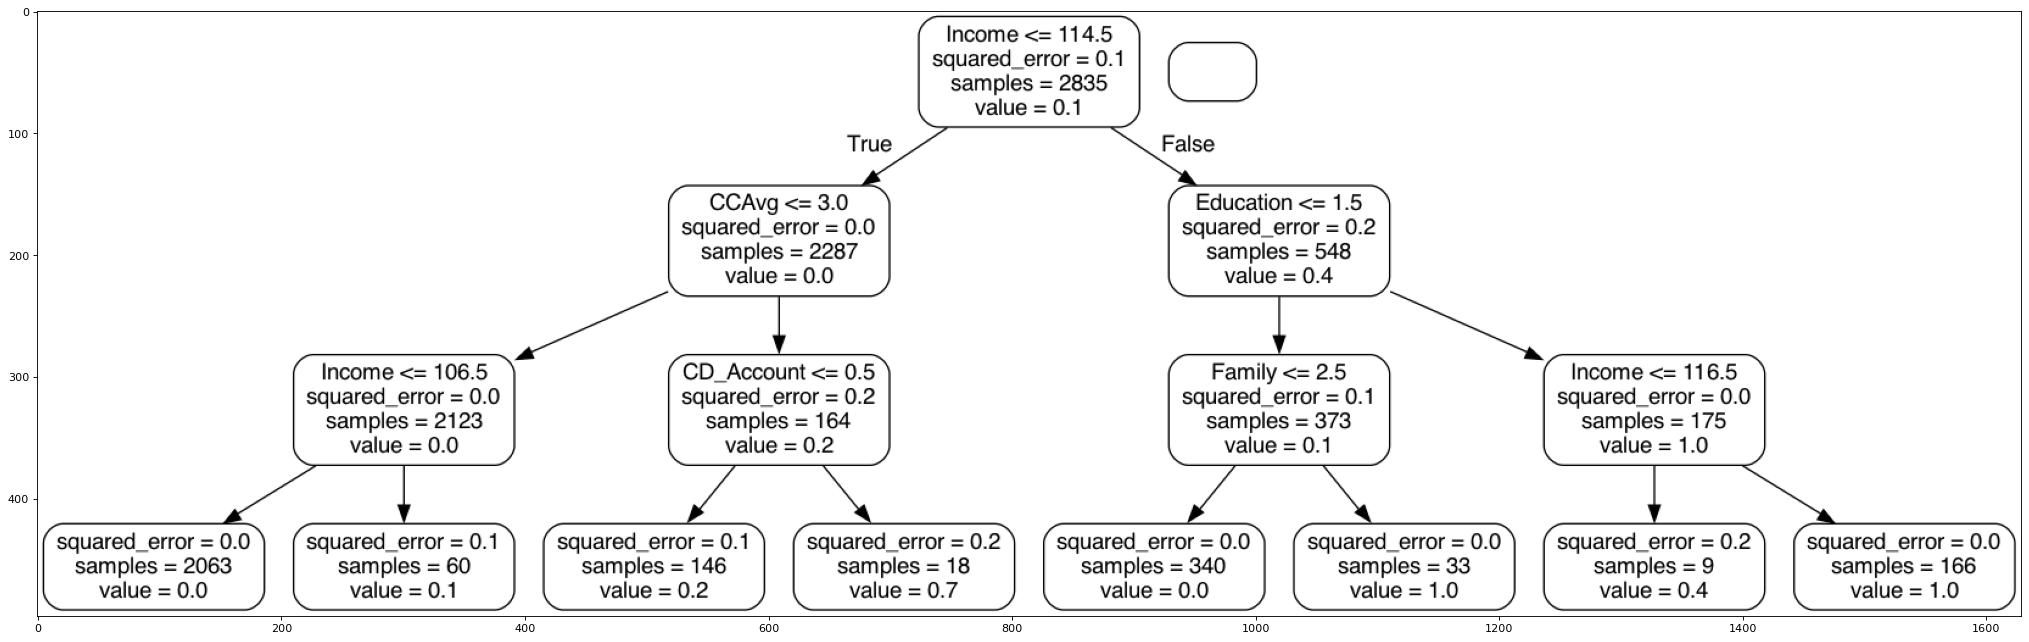

In [25]:
# Visualization of Nodes for the purpose of explainability
figure(figsize=(32, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(x_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()
     

The Random Forest Regressor operates based on the idea of the collective intelligence of a group. It utilizes numerous decision trees to forecast the target variable, with each decision tree regression generating a numerical output for a given input. The final output of the Random Forest Regressor is determined by averaging the results of all decision tree regressions.

In [26]:
# Get numerical feature importances
tree_importances = list(tree_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [27]:
# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: Education            Importance: 0.41
Variable: Income               Importance: 0.37
Variable: Family               Importance: 0.17
Variable: CCAvg                Importance: 0.03
Variable: CD_Account           Importance: 0.02
Variable: ID                   Importance: 0.0
Variable: Age                  Importance: 0.0
Variable: Experience           Importance: 0.0
Variable: ZIP_Code             Importance: 0.0
Variable: Mortgage             Importance: 0.0
Variable: Securities_Account   Importance: 0.0
Variable: Online               Importance: 0.0
Variable: CreditCard           Importance: 0.0


The Important variables we get from tree-based model is "Education" followed by "Income".

# **Q.3 Getting best model using H2O AutoML**

In [28]:
df = h2o.H2OFrame(df)  # Converting Pandas dataframe in H2O dataframe

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [29]:

pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [30]:
# Setting up AutoML
def autoML(df_train, df_test):
    X = df_train.columns
    y = "Personal_Loan"

    X.remove(y)  # Removing the result frm our predictors data
    #X.remove("Id")  # Removing ID from the predictor's data, as it is not related

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [31]:
df_train['Personal_Loan'] = df_train['Personal_Loan'].asfactor()

In [32]:
autoML = autoML(df_train, df_test)  # Training AutoML

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [33]:
autoML[2].leaderboard  # Leaderbord of AutoML output

model_id                                                      auc    logloss     aucpr    mean_per_class_error       rmse         mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  ---------  ----------
GBM_grid_1_AutoML_1_20230329_135527_model_2              0.997477  0.036423   0.982265               0.0547211  0.100266   0.0100532
StackedEnsemble_BestOfFamily_4_AutoML_1_20230329_135527  0.997428  0.0352804  0.982219               0.0544423  0.0995166  0.00990356
StackedEnsemble_AllModels_1_AutoML_1_20230329_135527     0.99723   0.0358101  0.981712               0.0378756  0.0983476  0.00967225
GBM_5_AutoML_1_20230329_135527                           0.997104  0.0410537  0.981212               0.0407986  0.100255   0.010051
StackedEnsemble_AllModels_3_AutoML_1_20230329_135527     0.997104  0.0361656  0.981044               0.0497085  0.098428   0.00968807
GBM_4_AutoML_1_20230329_135527                           0.997061  0.0405234  0.98147                0.040103   0.100392   0.0100785
StackedEnsemble_BestOfFamily_2_AutoML_1_20230329_135527  0.997042  0.0361169  0.981235               0.0357875  0.0987691  0.00975533
StackedEnsemble_AllModels_2_AutoML_1_20230329_135527     0.99702   0.0360131  0.980978               0.0474811  0.0982296  0.00964906
GBM_3_AutoML_1_20230329_135527                           0.996989  0.0397651  0.980715               0.0407986  0.0987192  0.00974547
StackedEnsemble_BestOfFamily_3_AutoML_1_20230329_135527  0.99688   0.0362306  0.980644               0.041773   0.0980432  0.00961246
[37 rows x 7 columns]

In [34]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model
print(autoML_model)

0
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230329_135527_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    98                 98                          24381                  4            4            4             11            16            15.1939

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0016276012231142363
RMSE: 0.0403435400419229
LogLoss: 0.00958290459255912
Mean Per-Class Error: 0.00013939224979091162
AUC: 0.999999301291981
AUCPR: 0.9999937264906814
Gini: 0.999998602583962

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34036097607344684
       0     1    Error    Rate
-----  ----  ---  -------  ----

In [35]:
autoML_model.predict

<bound method ModelBase.predict of H2OGradientBoostingEstimator({'parms': {'model_id': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'model_id', 'label': 'model_id', 'help': 'Destination id for this model; auto-generated if not specified.', 'required': False, 'type': 'Key<Model>', 'default_value': None, 'actual_value': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_1_20230329_135527_model_2', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_1_20230329_135527_model_2'}, 'input_value': None, 'level': 'critical', 'values': [], 'is_member_of_frames': [], 'is_mutually_exclusive_with': [], 'gridable': False}, 'training_frame': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'training_frame', 'label': 'training_frame', 'help': 'Id of the training data frame.', 'required': False, 'type': 'Key<Frame

If your RMSE value is low, it means that the model is  performing well.  

**StackedEnsemble_AllModels_2_AutoML_1_20230324_195051** is having lowest RMSE value that is "0.0998031" which means that this model works best.

# **Q.4 SHAP, Partial Dependence Plot, Individual Conditional Expectation Analysis for AutoML Best Model**

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

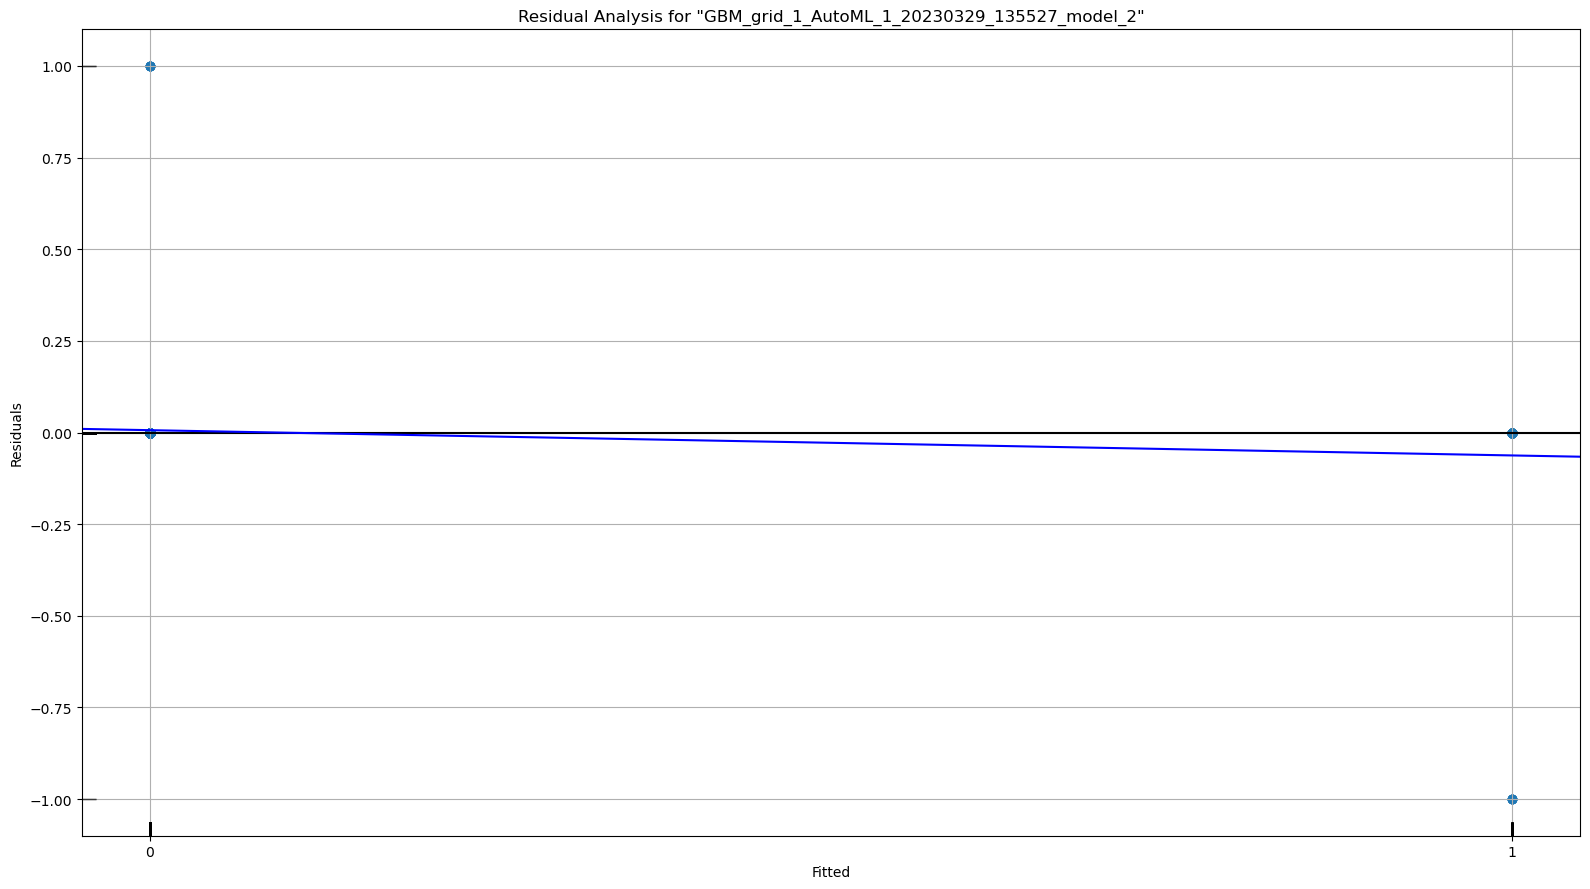

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

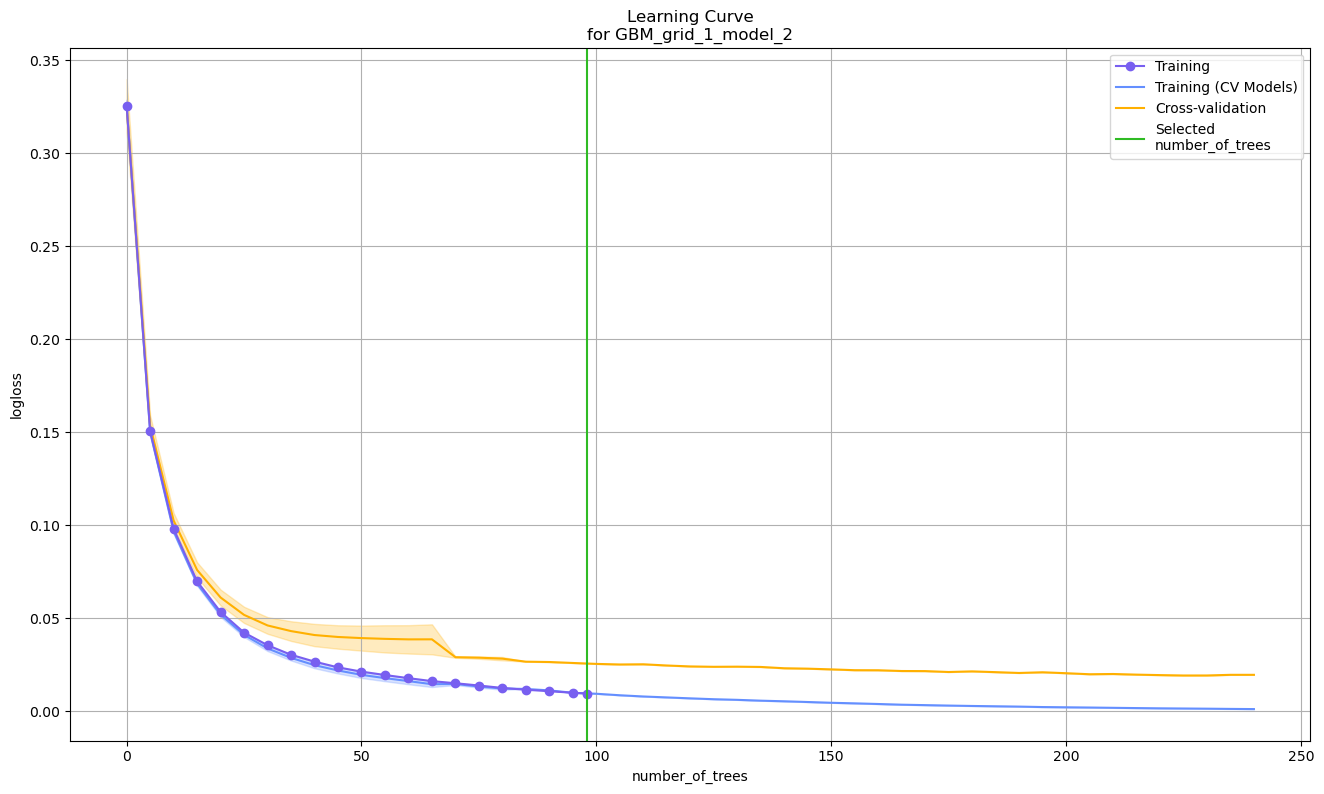

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

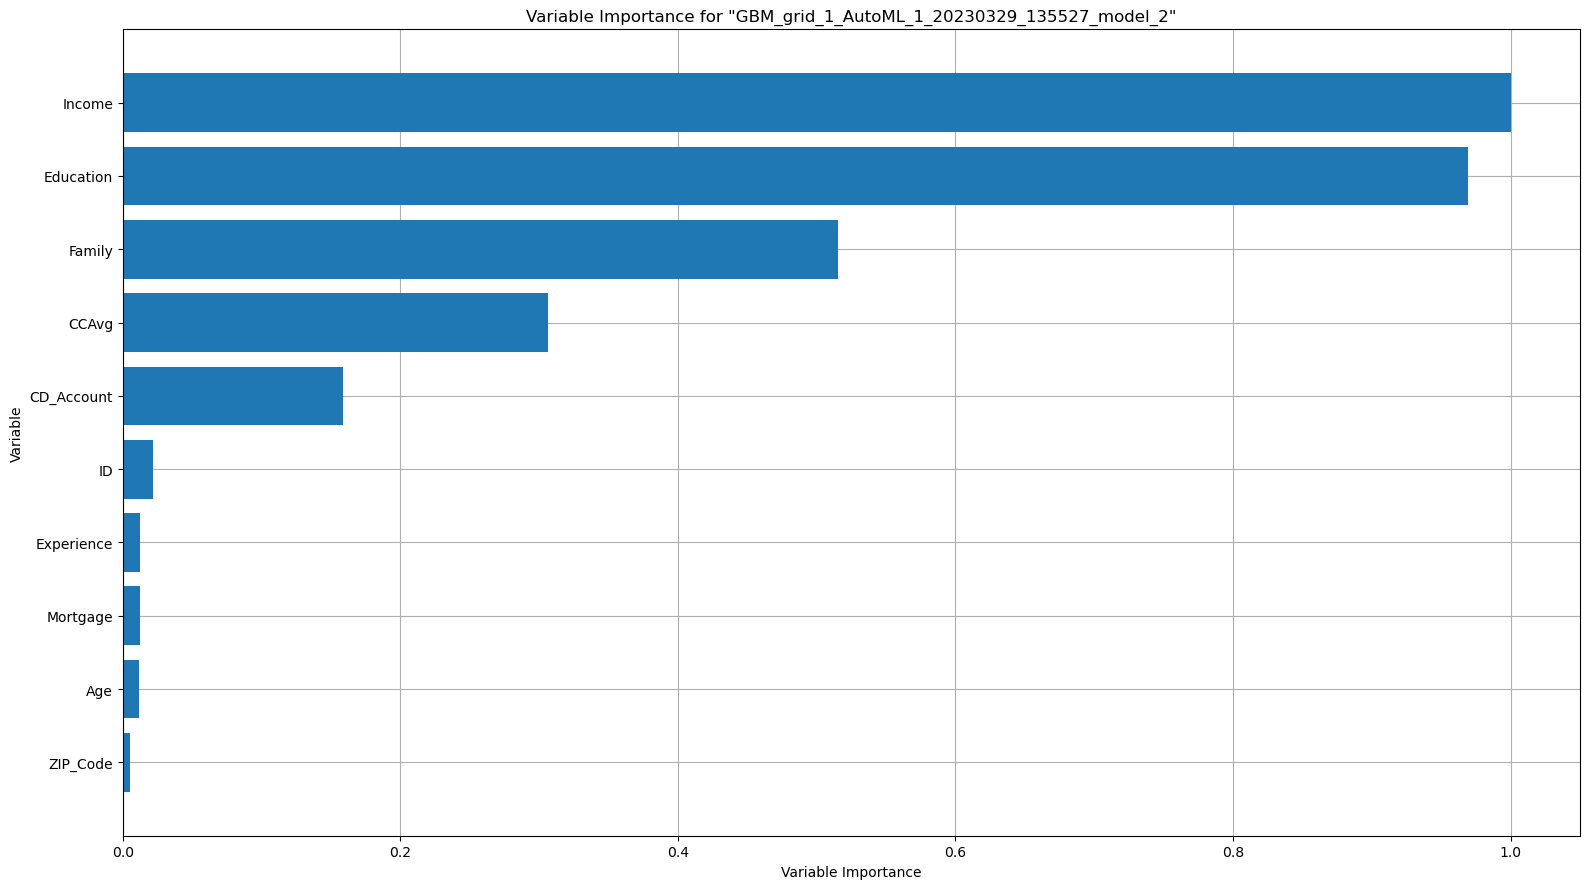

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

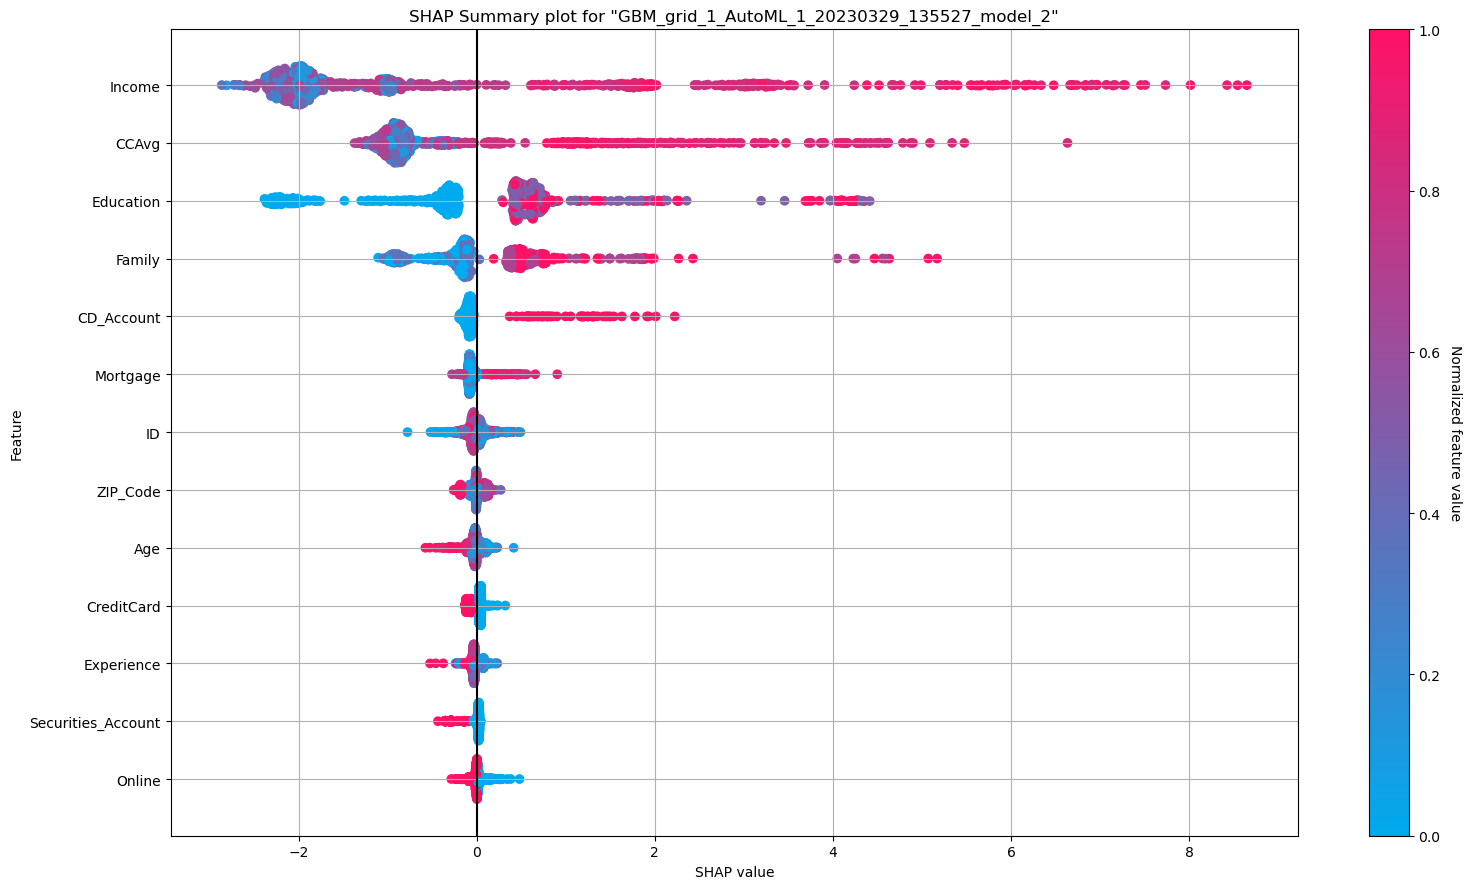

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

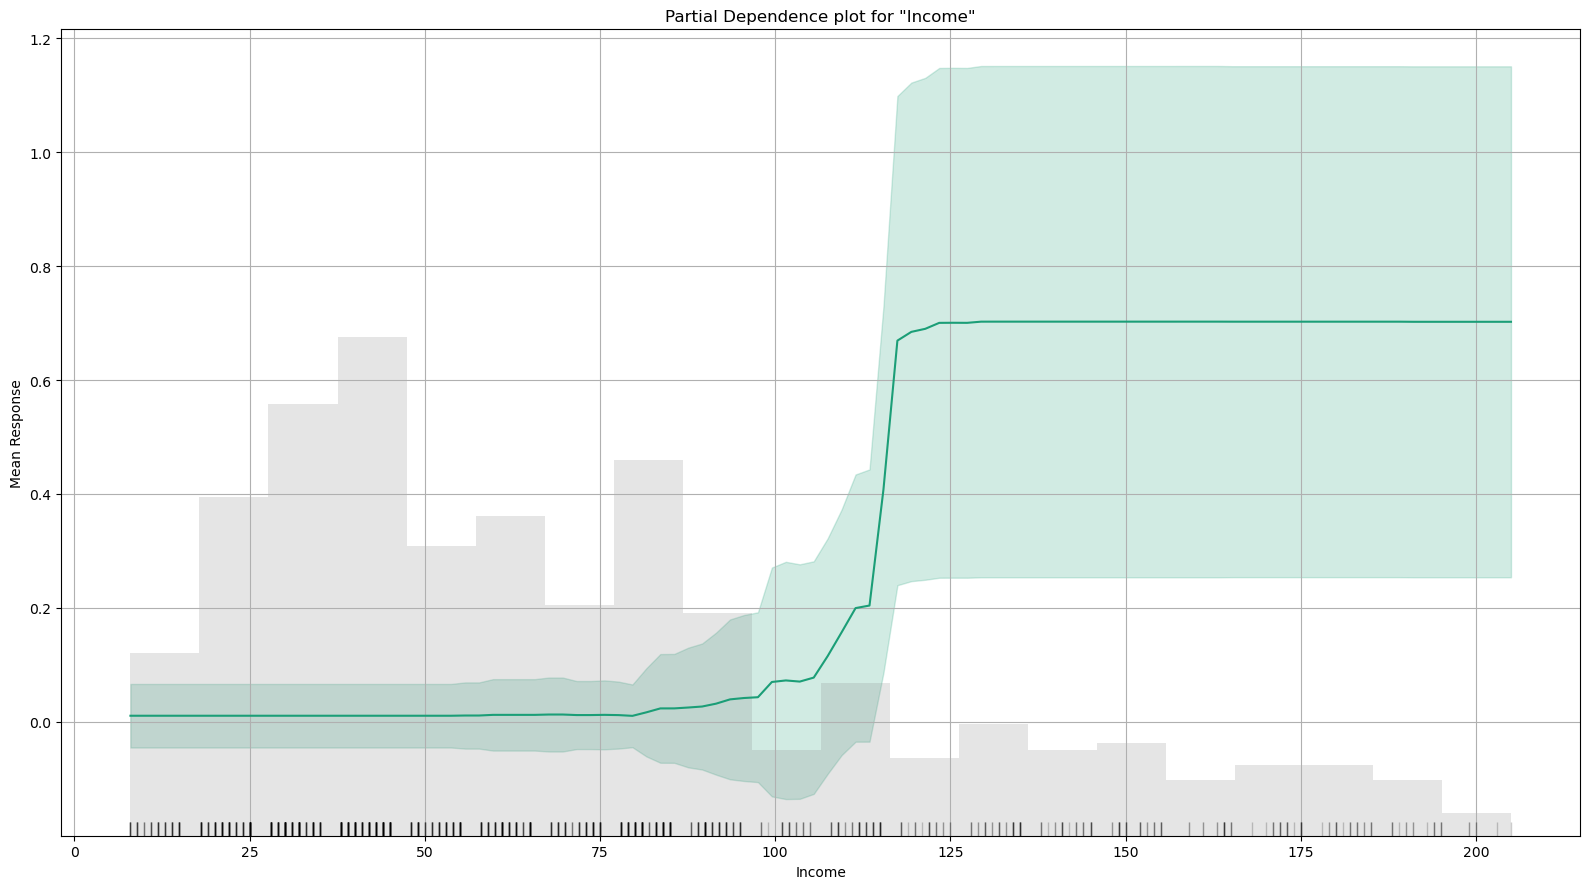

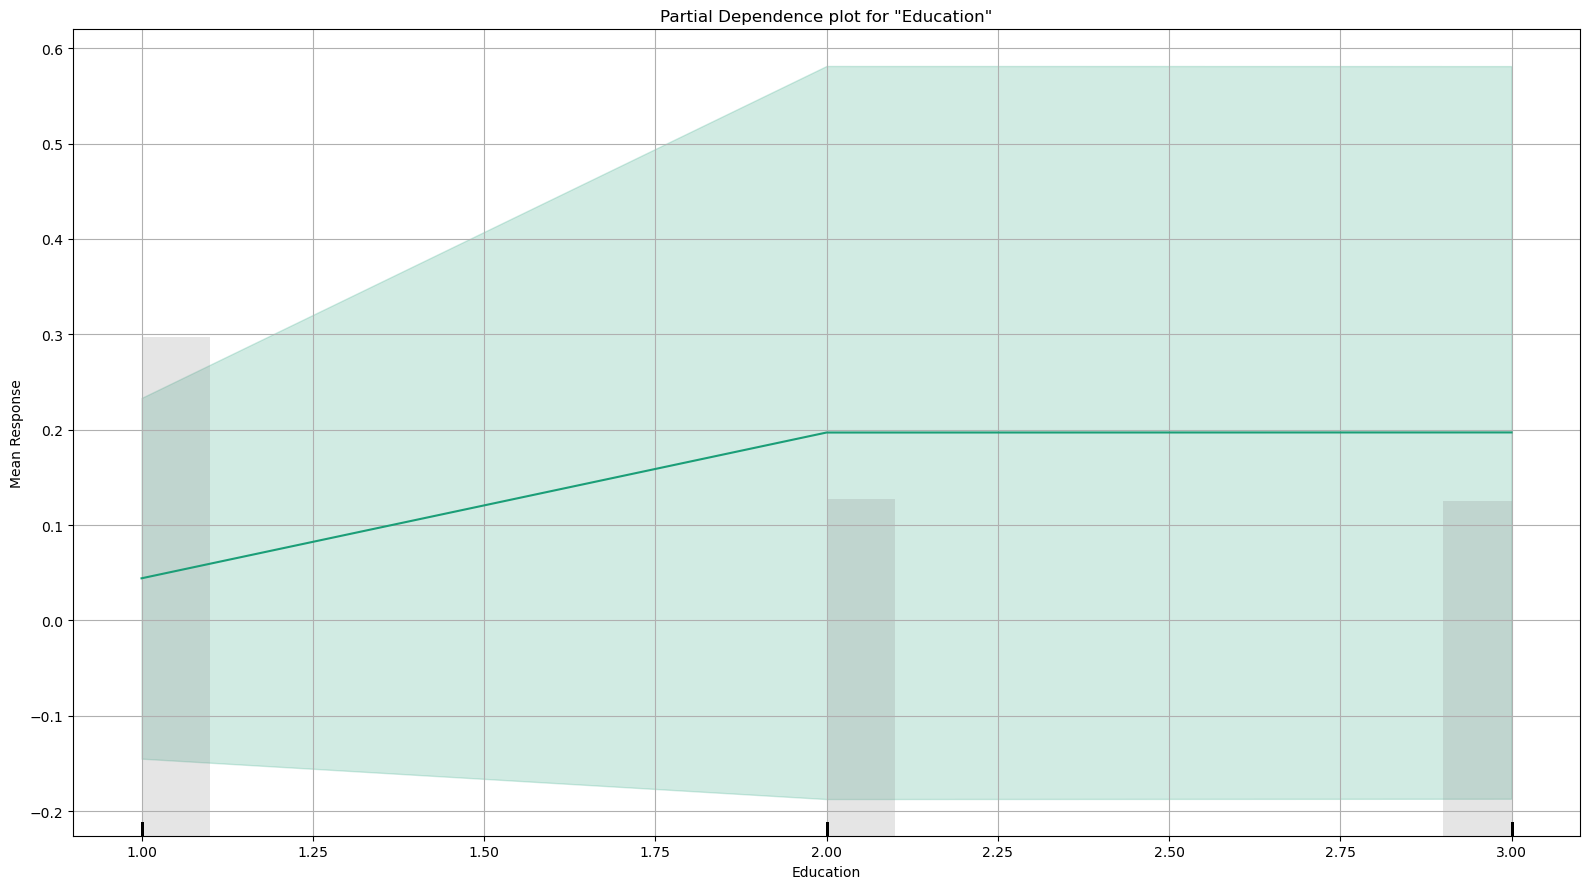

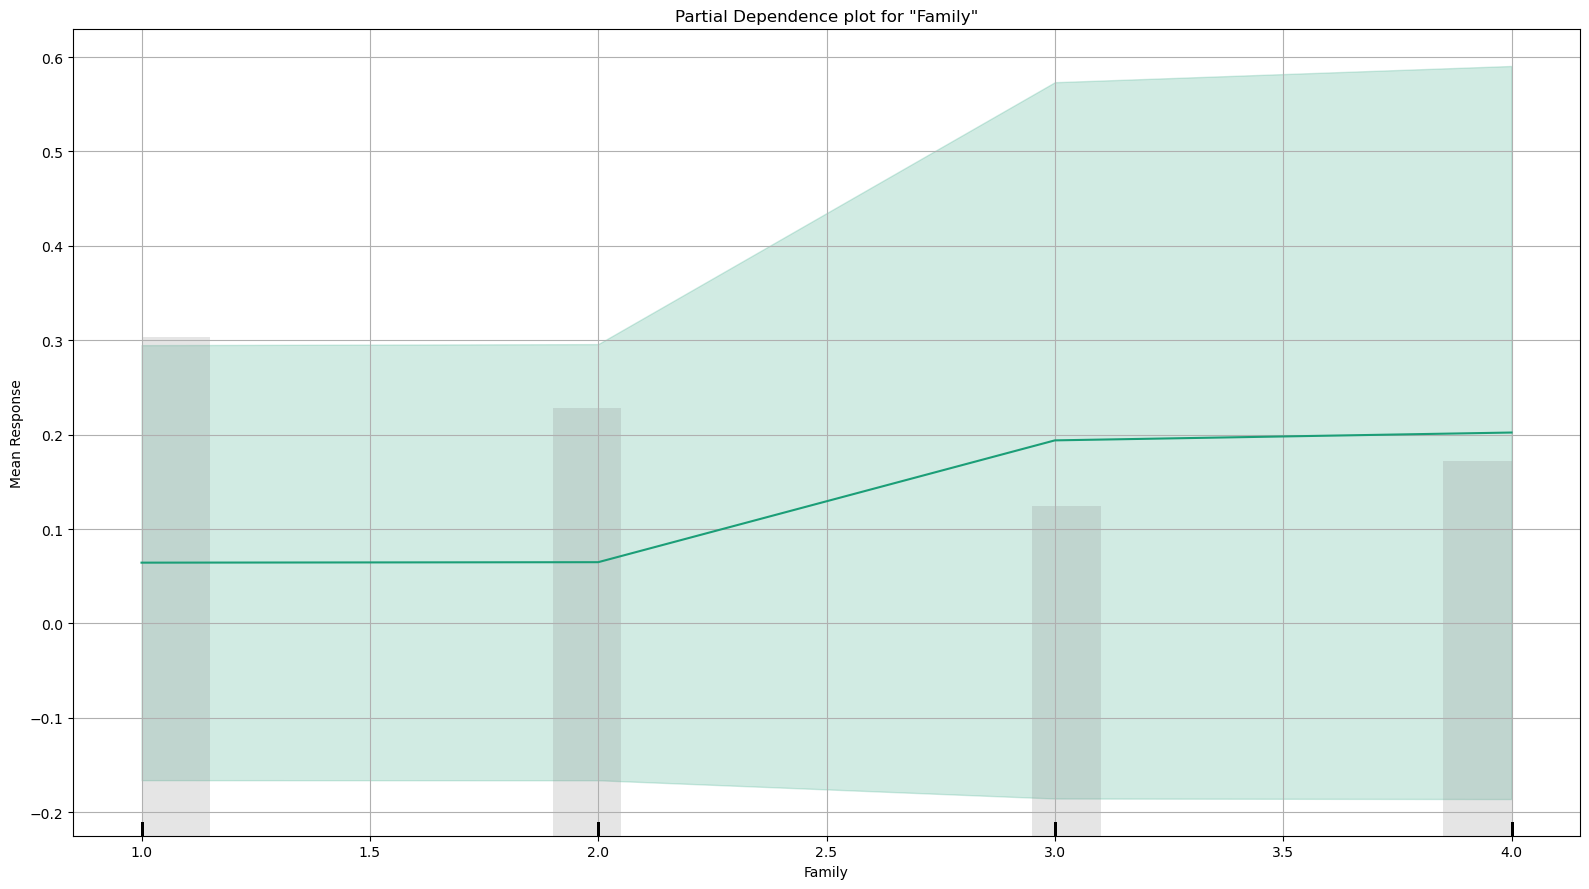

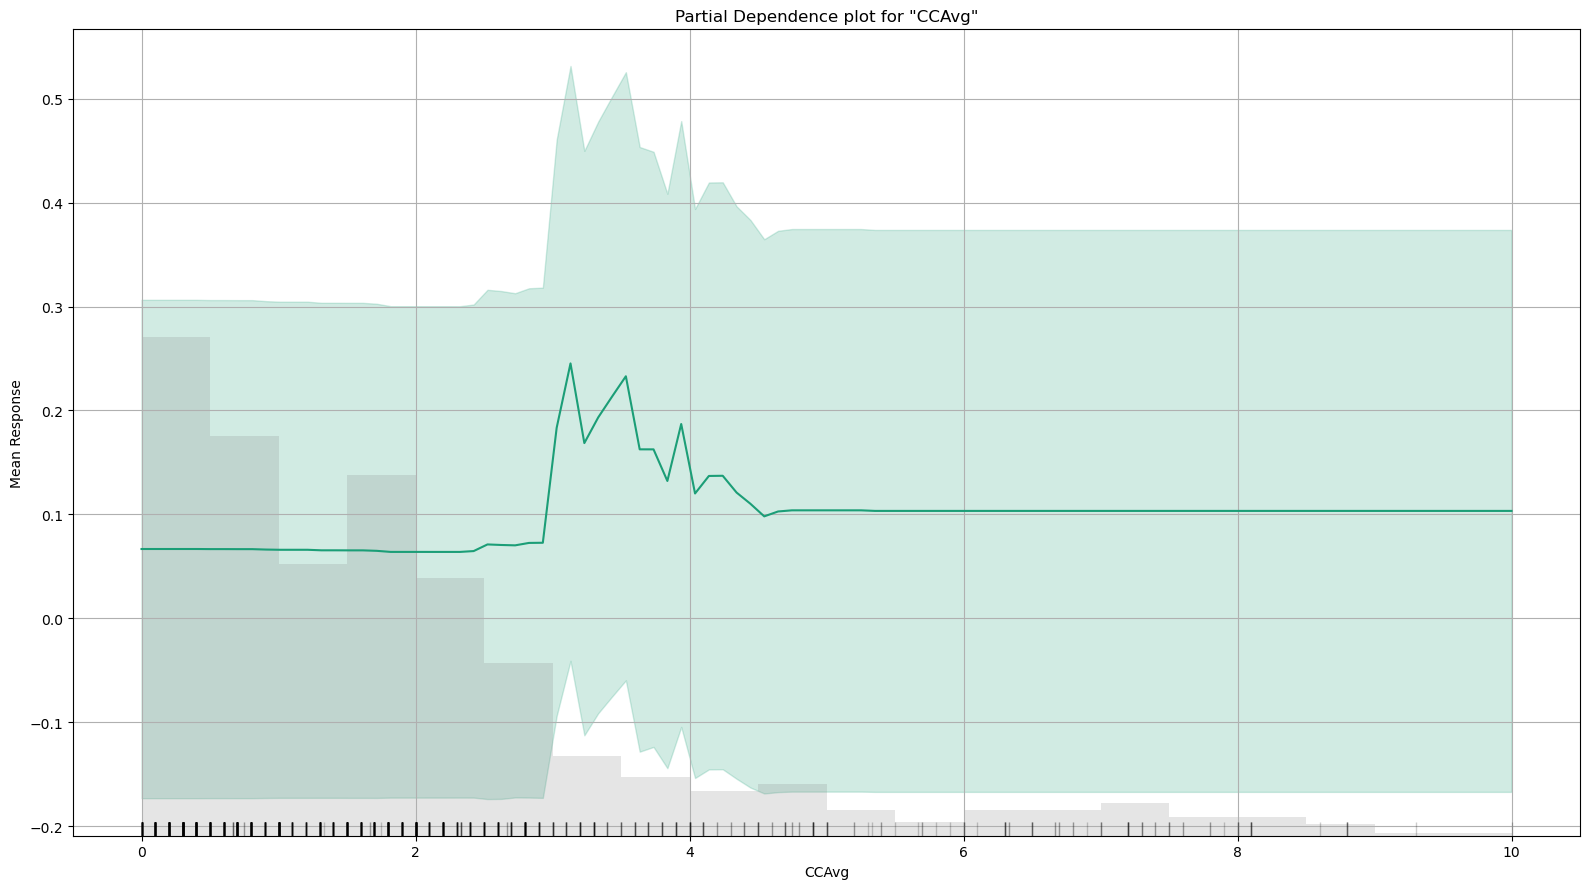

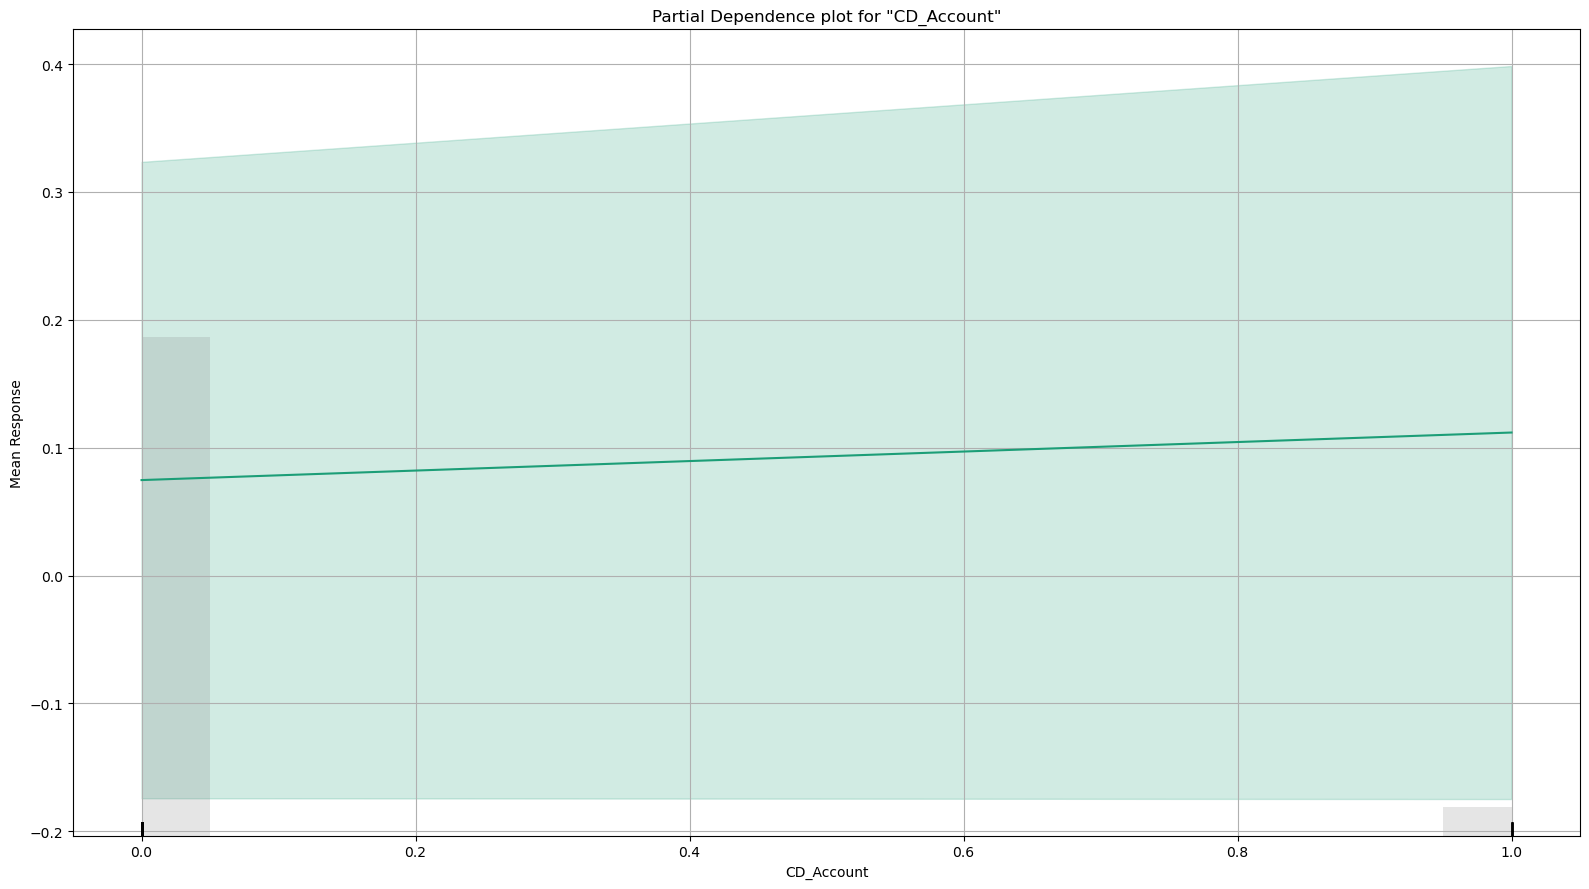

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

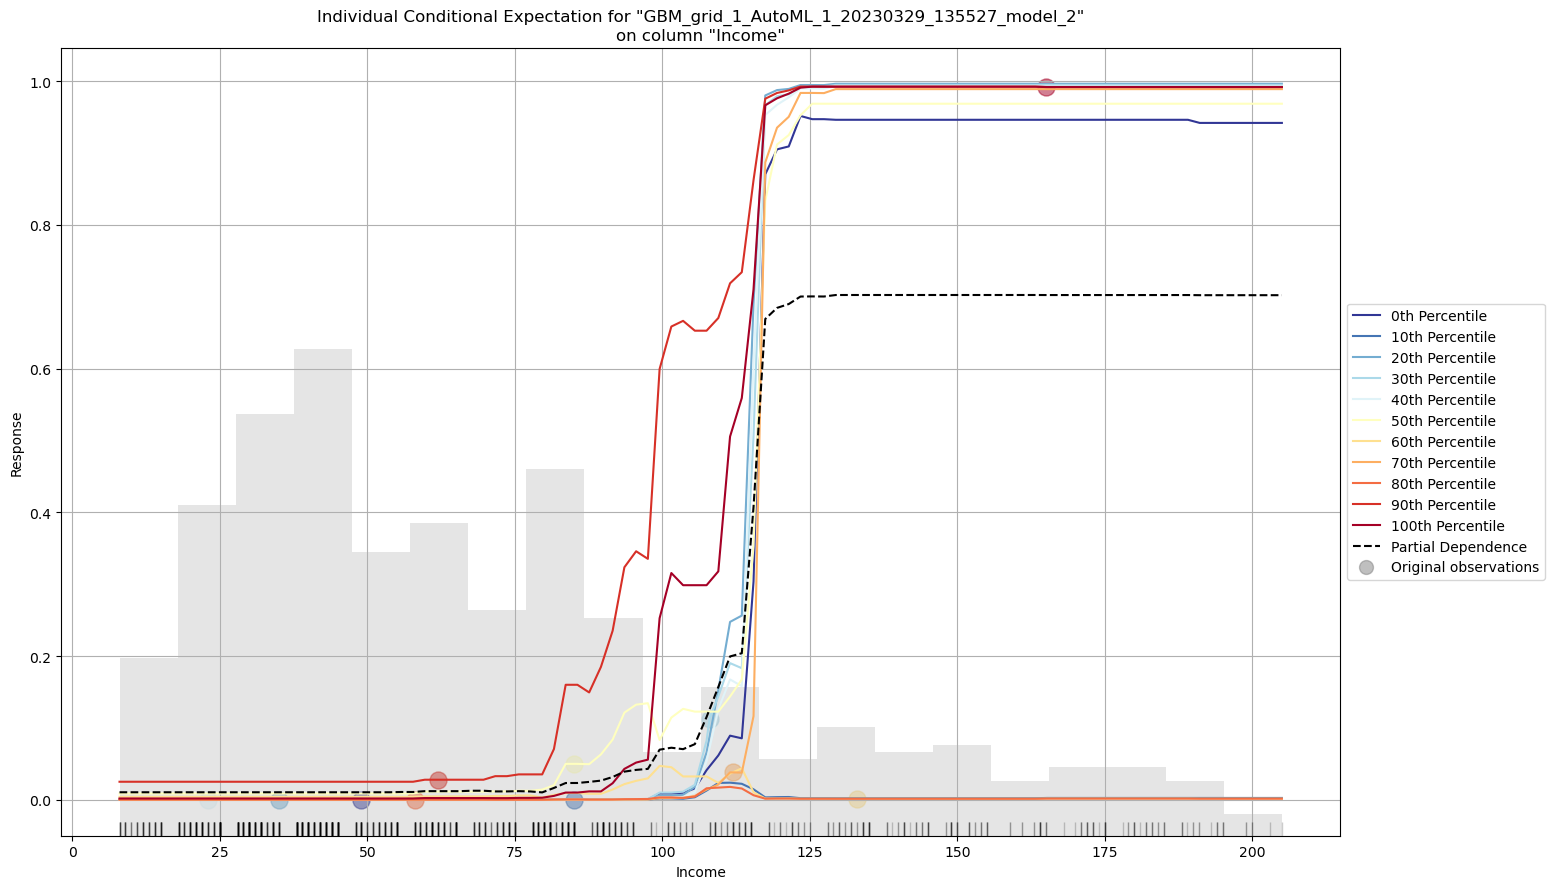

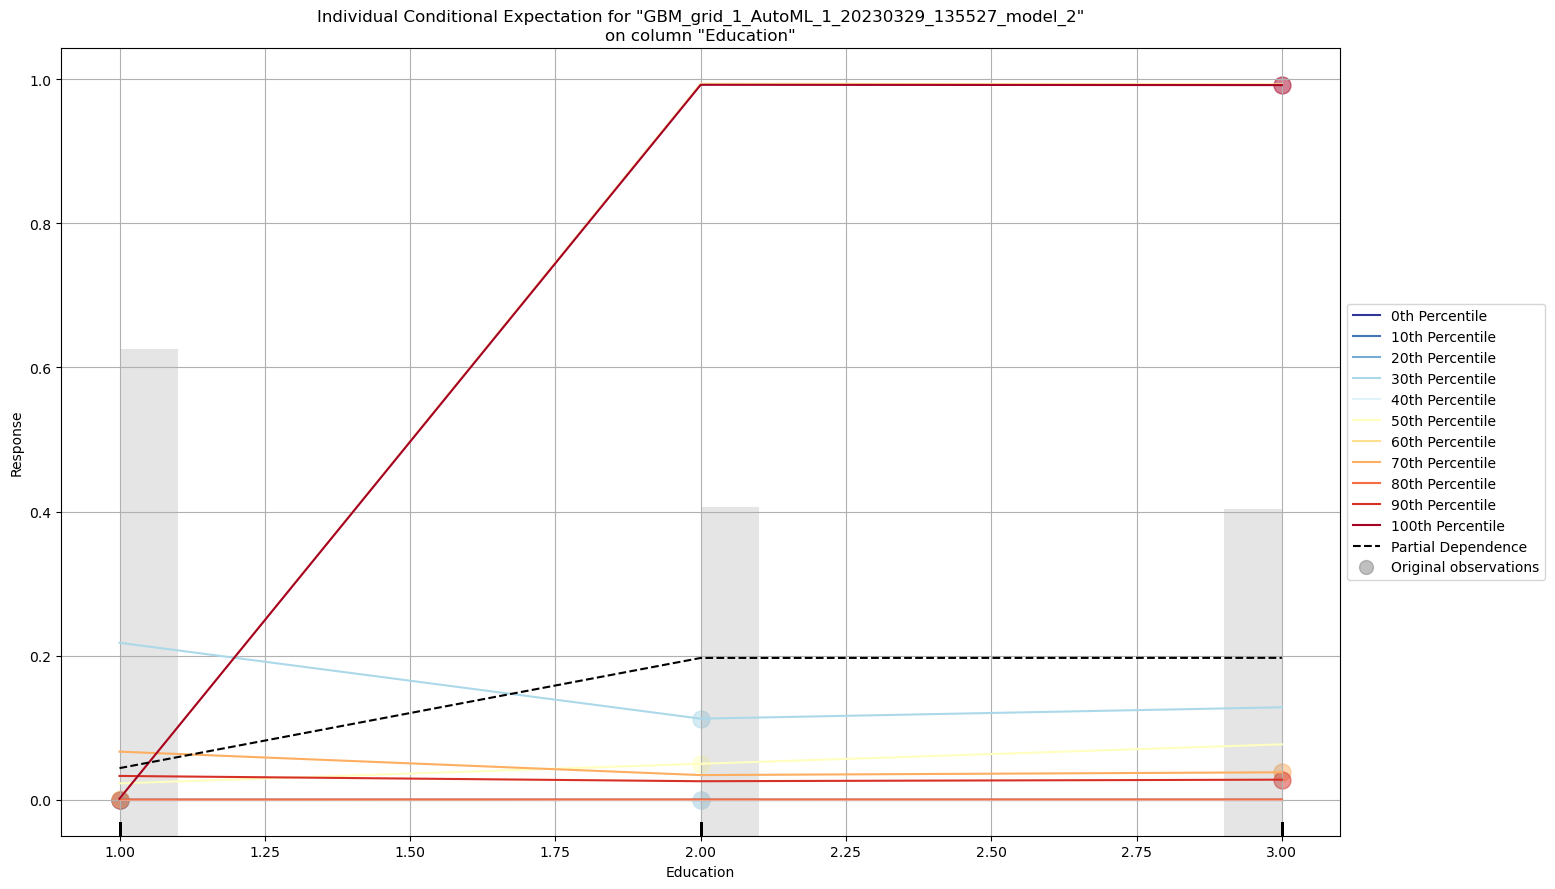

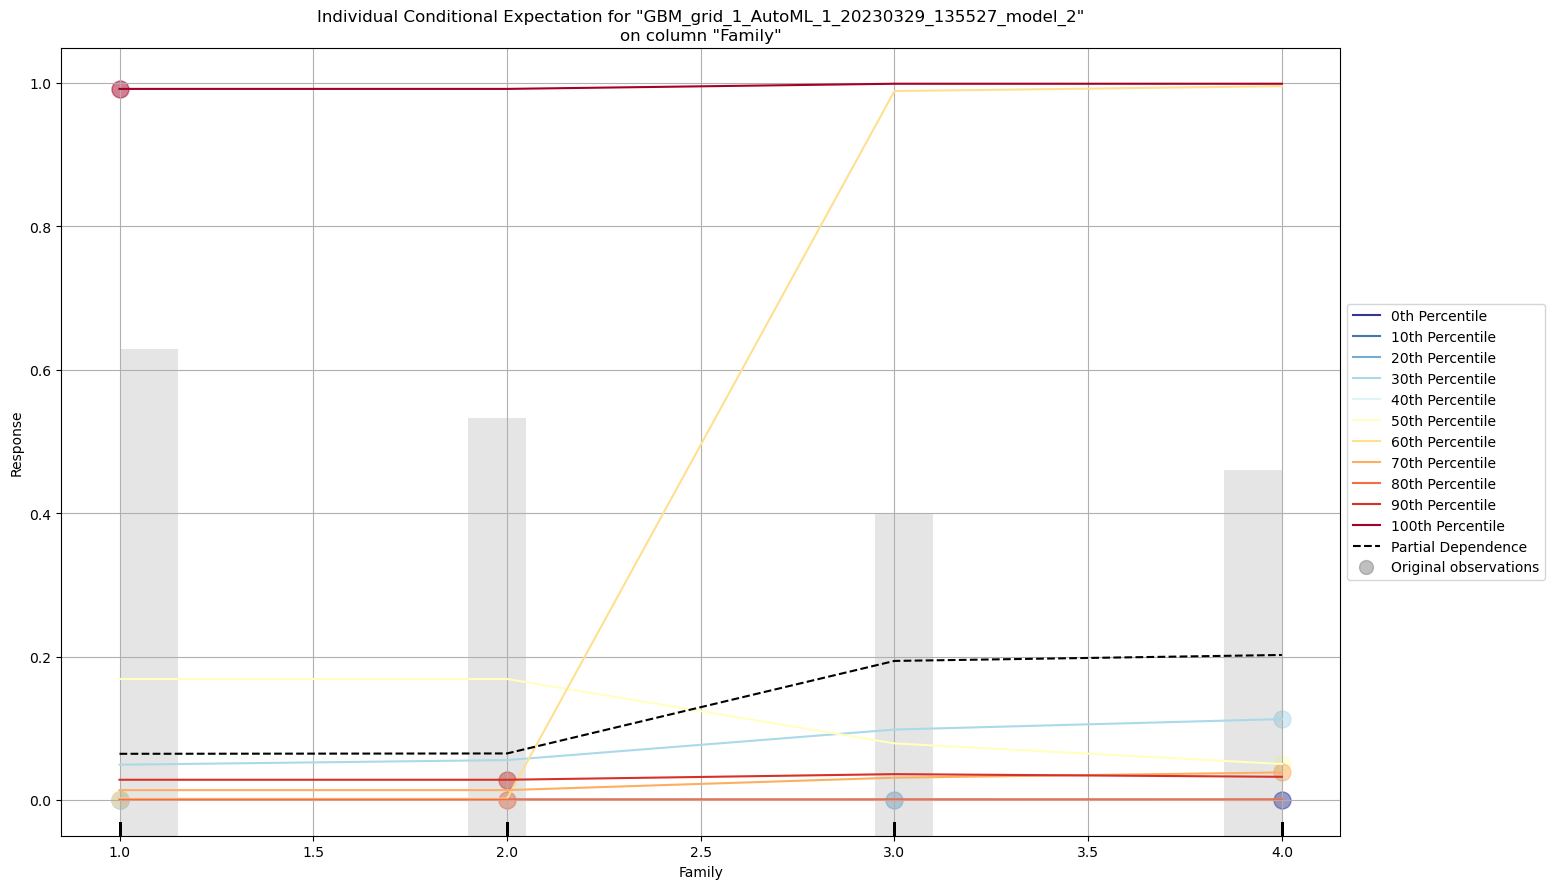

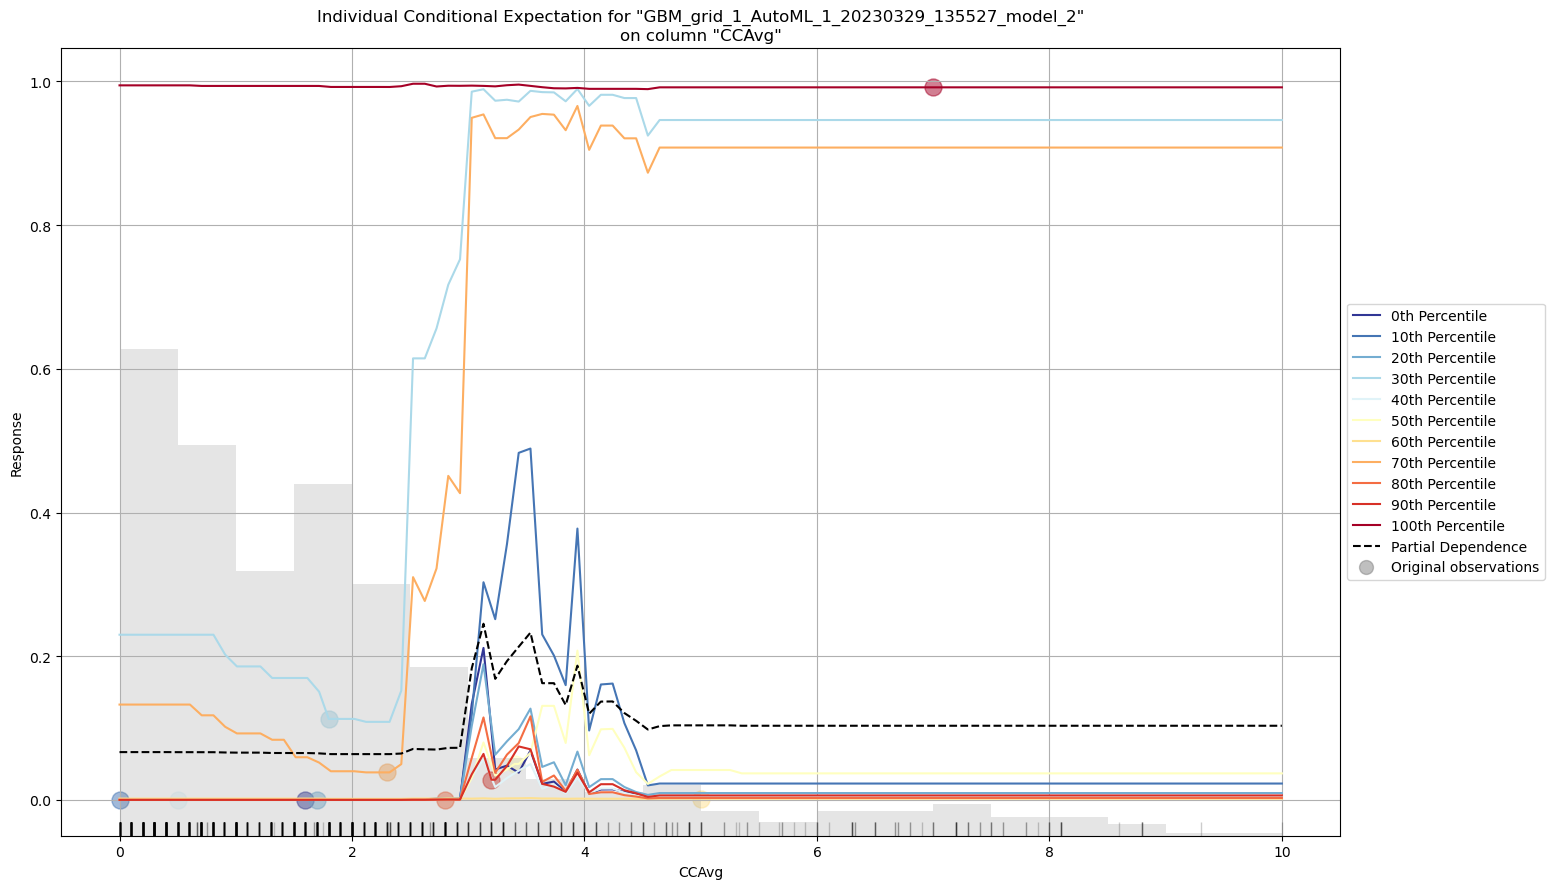

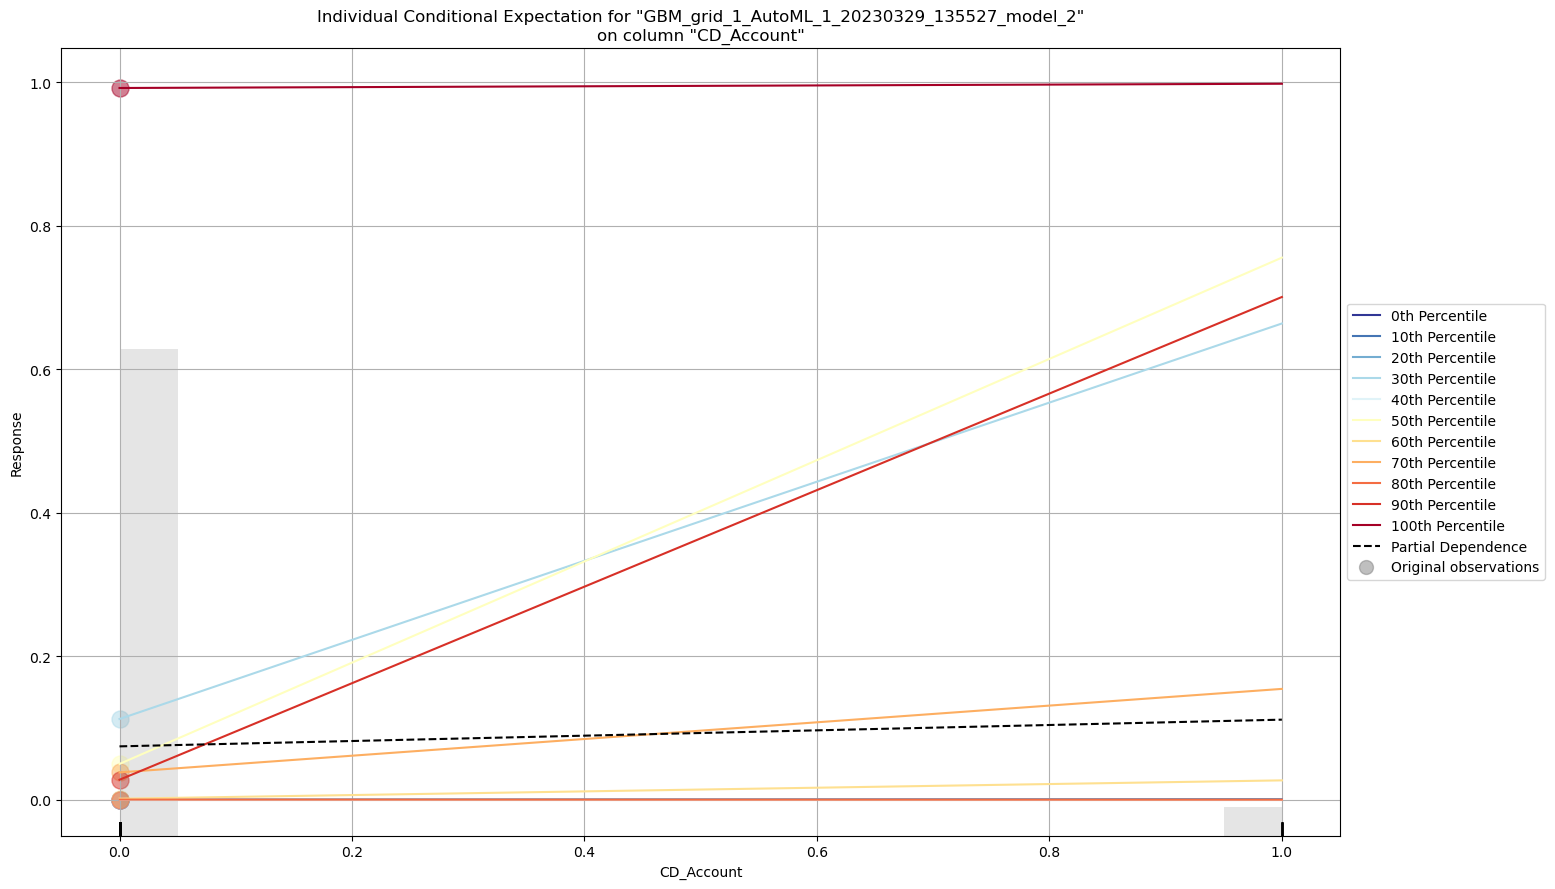

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [36]:

autoML_model.explain(autoML[1])  # AutoML Explainability

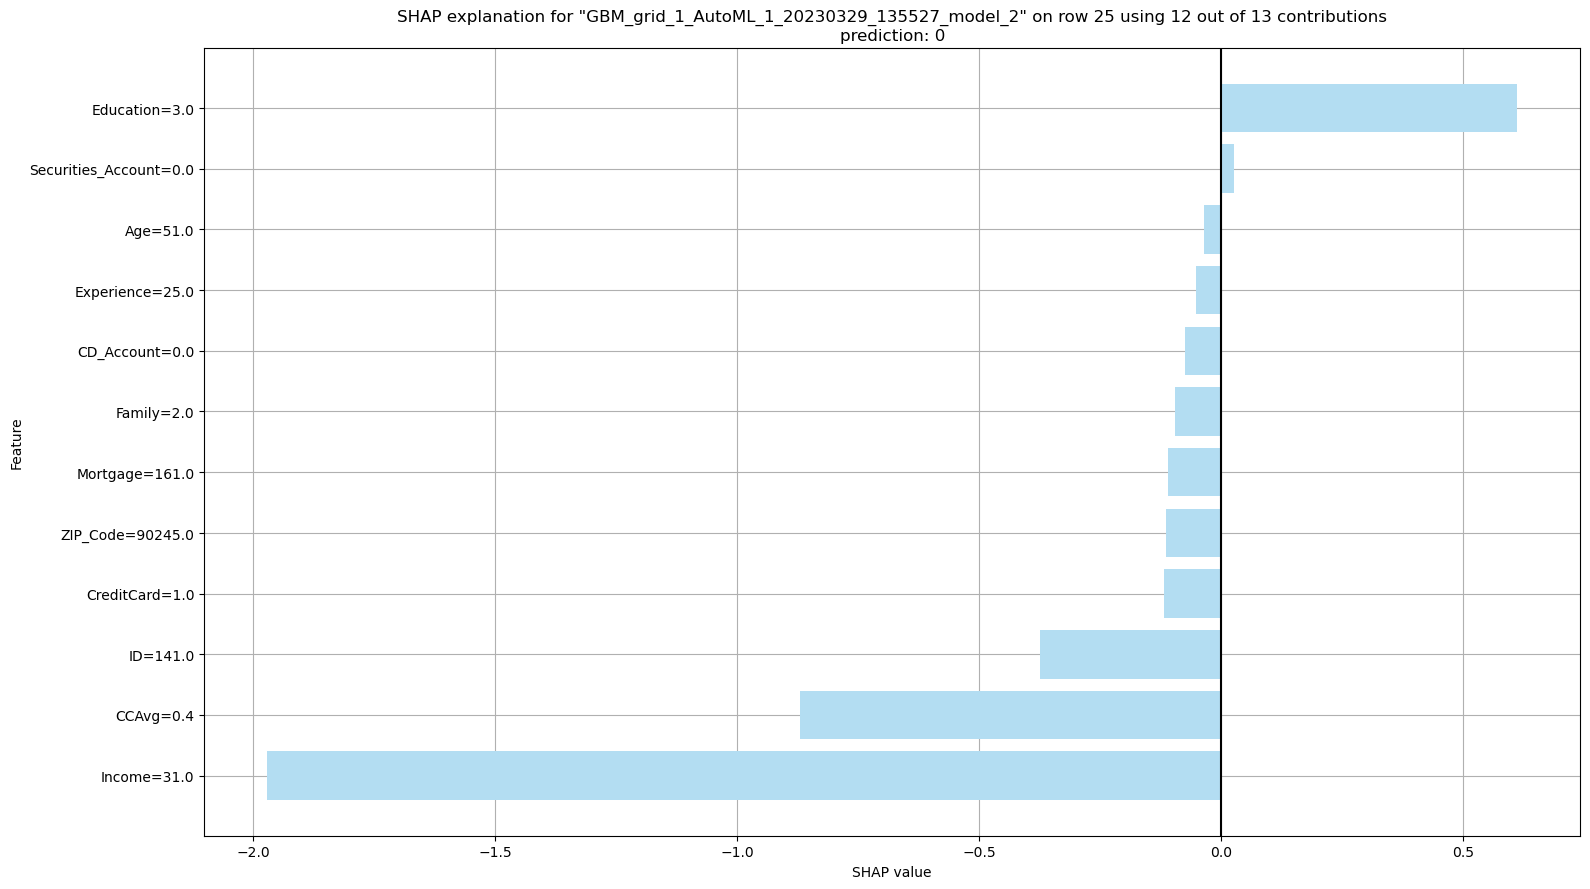

In [37]:
autoML_model.shap_explain_row_plot(
    autoML[1], 25
)  # Lets Analyze the 25th row in Test Data

This code is likely being used to analyze the performance of an AutoML model by examining its predictions on the test data and gaining insight into how the model is making its predictions.

We can note that except for Family, Creadir Card and Online all the other columns have negative value.

when it shows negative values, it means that the contribution of a particular feature to the model's prediction for the 25th row is negative. This does not necessarily mean that the feature is not important, but rather that its effect on the model's output is opposite to what would be expected based on the feature's value.

In general, a negative SHAP value means that the feature is negatively associated with the model's prediction. This could indicate that the feature is causing the model to make incorrect predictions, or that the feature is interacting with other features in unexpected ways.

Permutation explainer: 4501it [03:31, 20.56it/s]                                


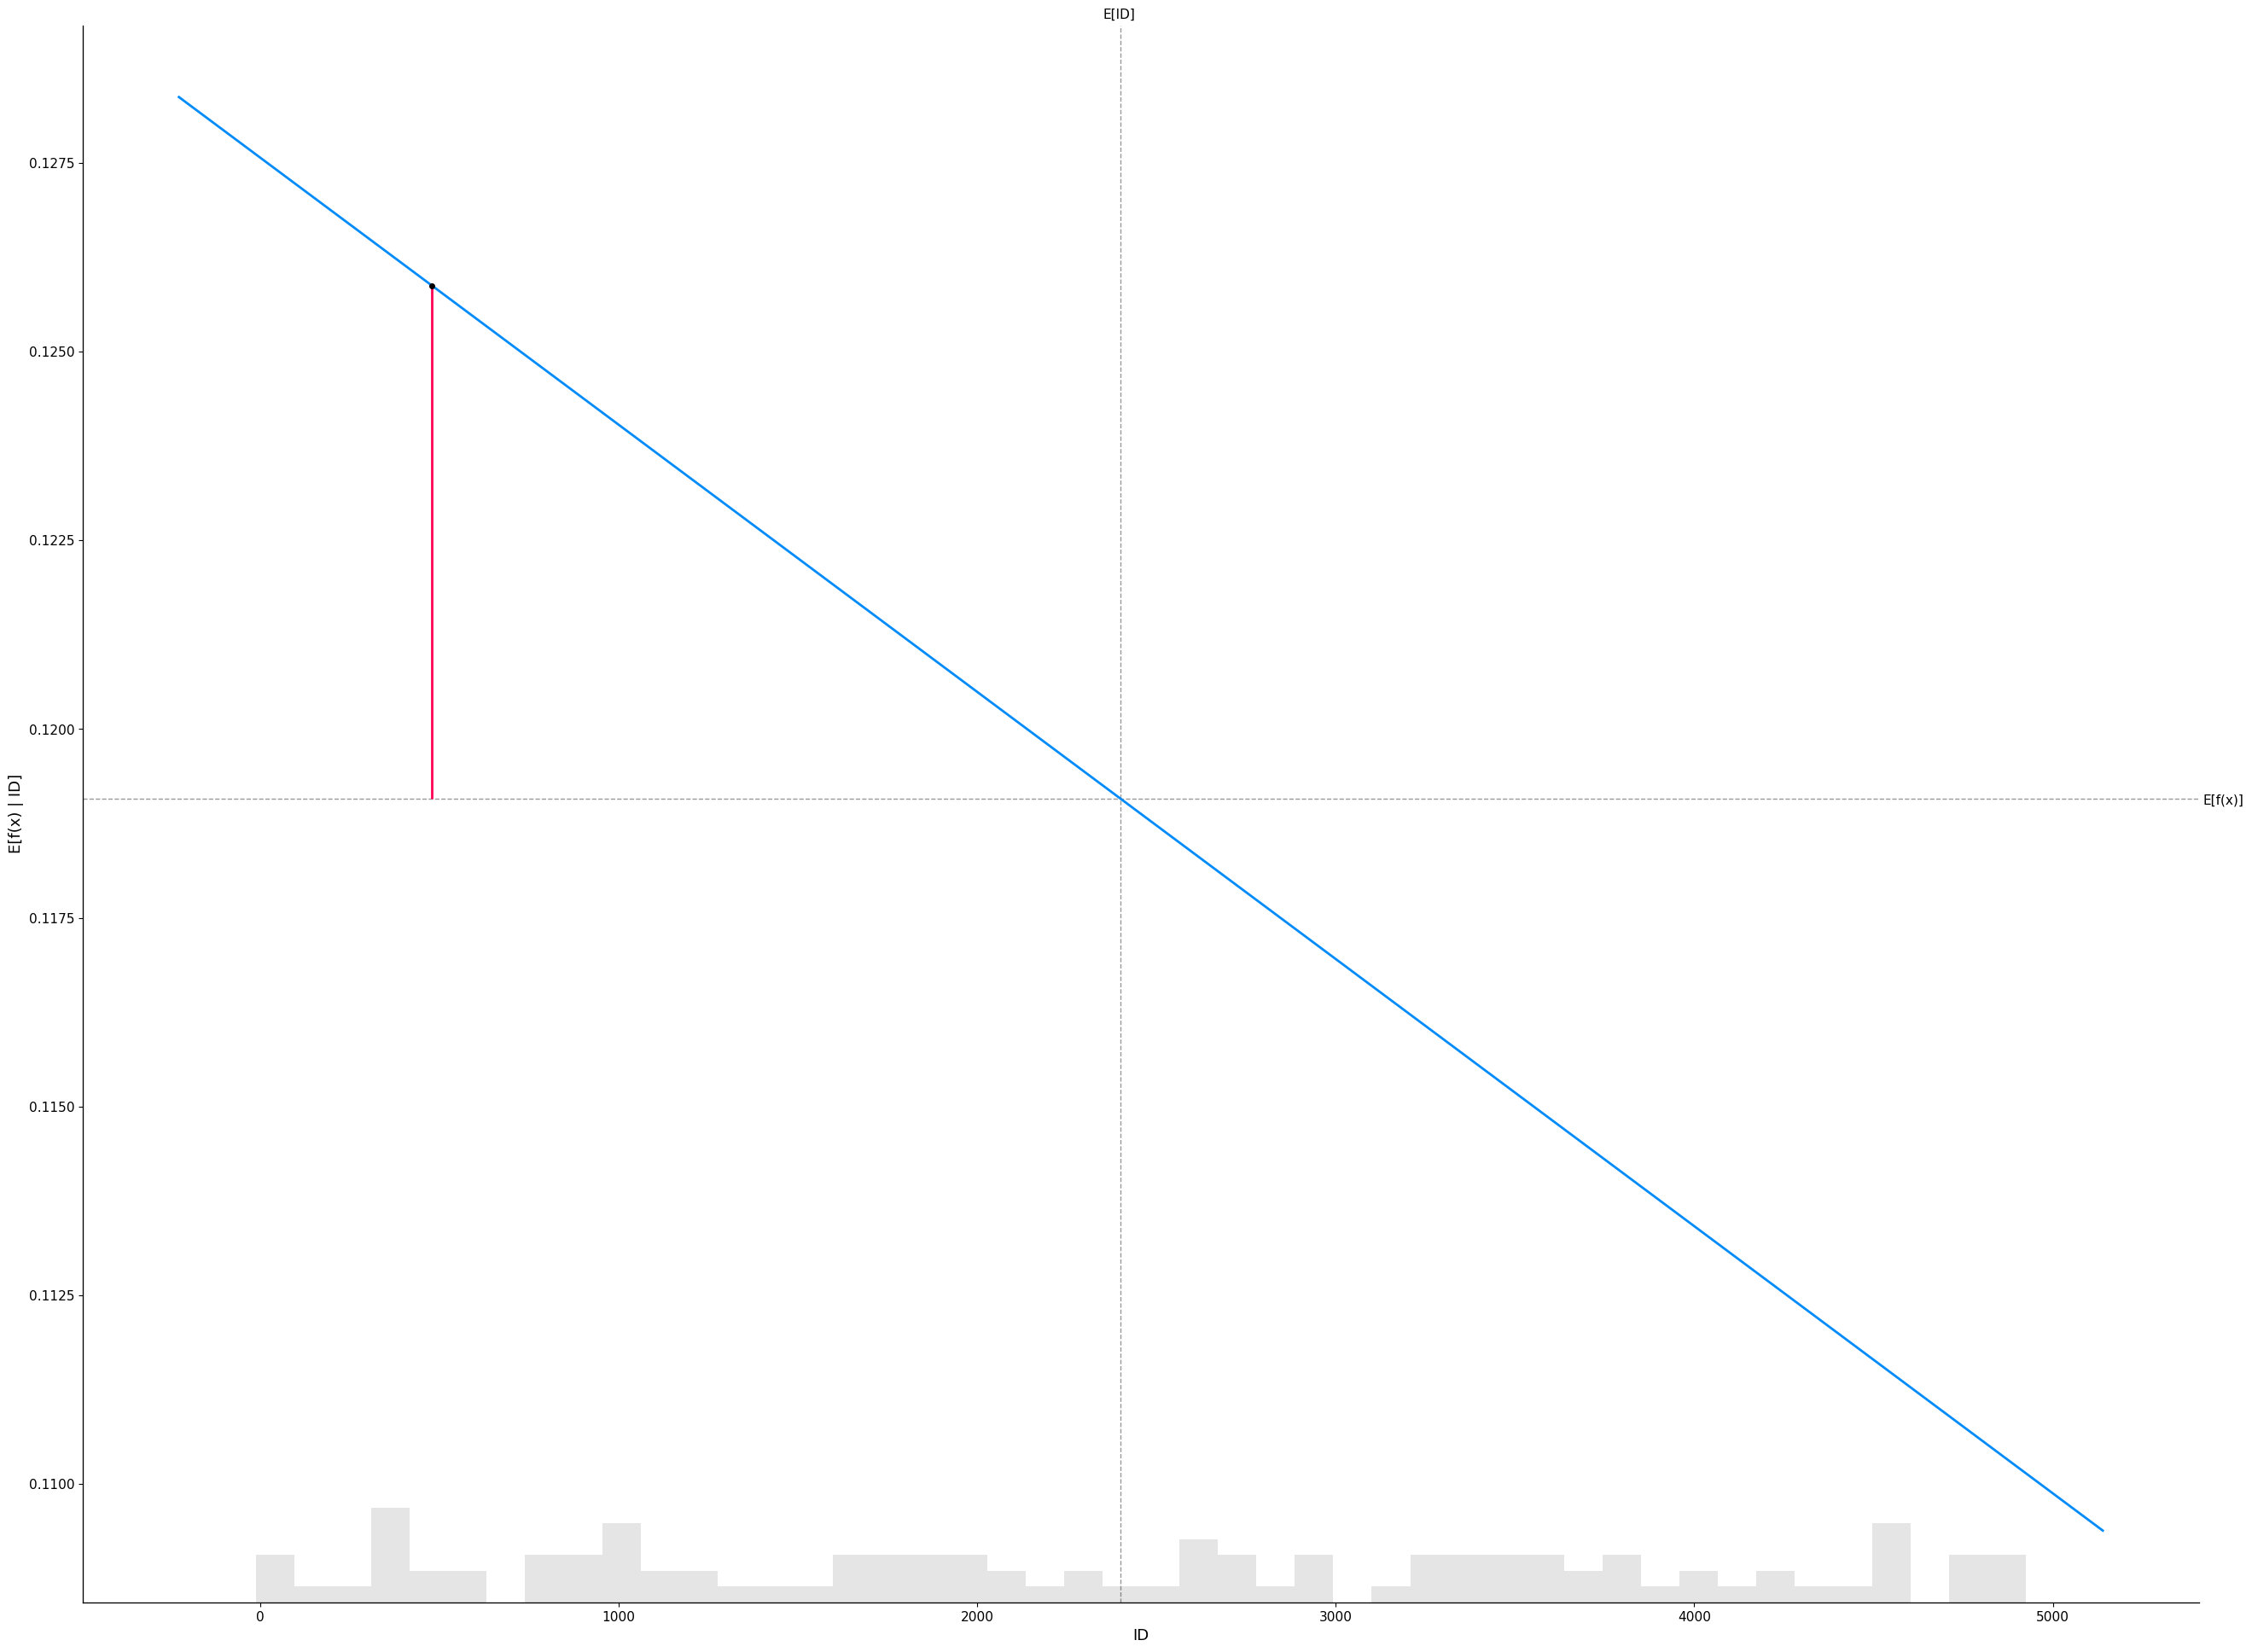

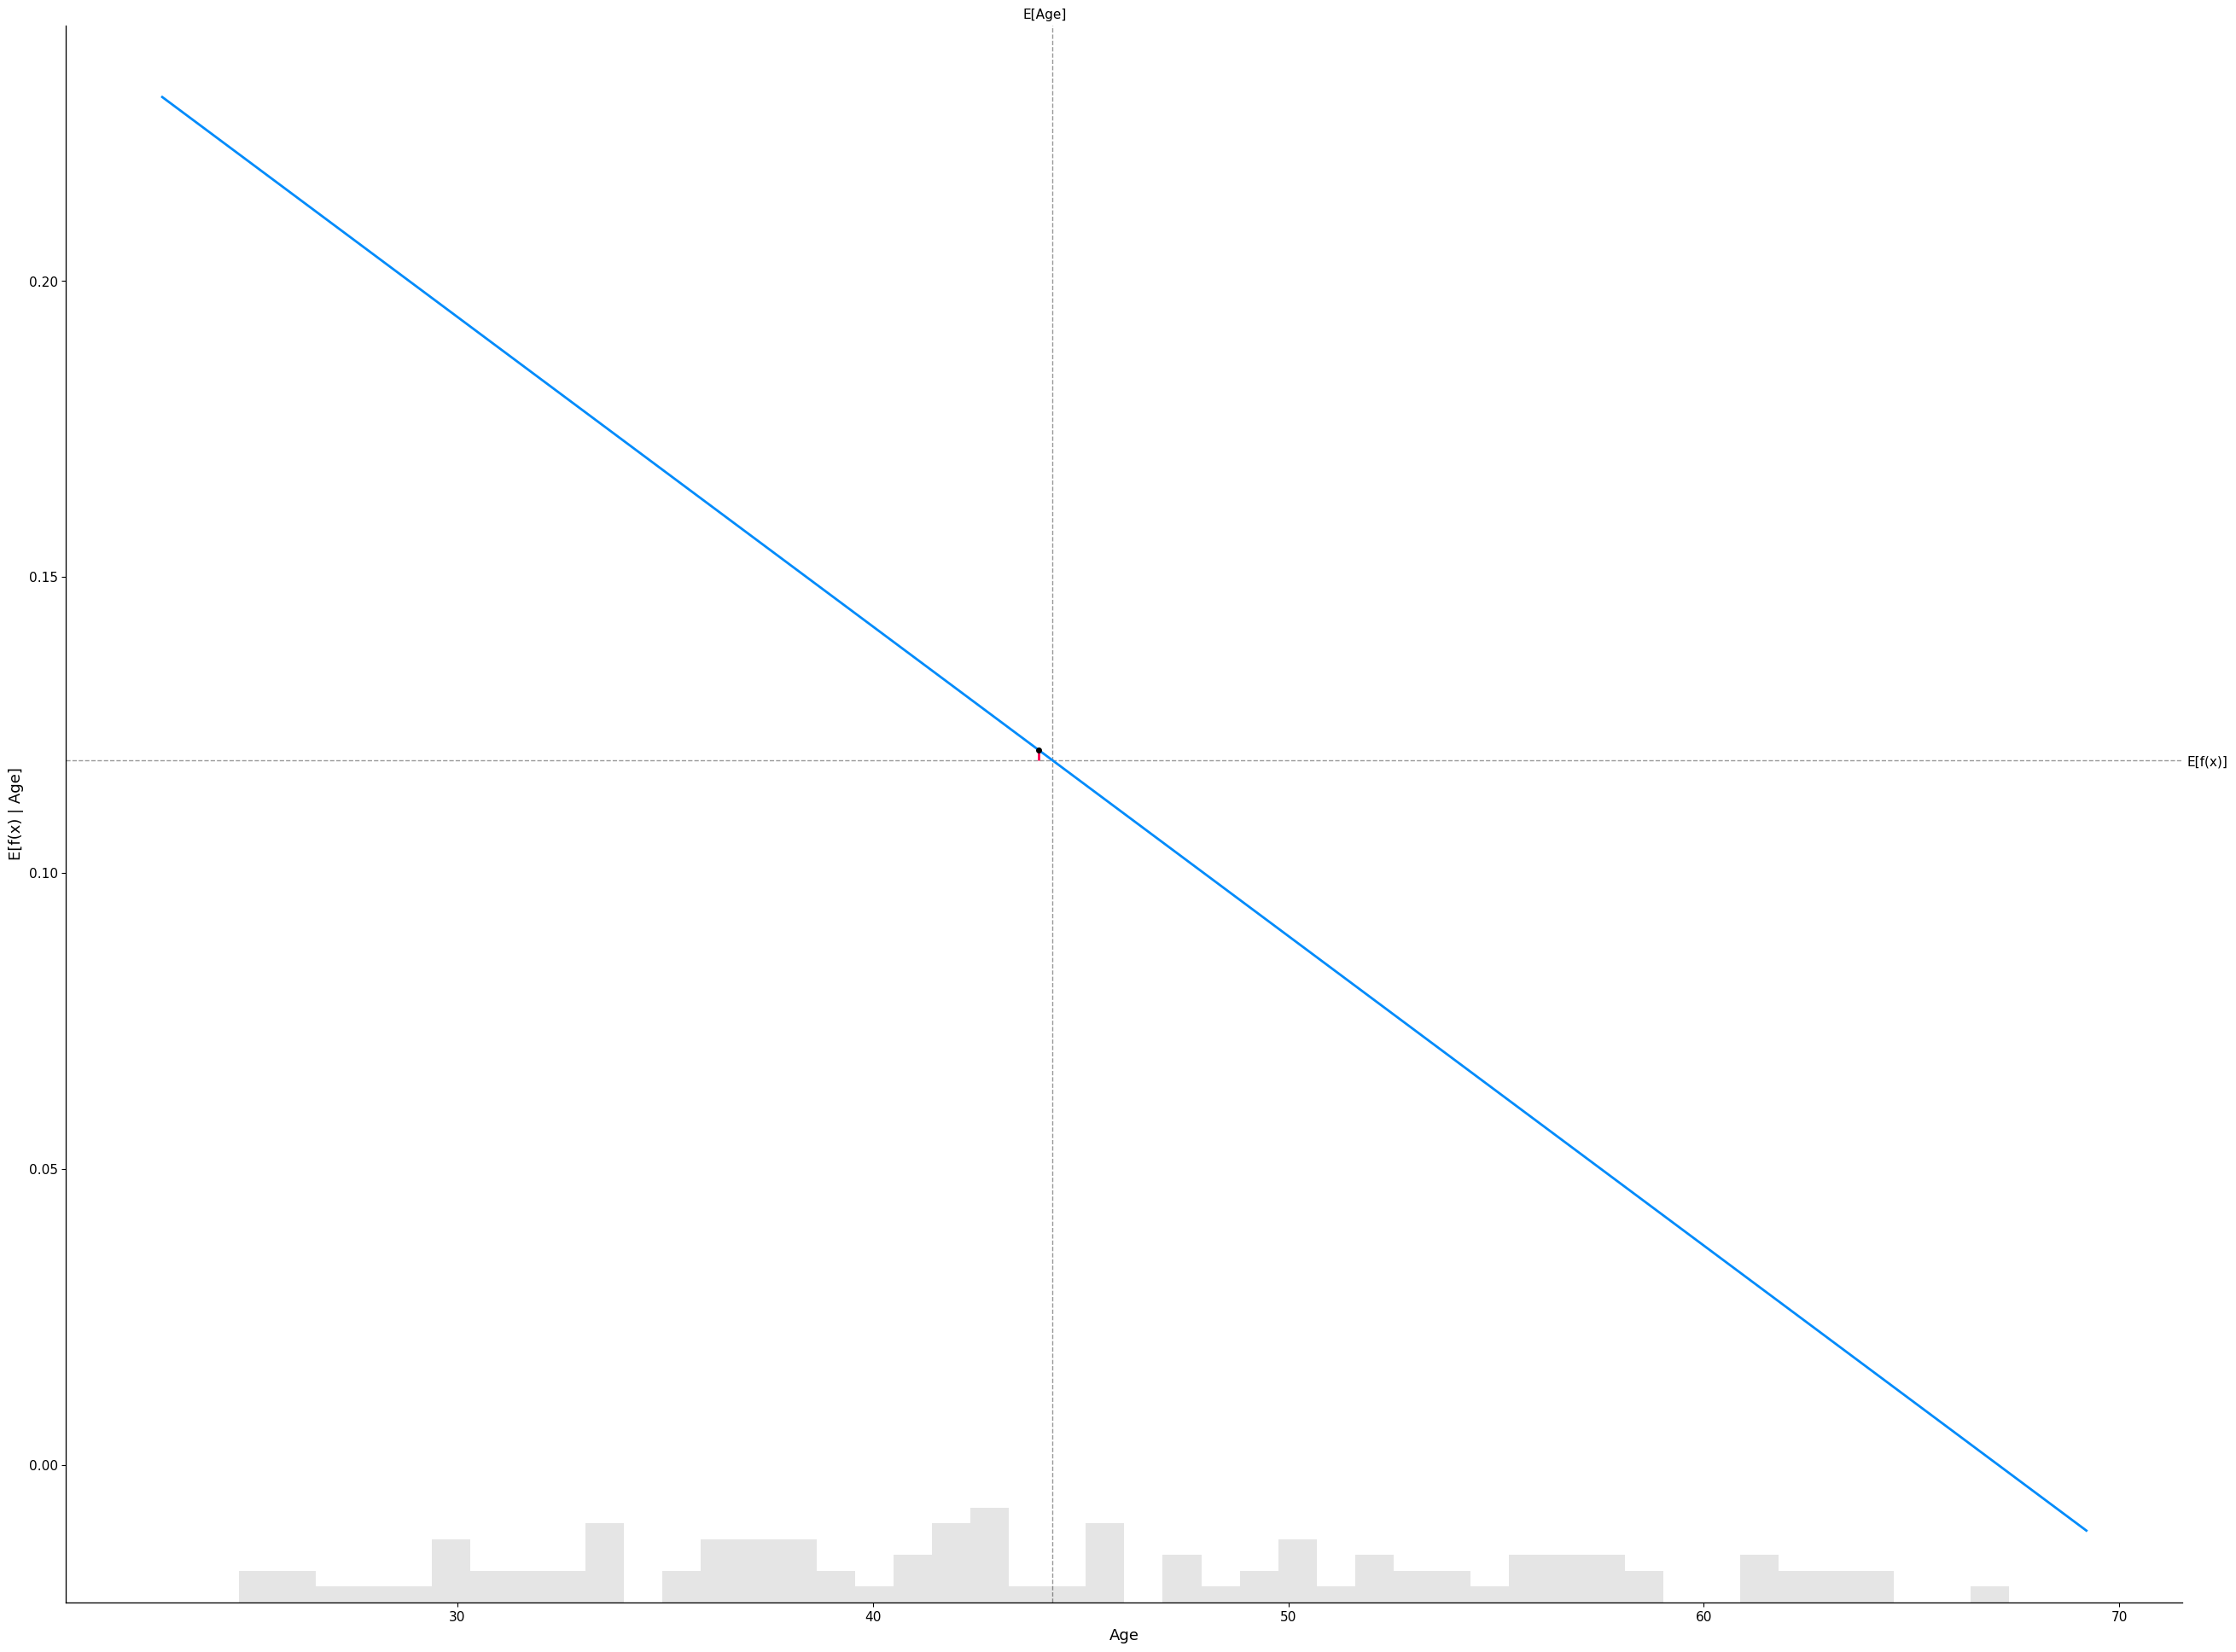

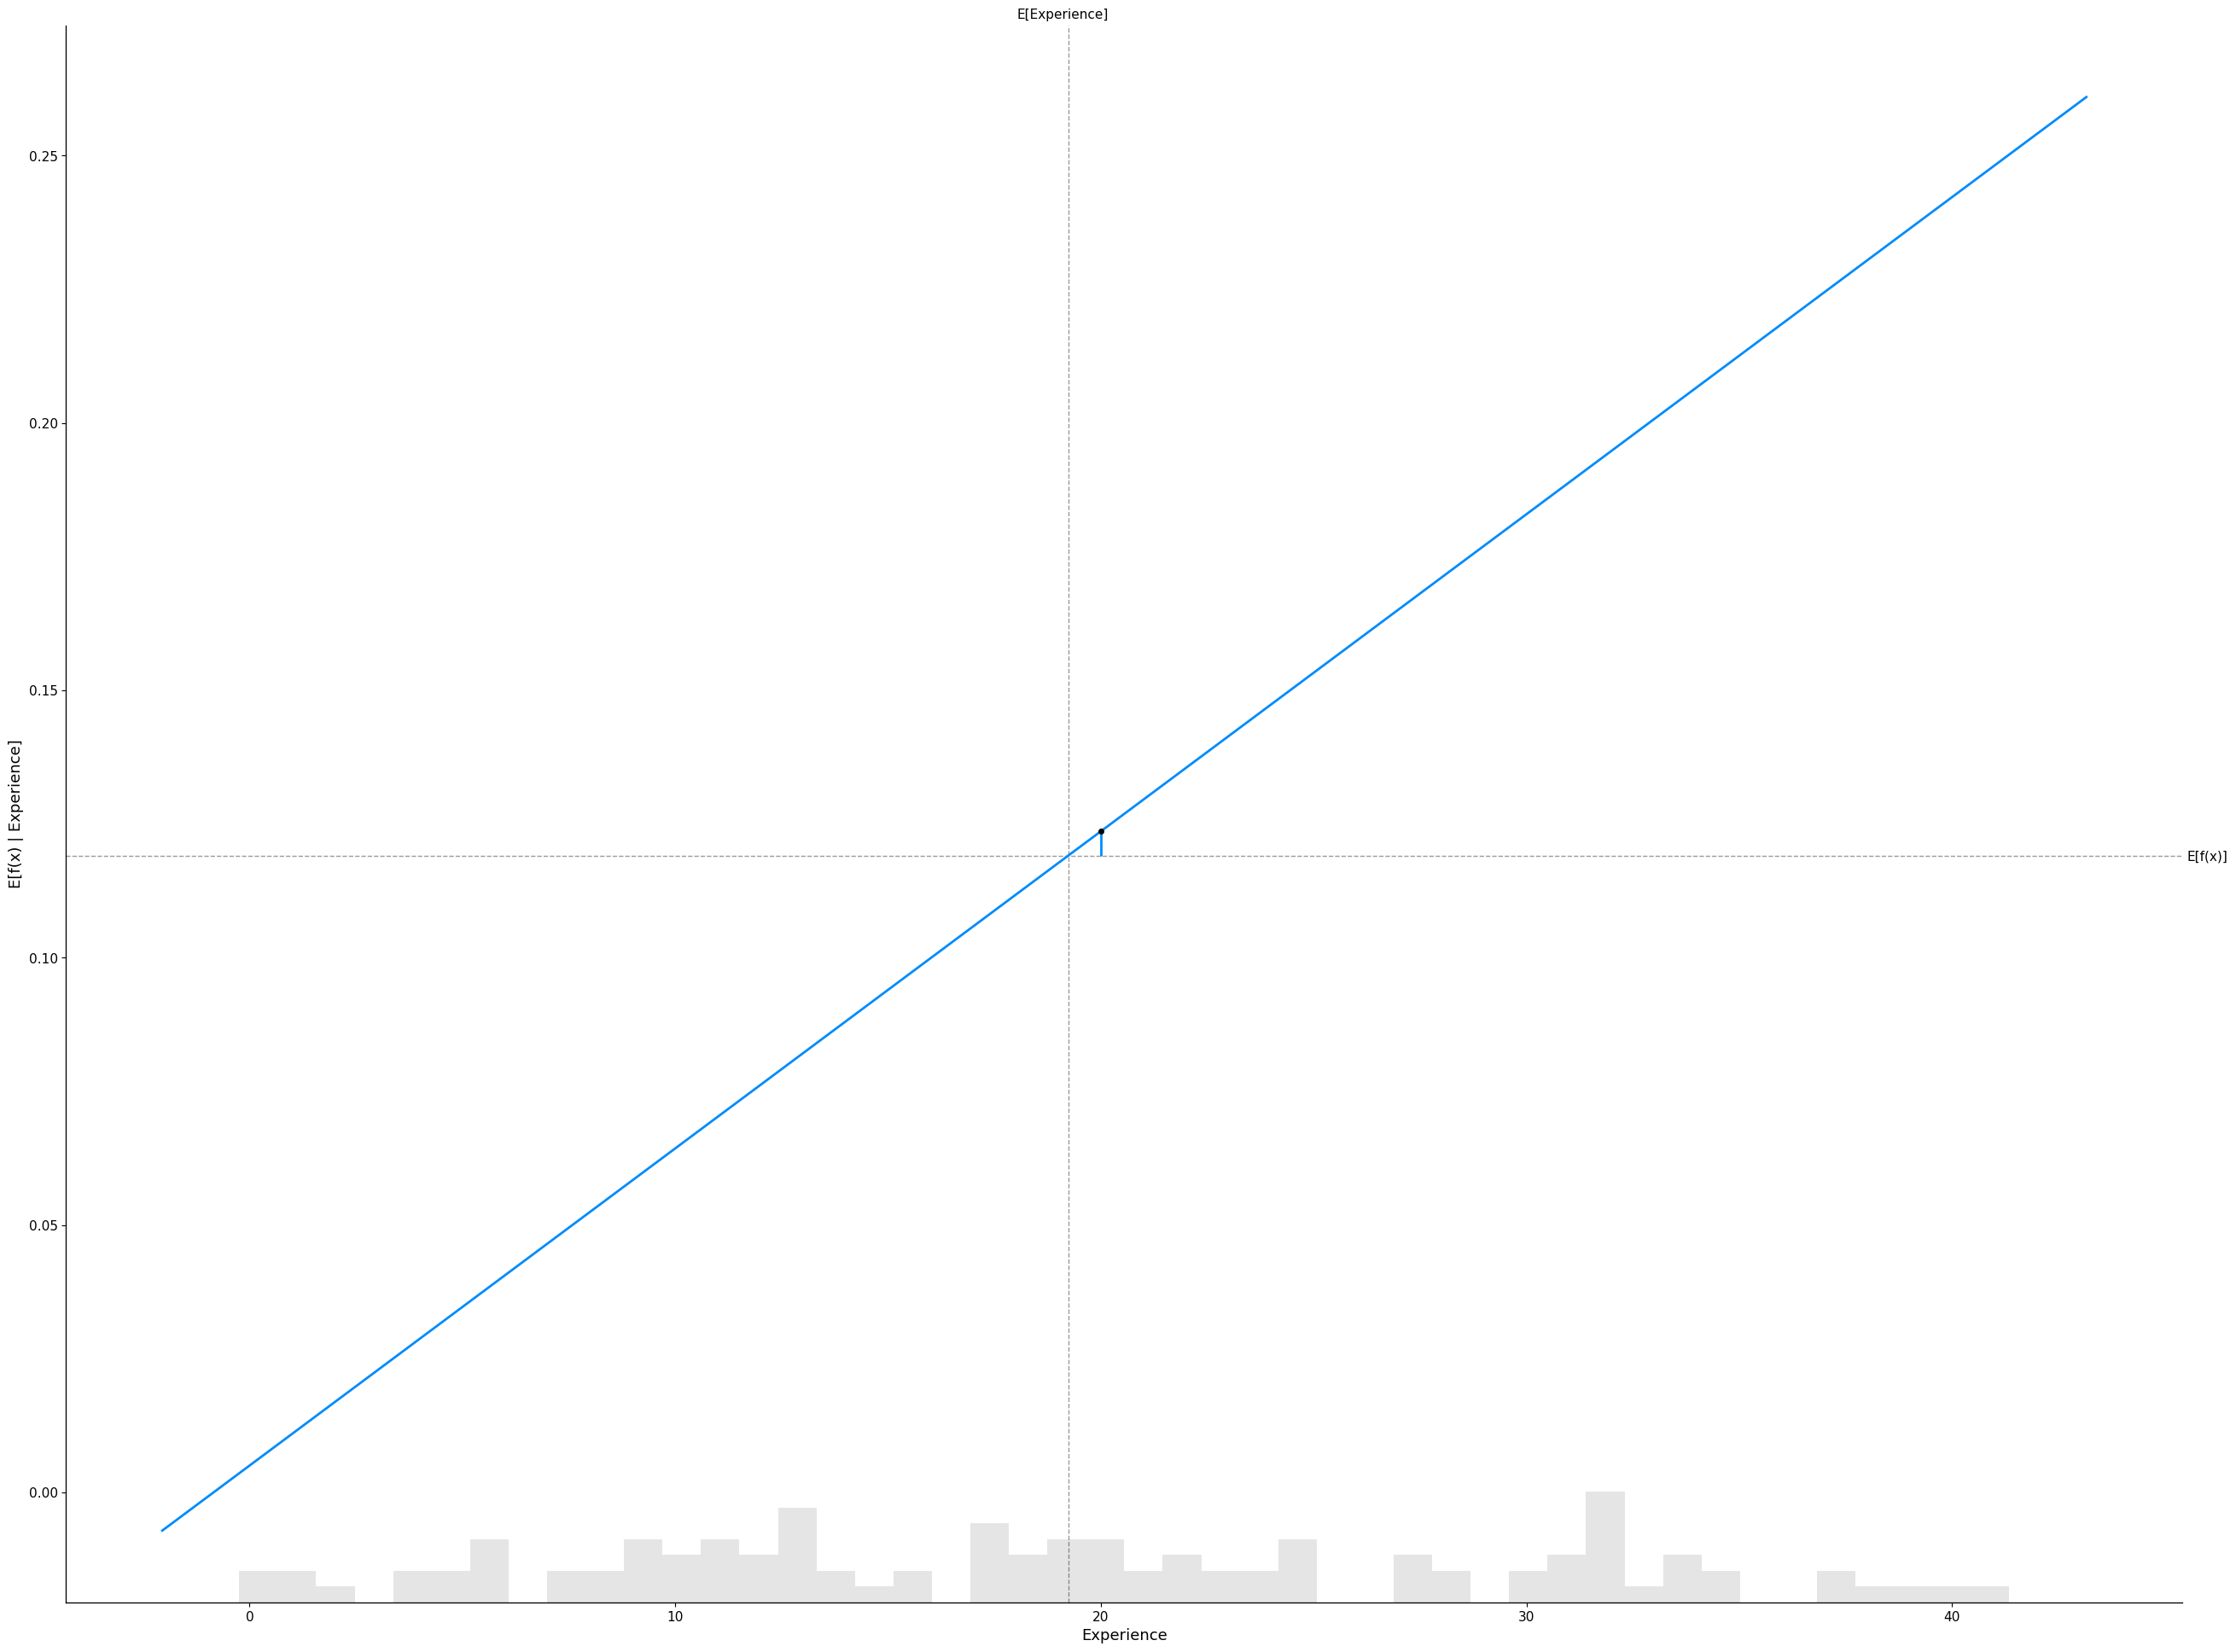

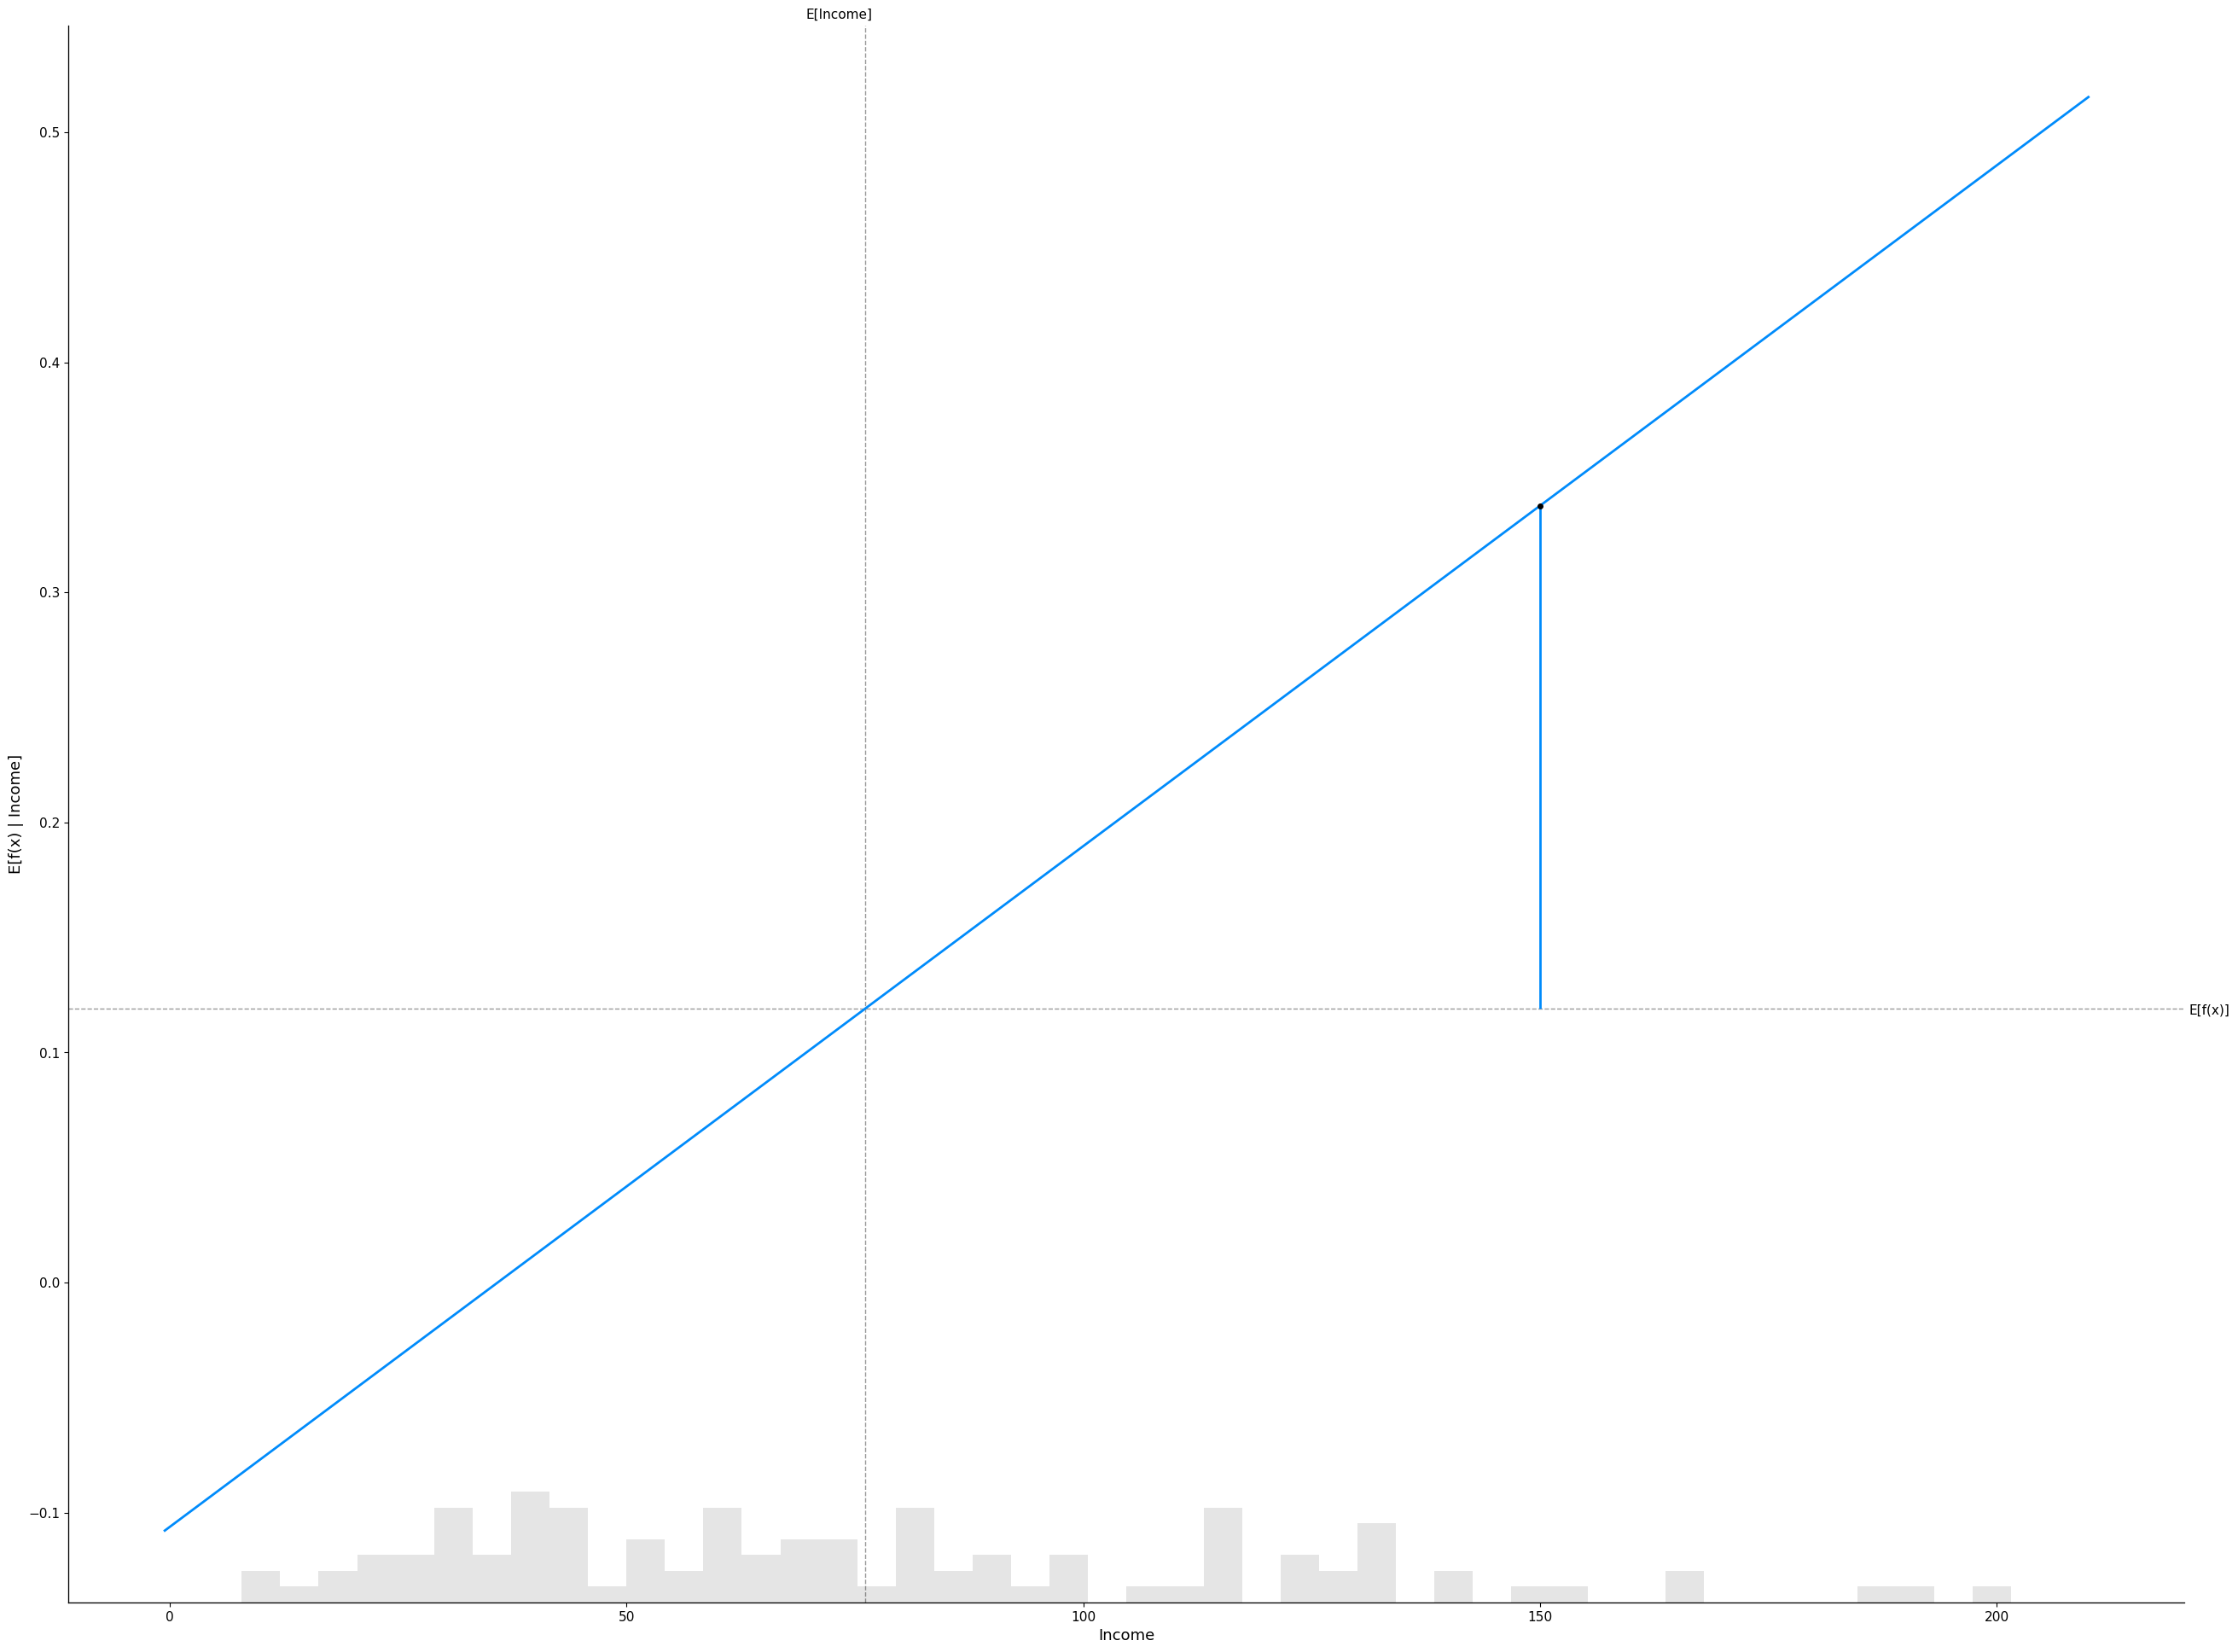

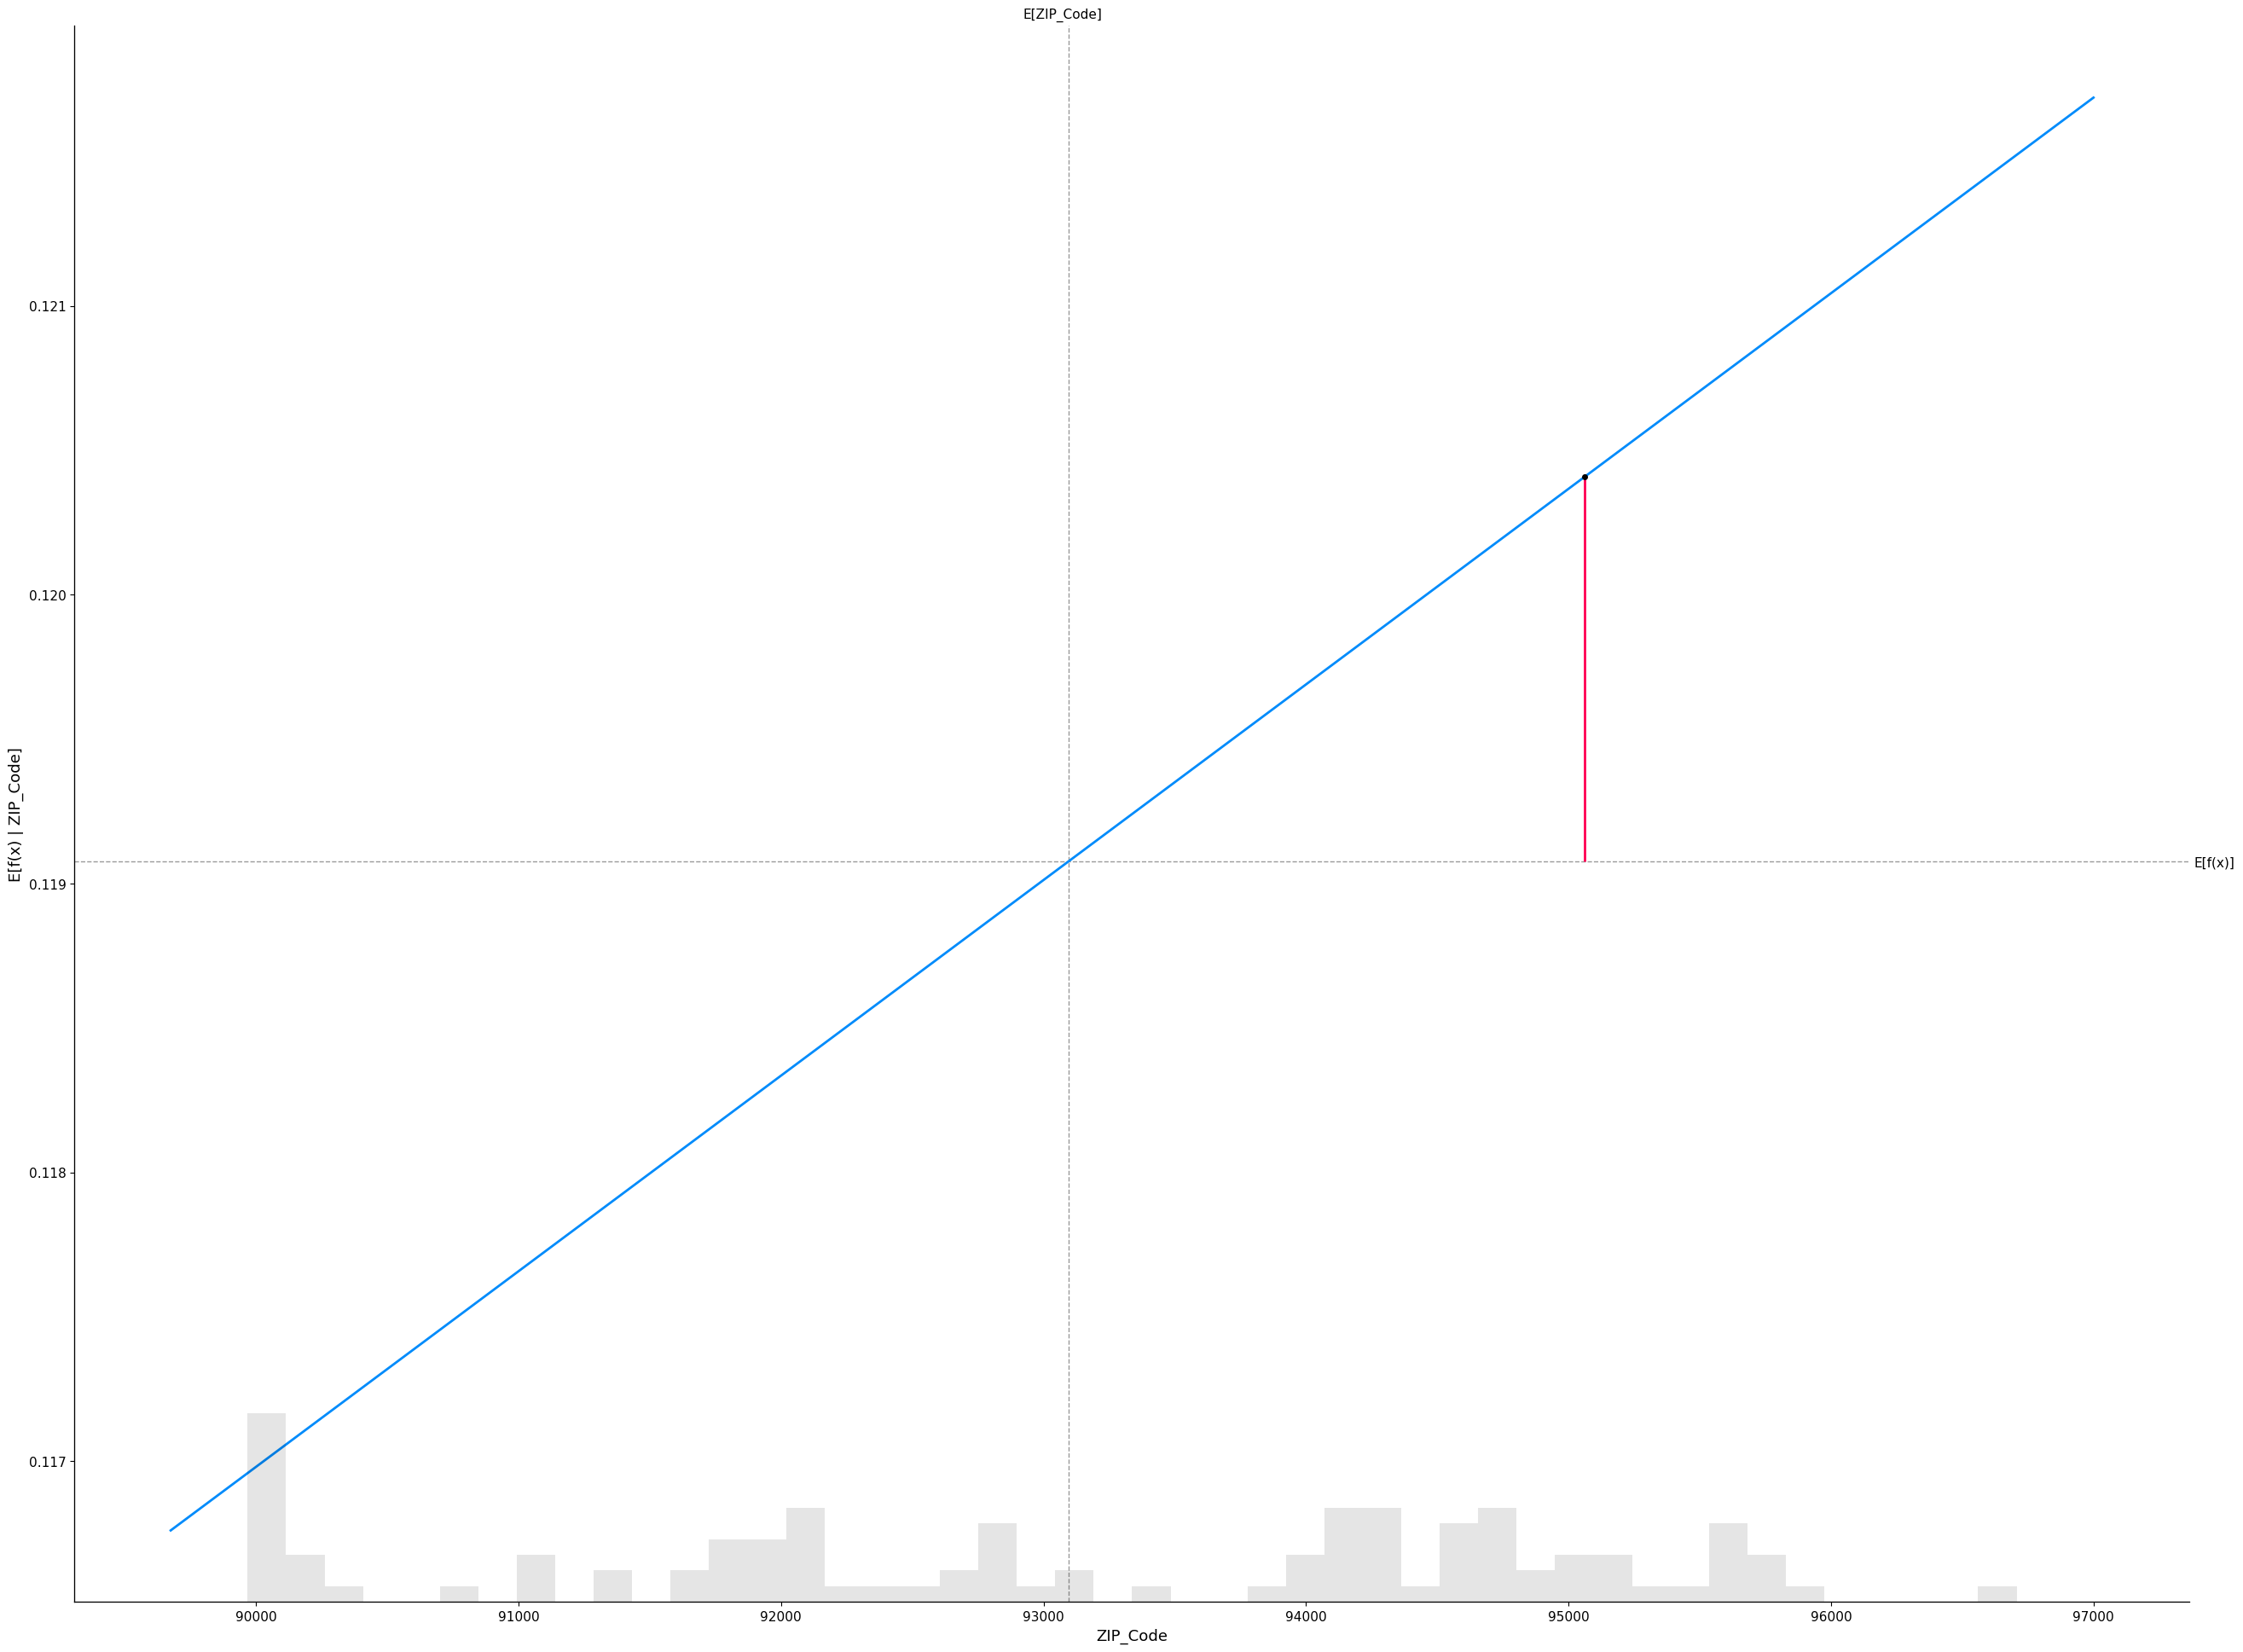

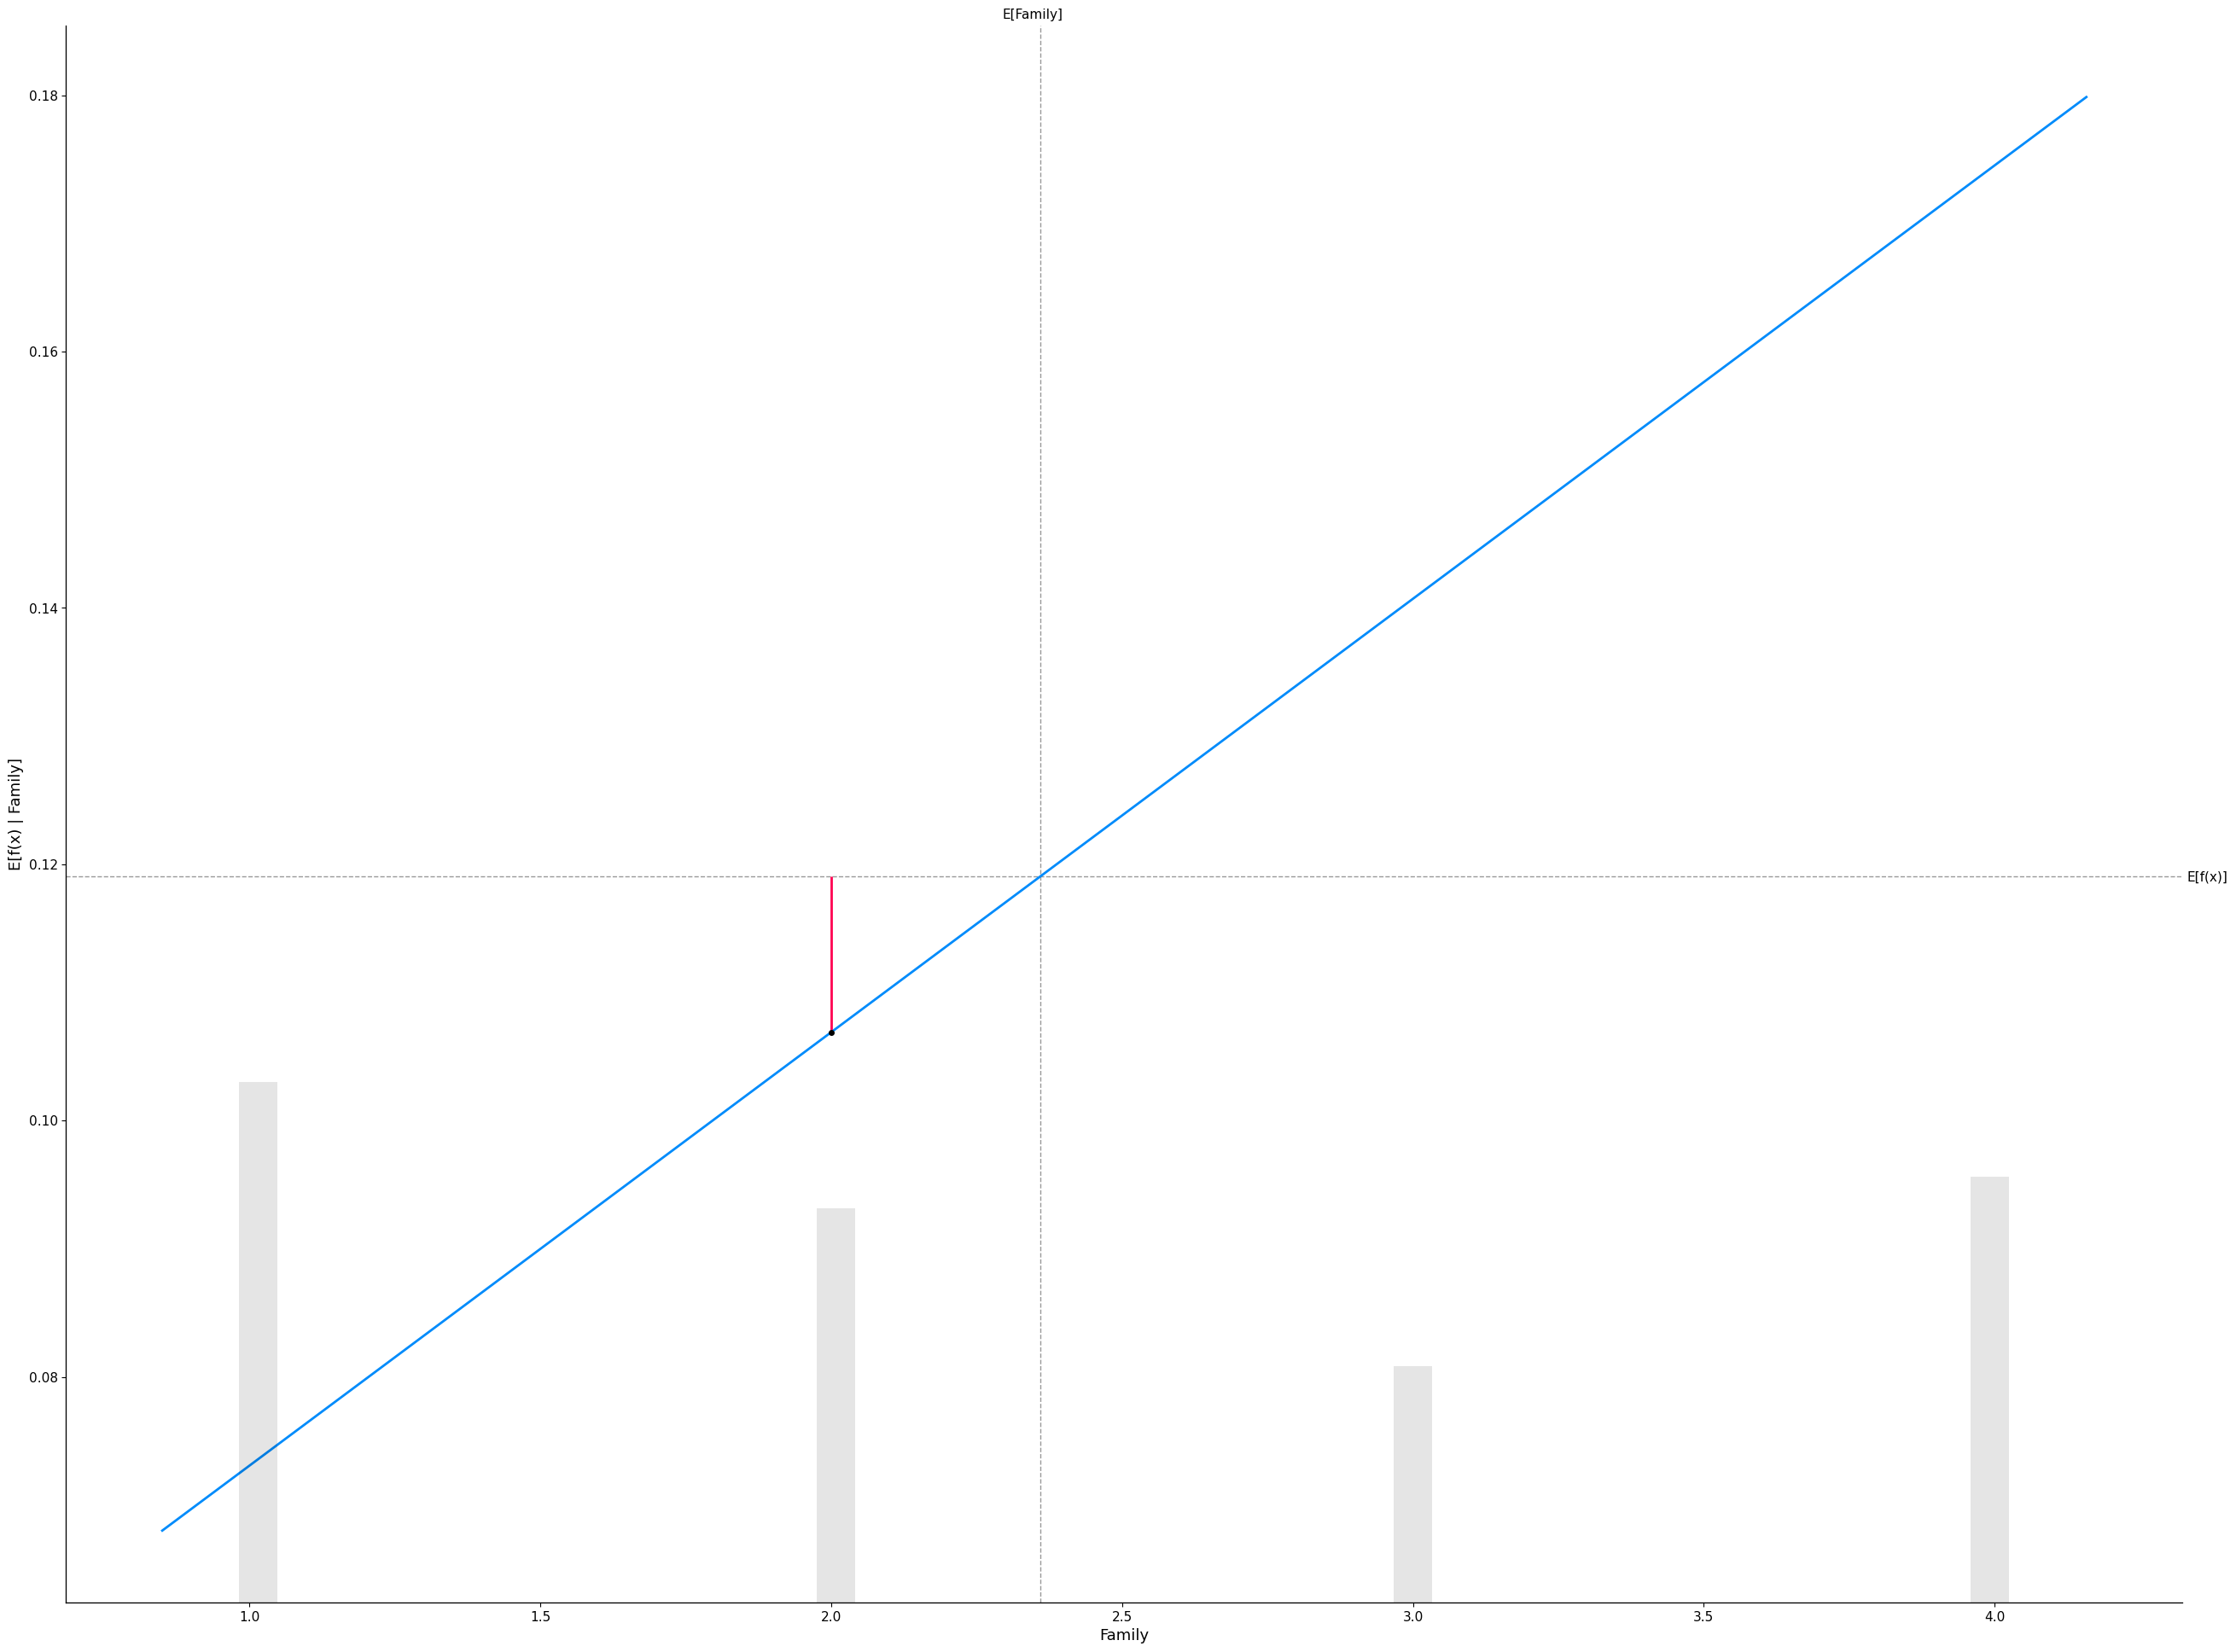

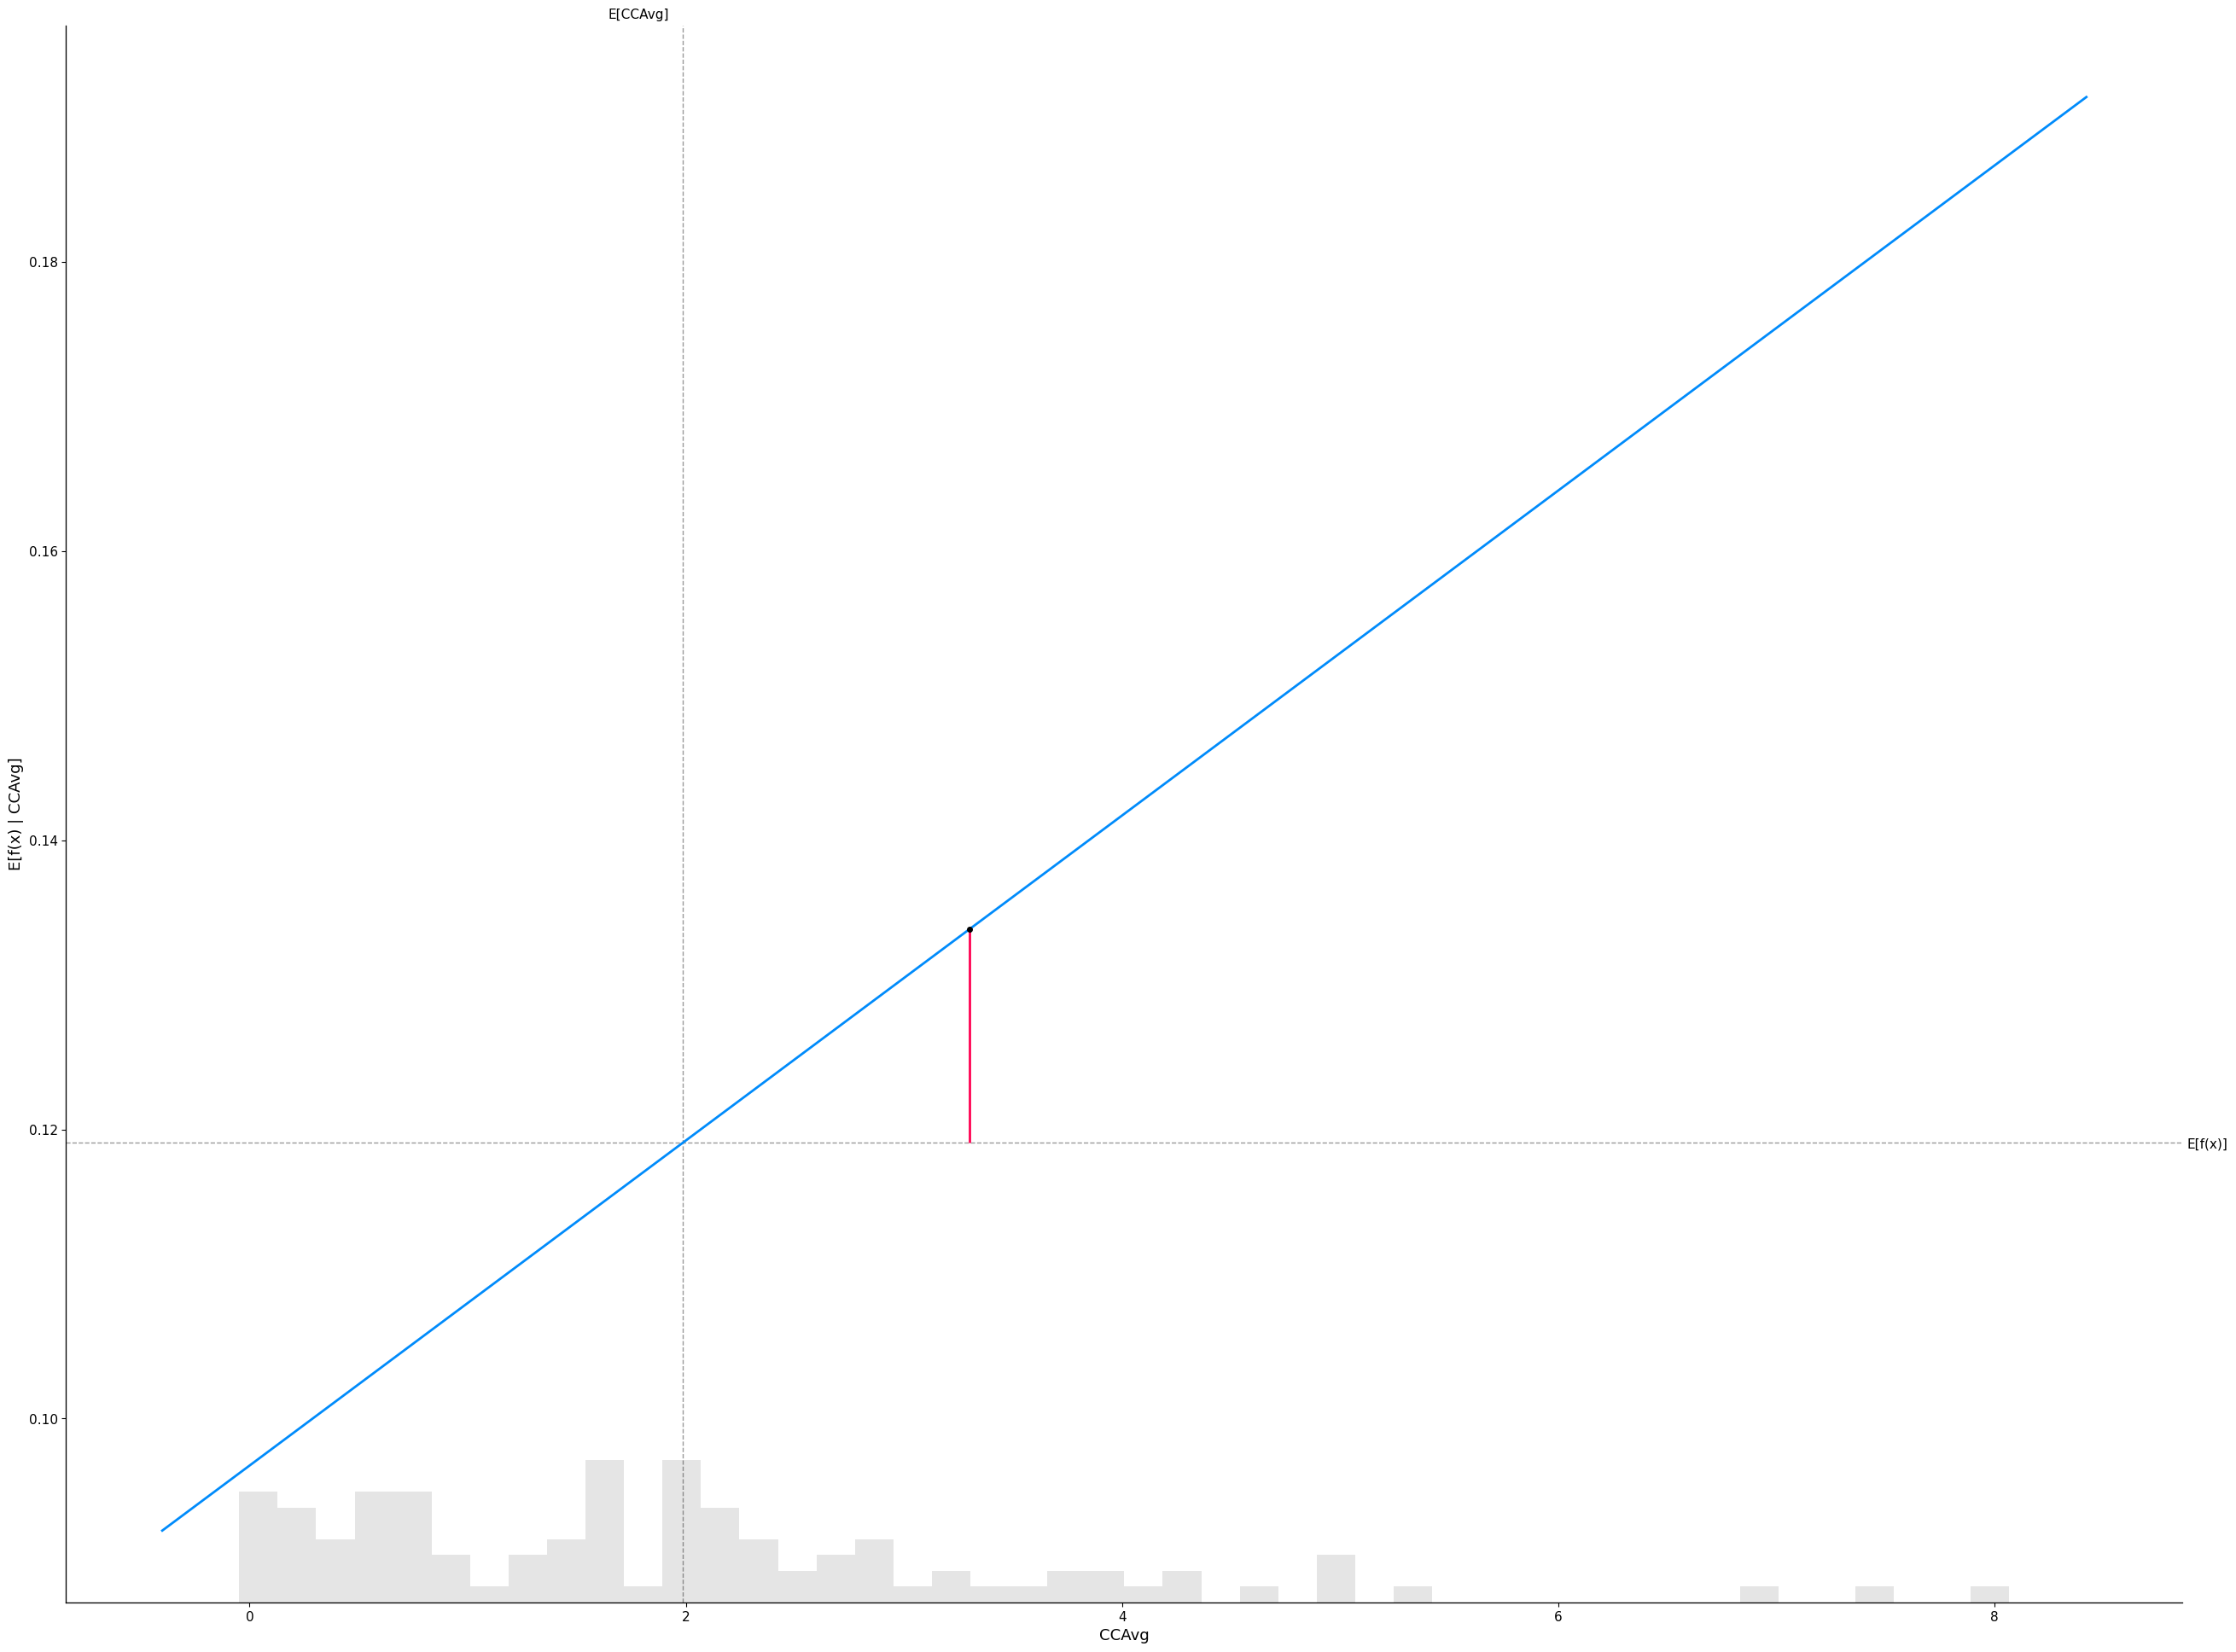

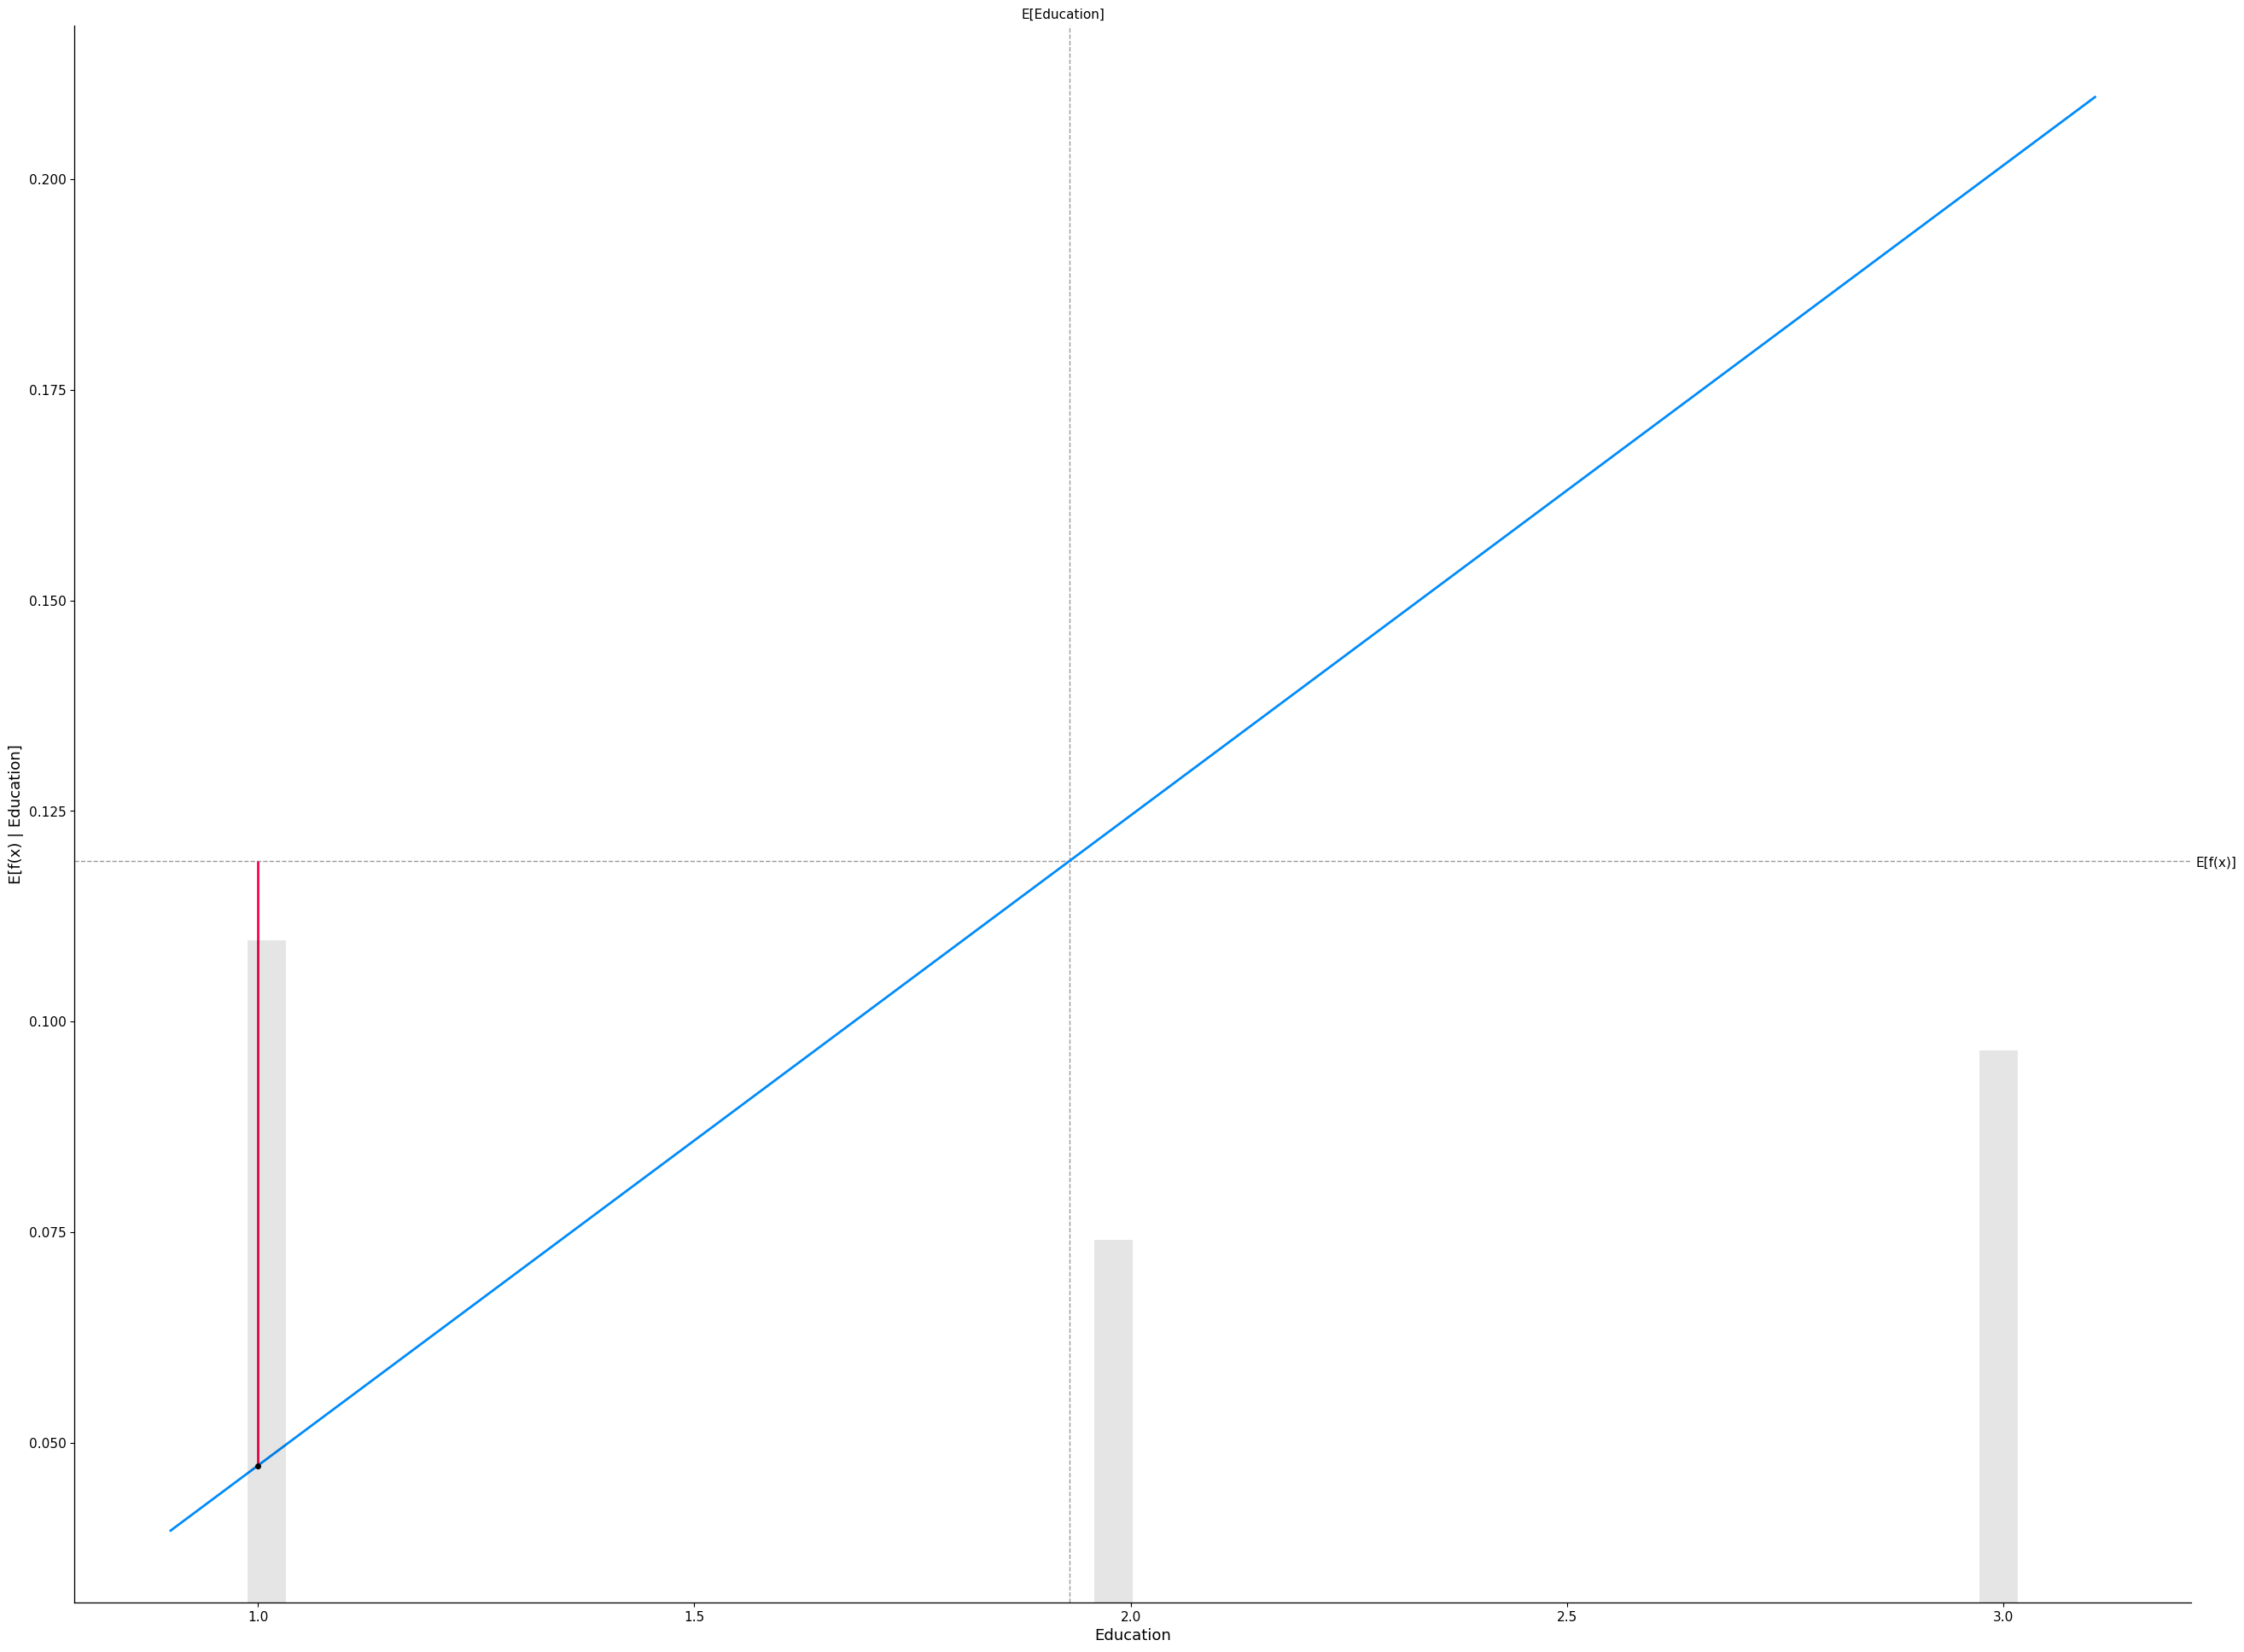

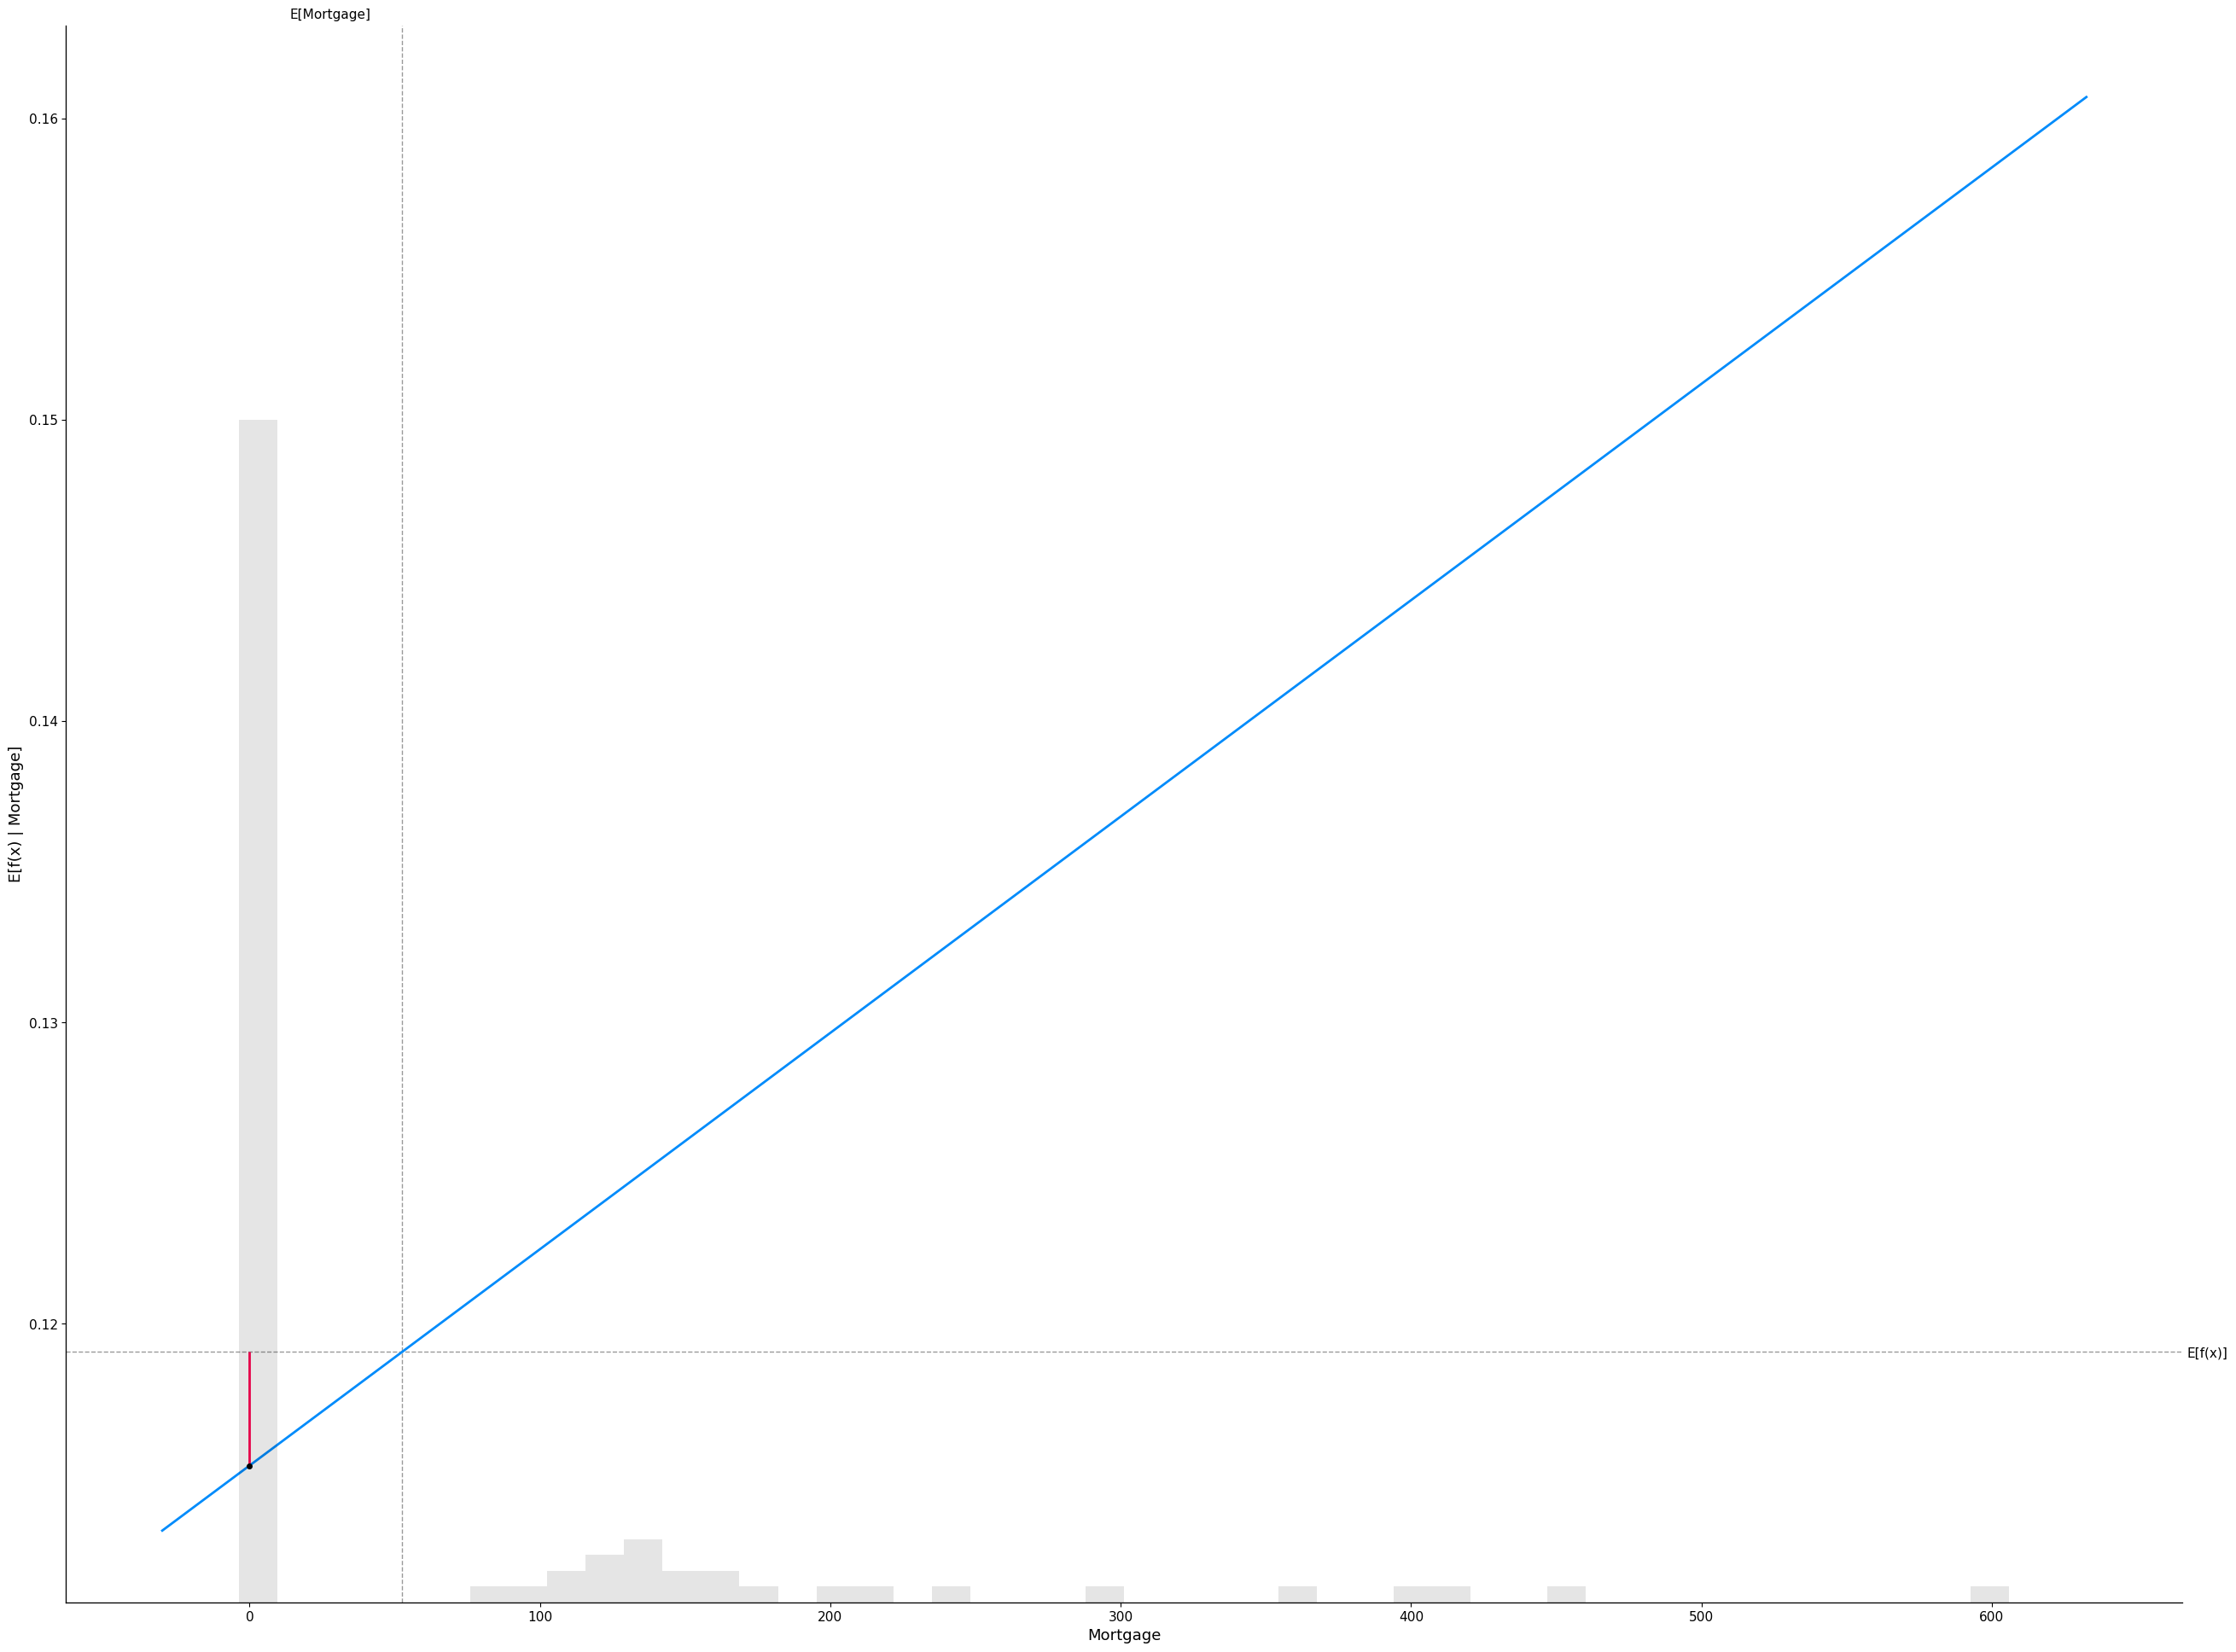

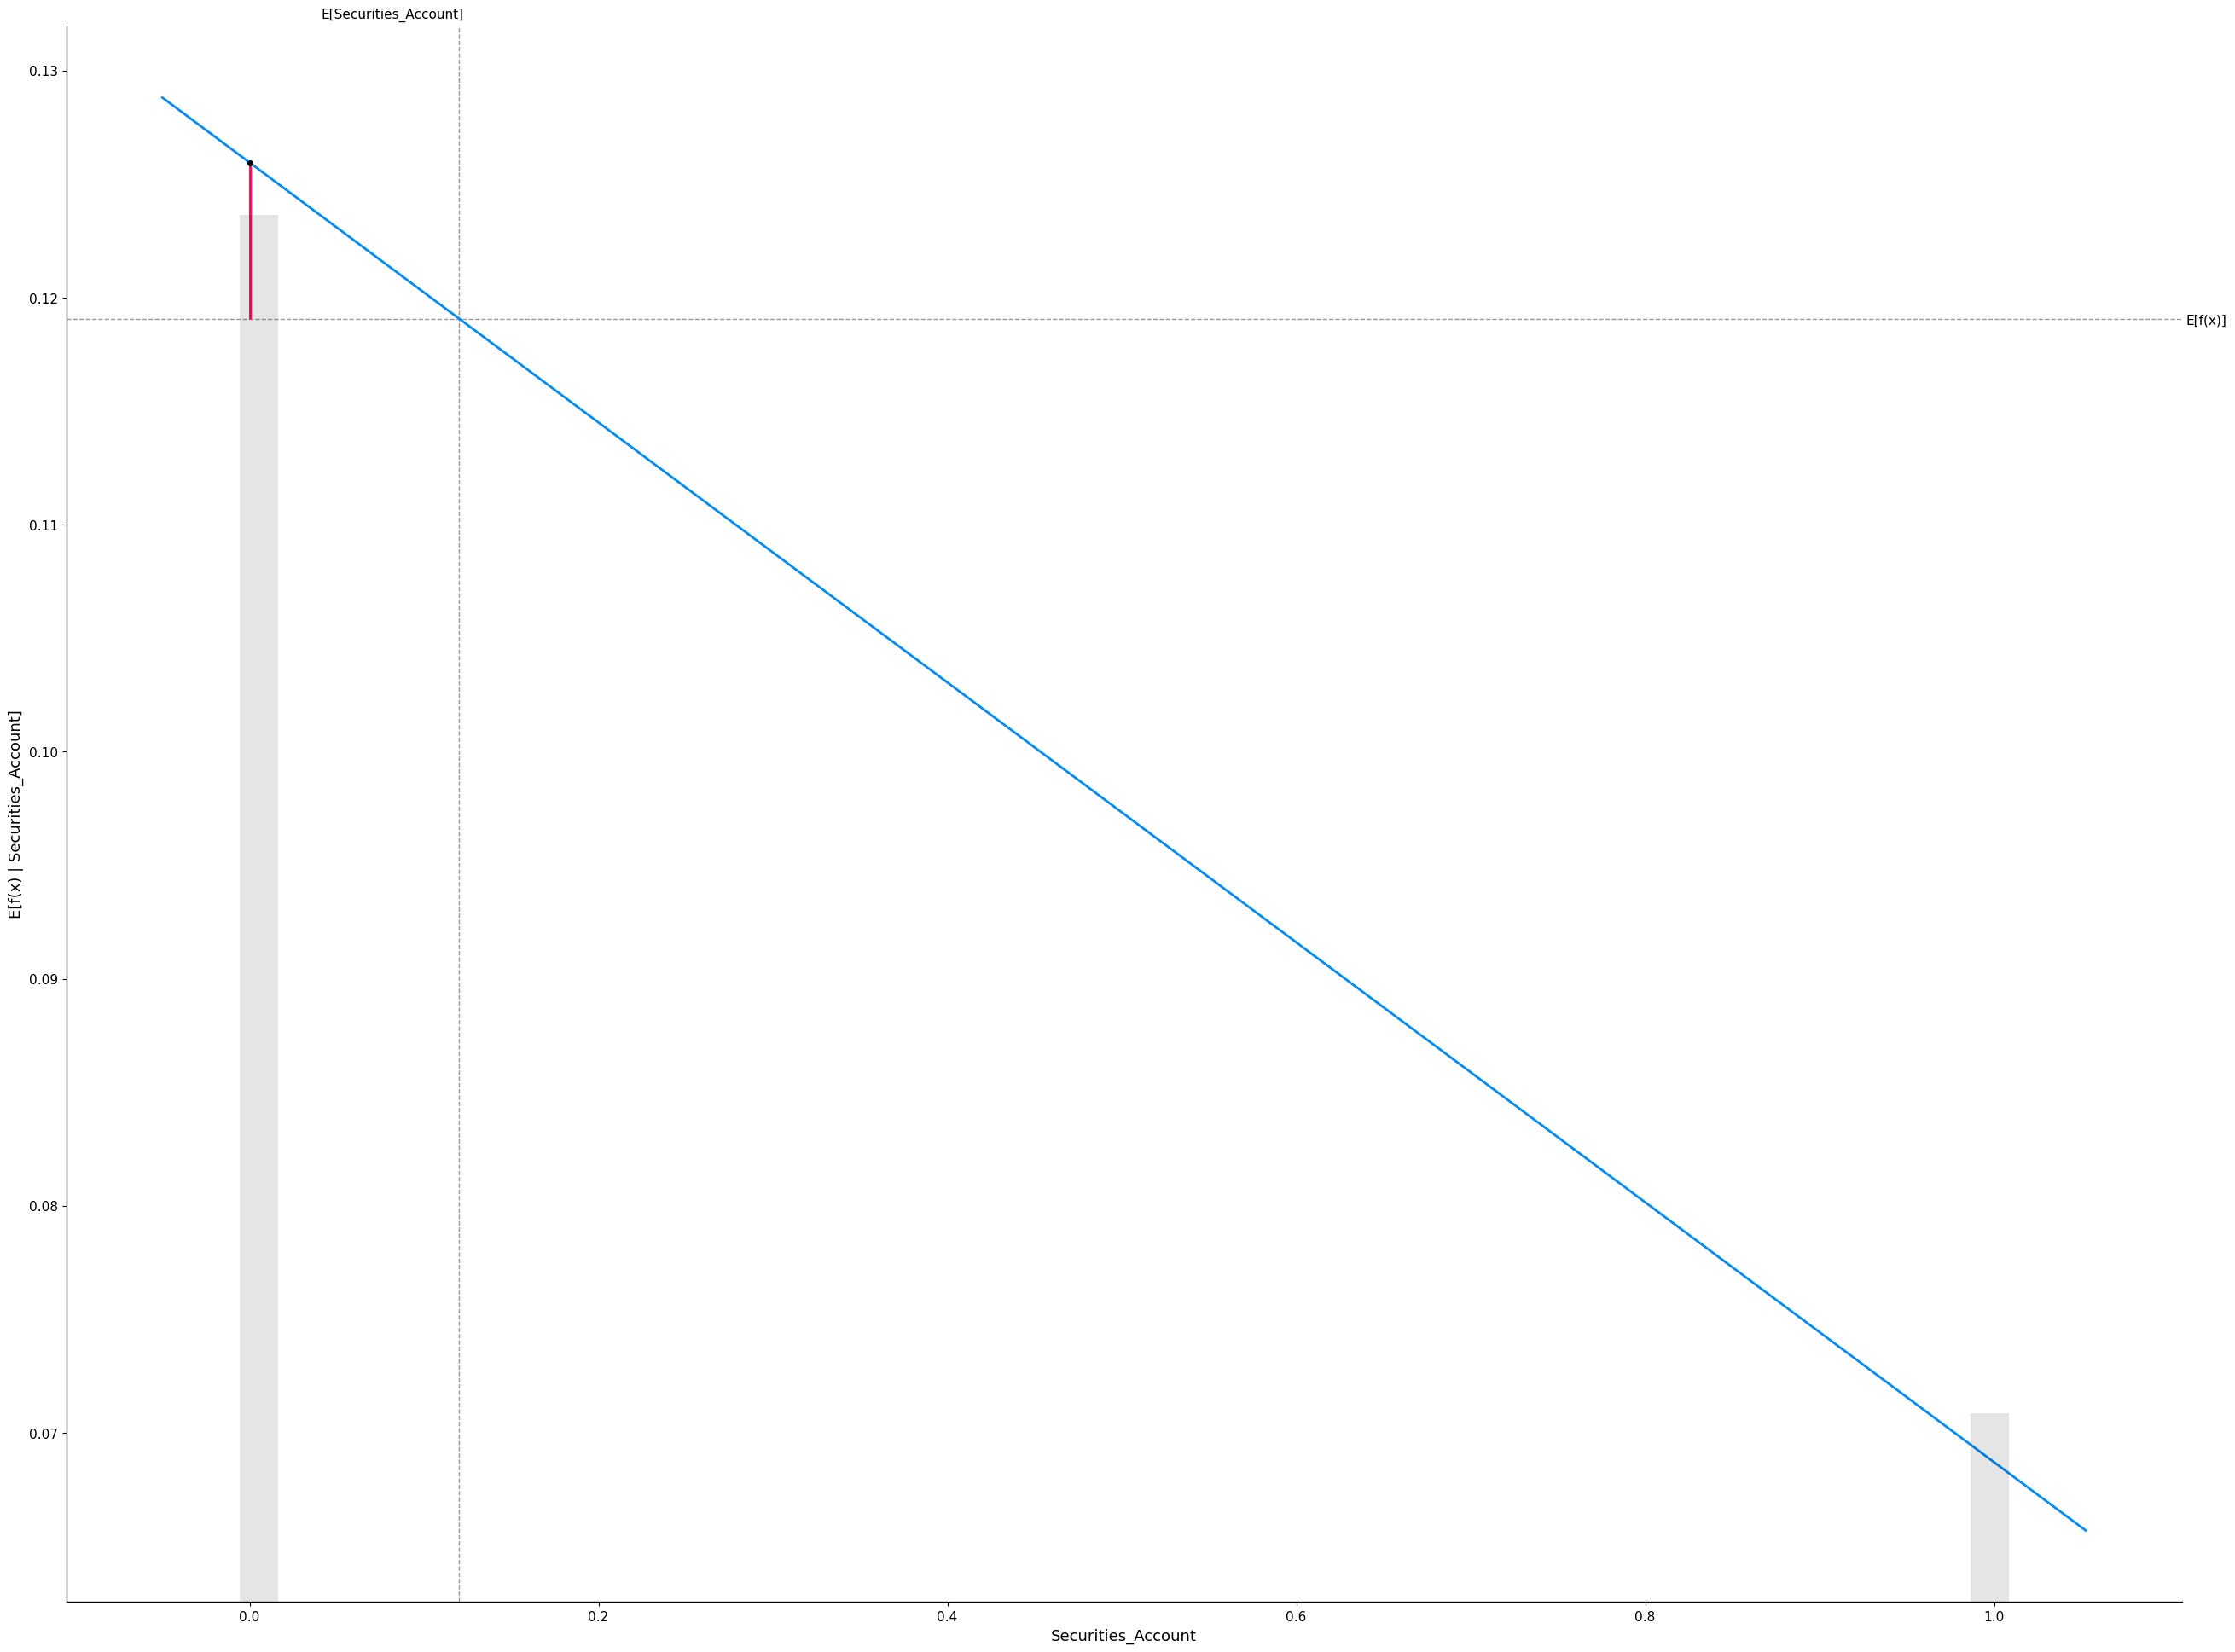

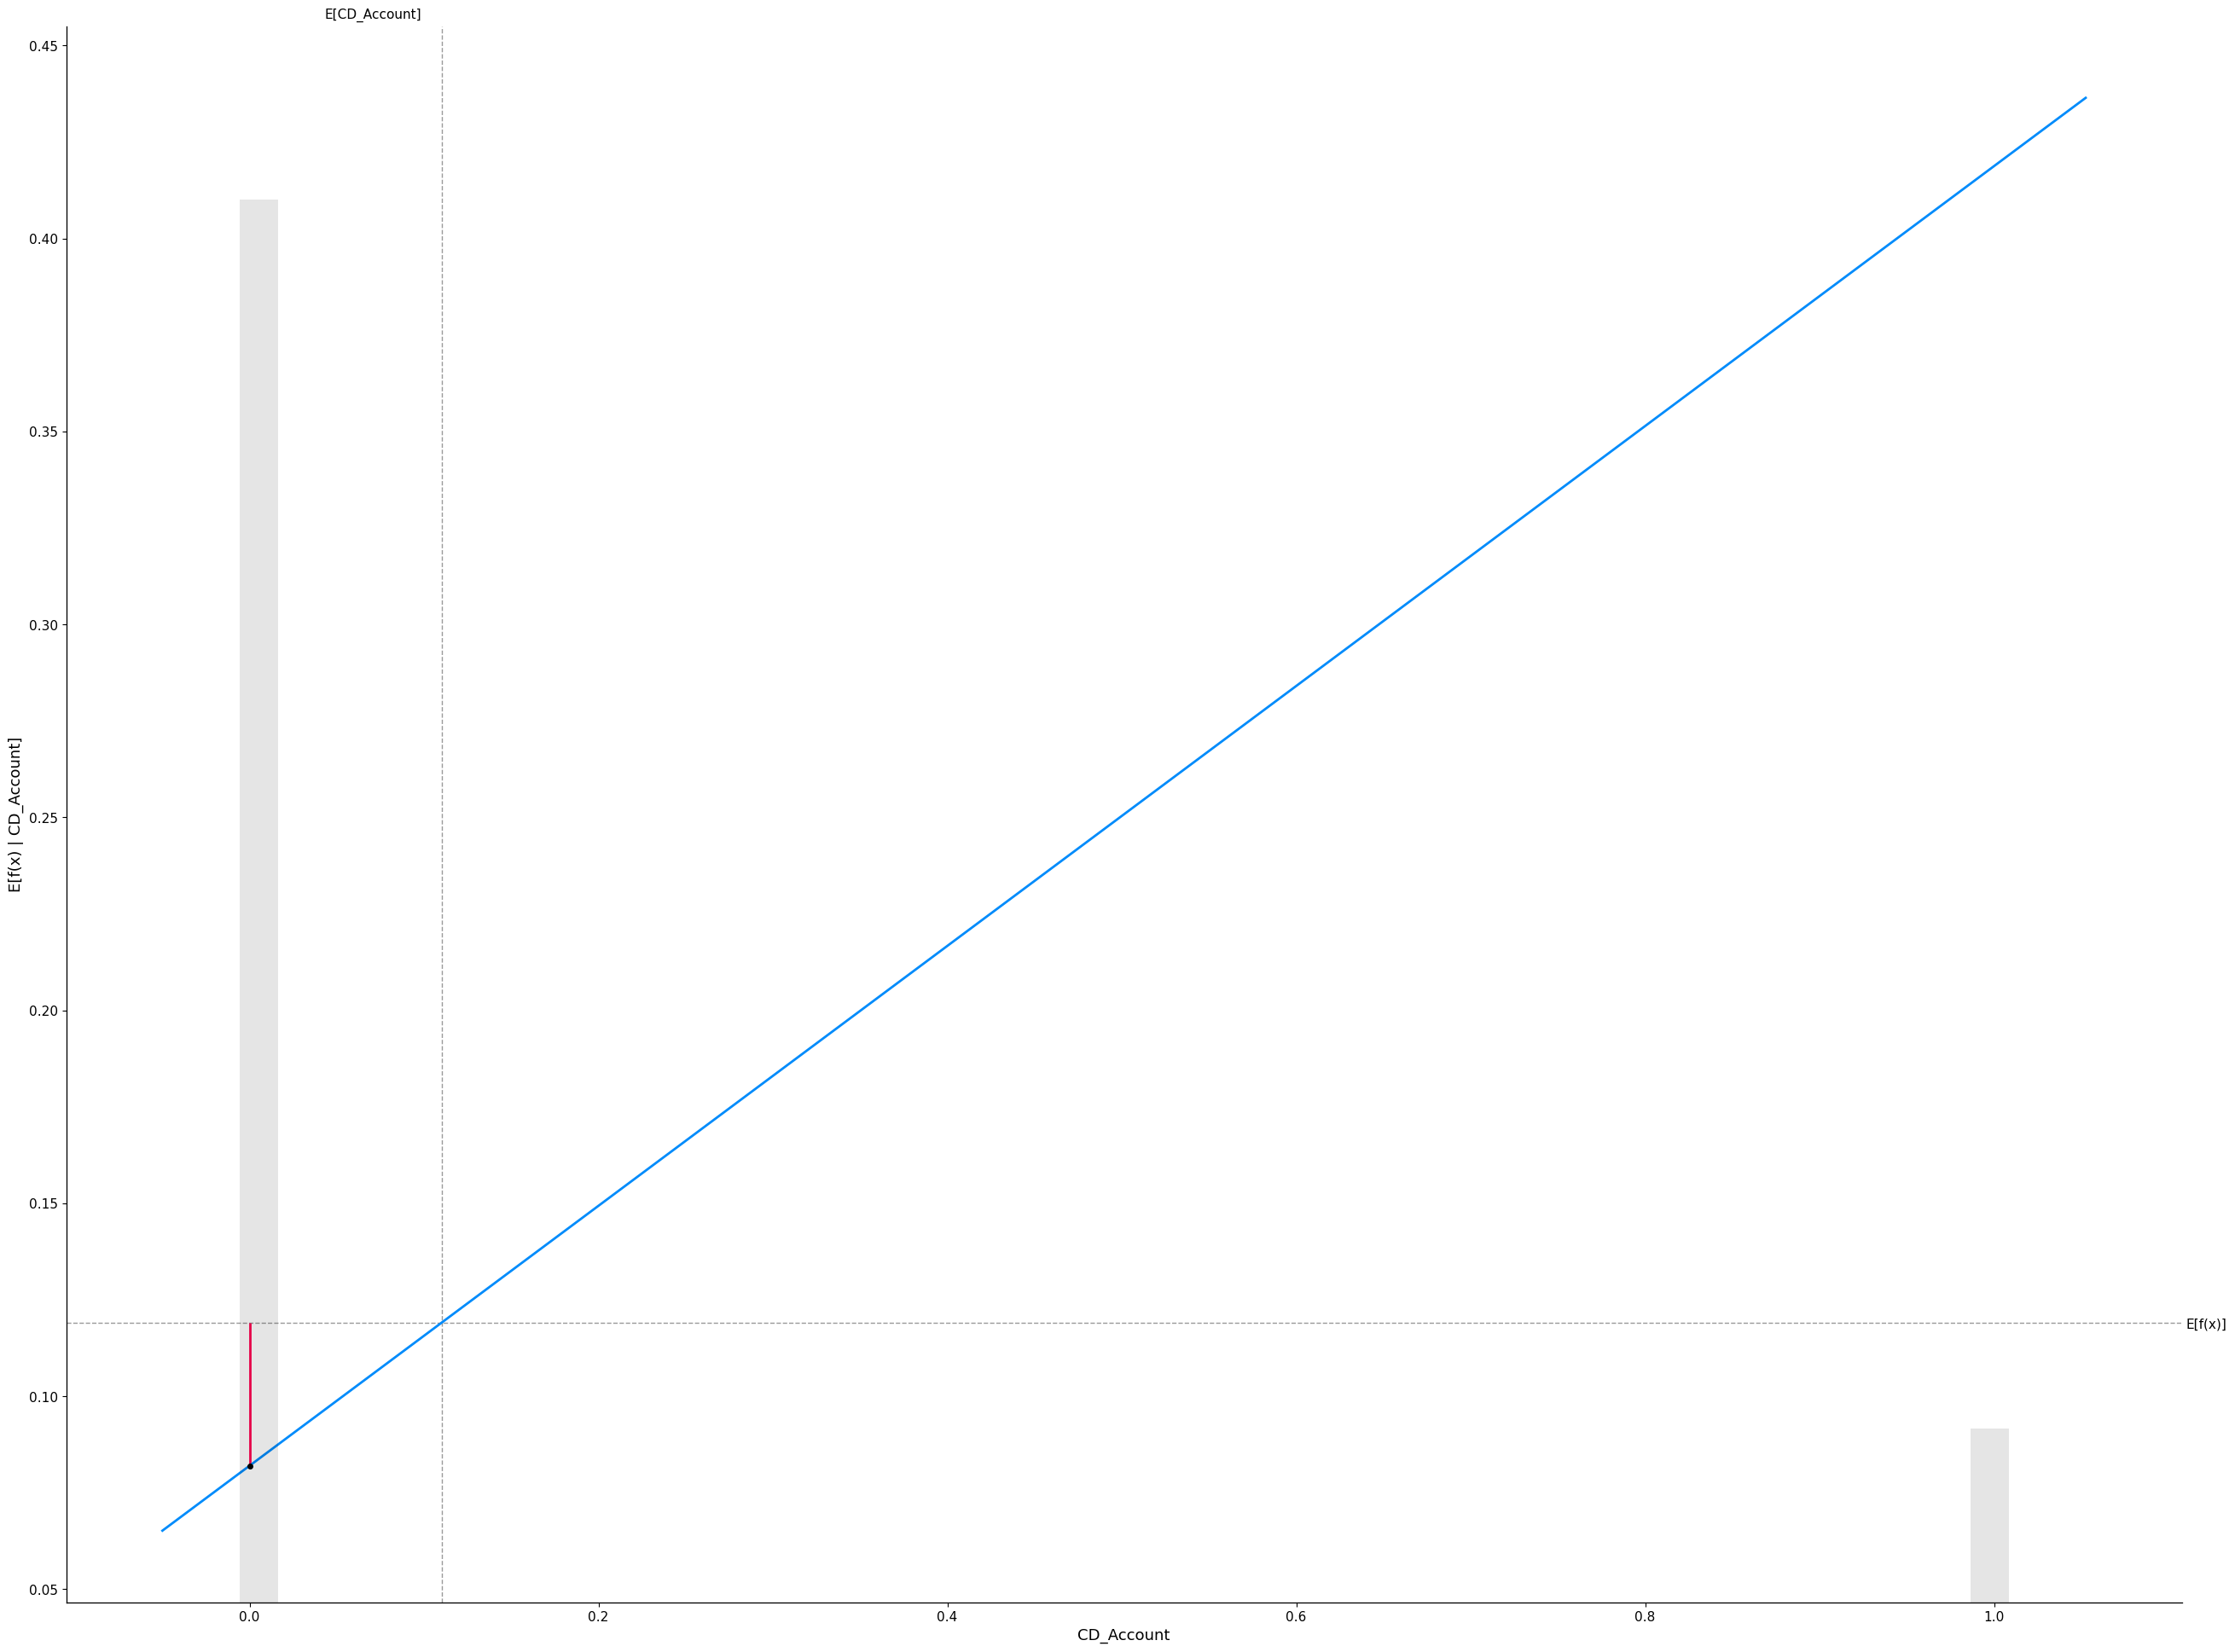

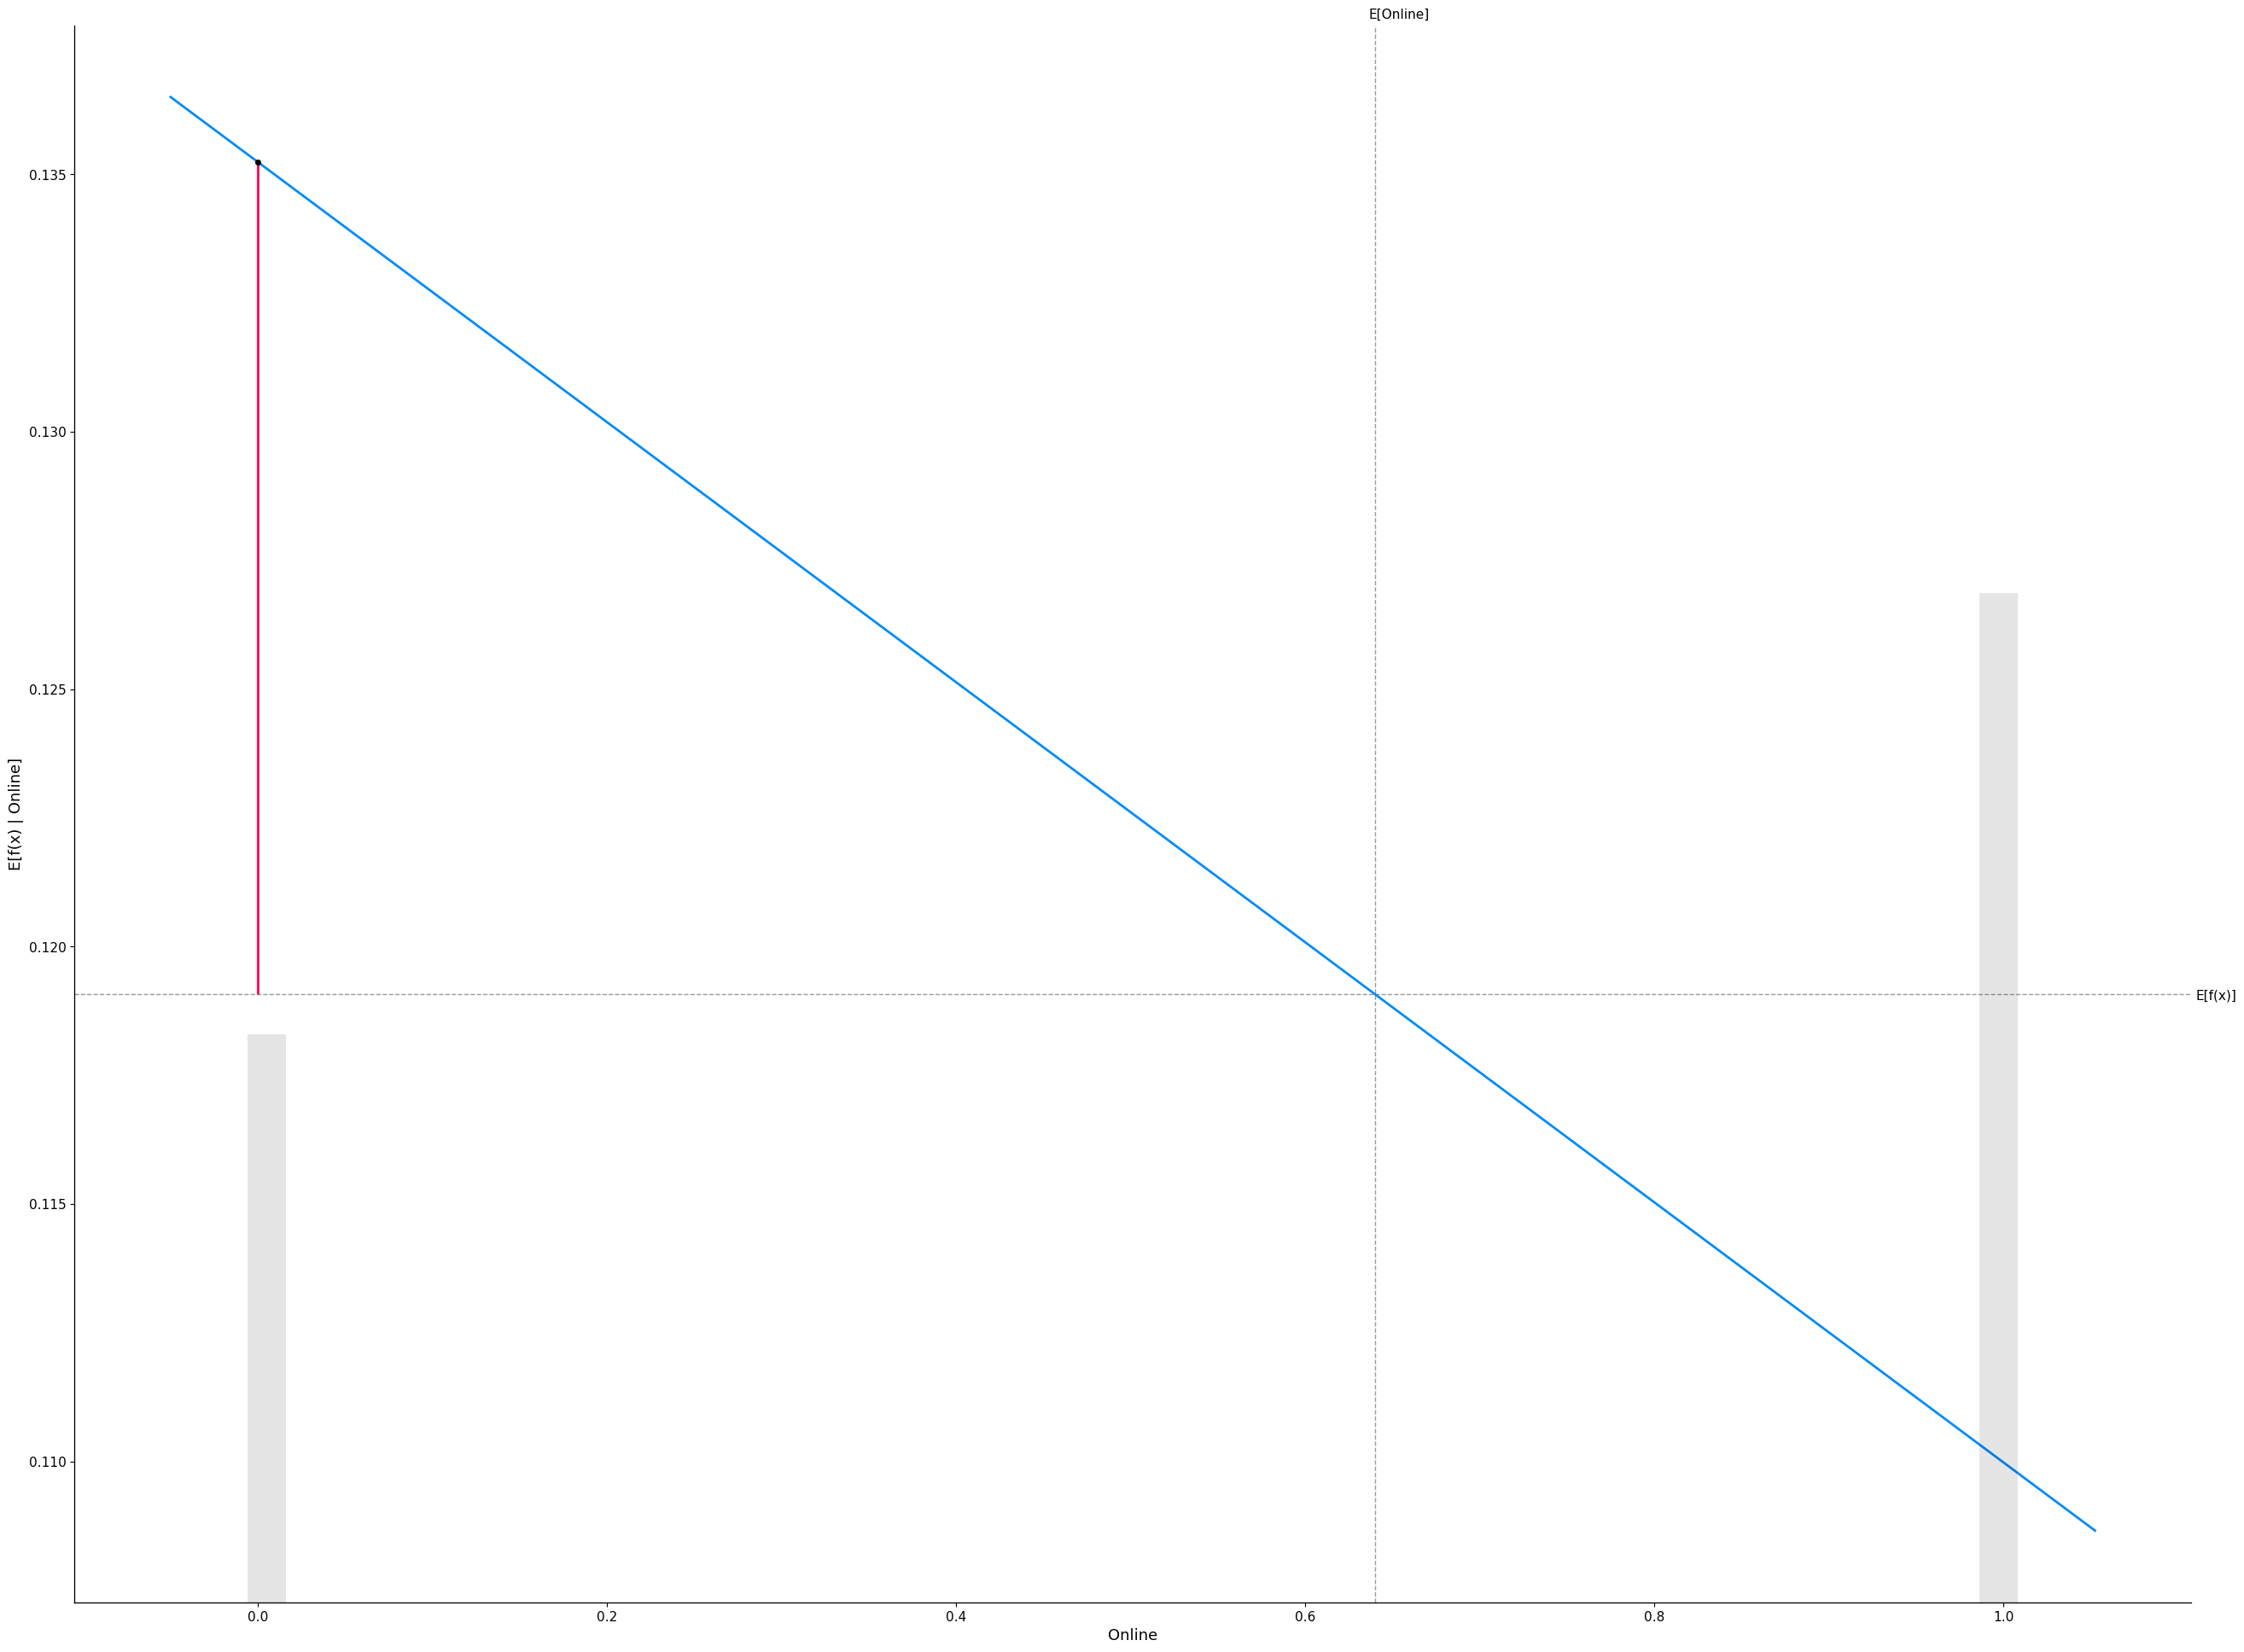

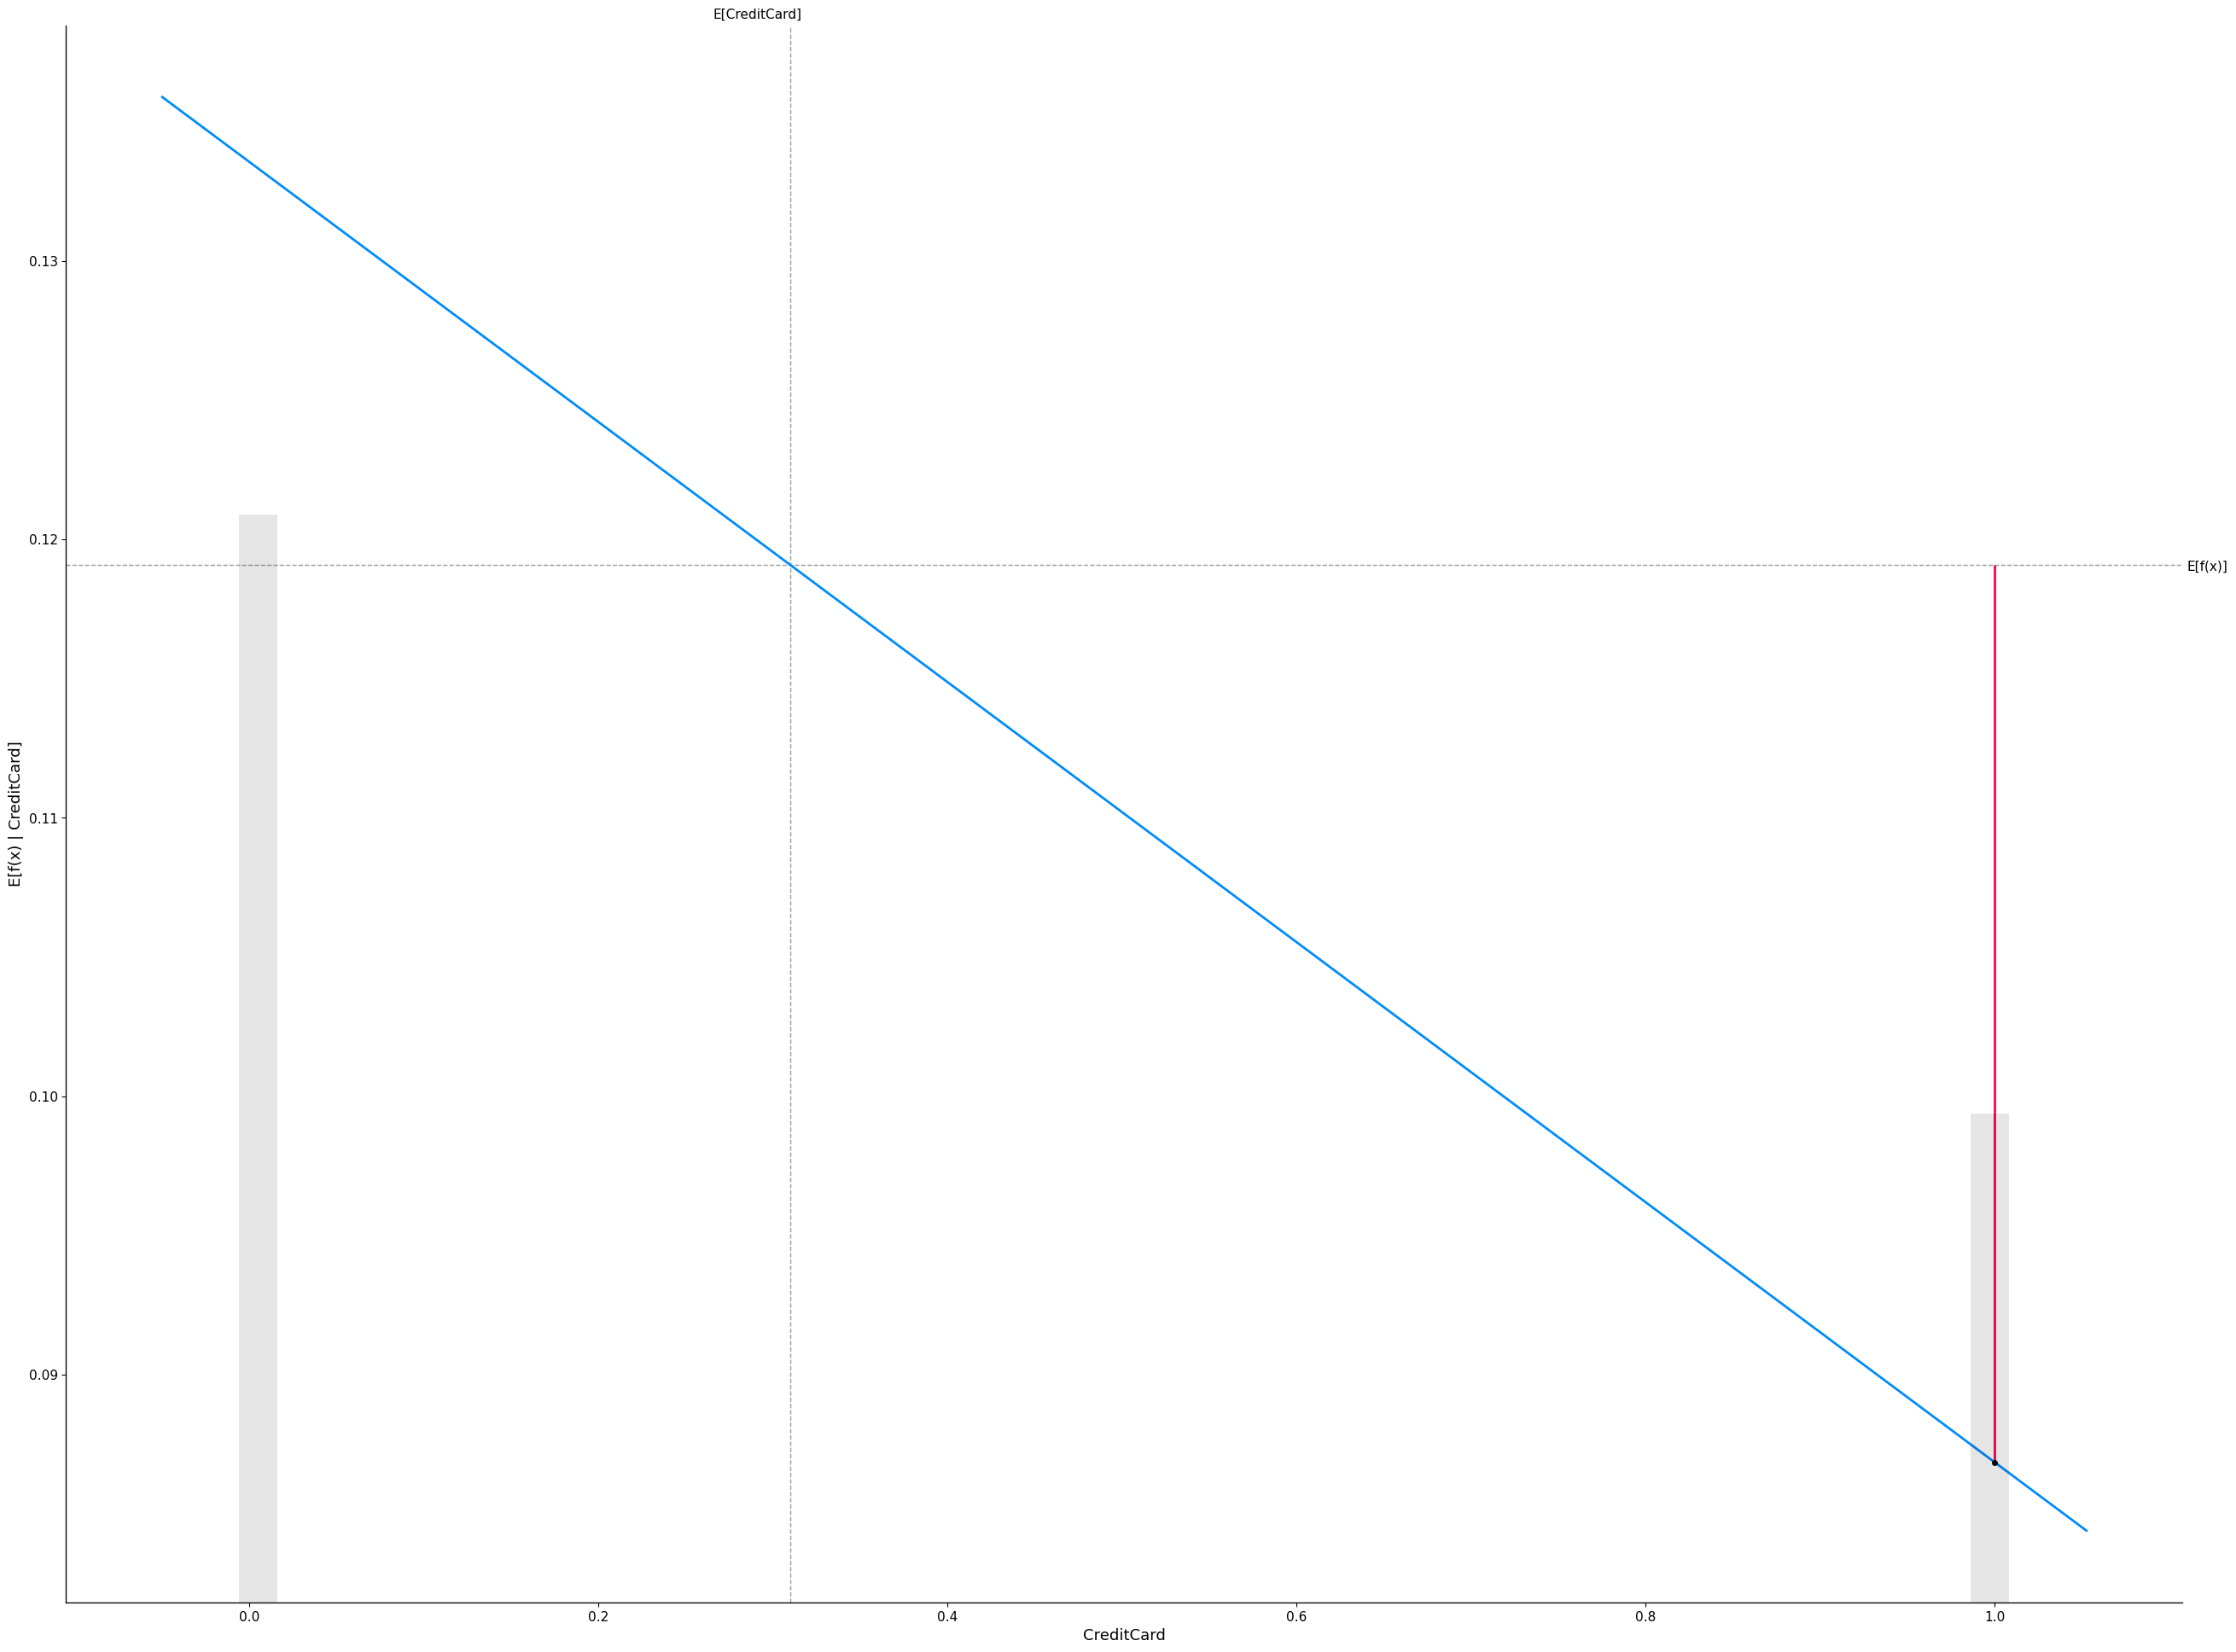

In [38]:
# SHAP explanation of a Linear Model
linear_explainer = shap.Explainer(linear_model.predict, x_train_100)
linear_shap_values = linear_explainer(x_train)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        linear_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )

If the target variable has a positive relationship with a feature (i.e., as the value of the feature increases, the value of the target variable also tends to increase), then the partial dependence plot for that feature would show a positive slope. This would indicate that the linear model is predicting higher values of the target variable for higher values of that feature.

Conversely, if the target variable has a negative relationship with a feature (i.e., as the value of the feature increases, the value of the target variable tends to decrease), then the partial dependence plot for that feature would show a negative slope. This would indicate that the linear model is predicting lower values of the target variable for higher values of that feature.

Here, Experience, Income , Zip Code, Family , CCAvg, Education, Mortgage, CD Account has a positive linearity 

And Creadit Card, Securities Account, Age has a negative linearity.







Permutation explainer: 4501it [16:58,  4.16it/s]                                


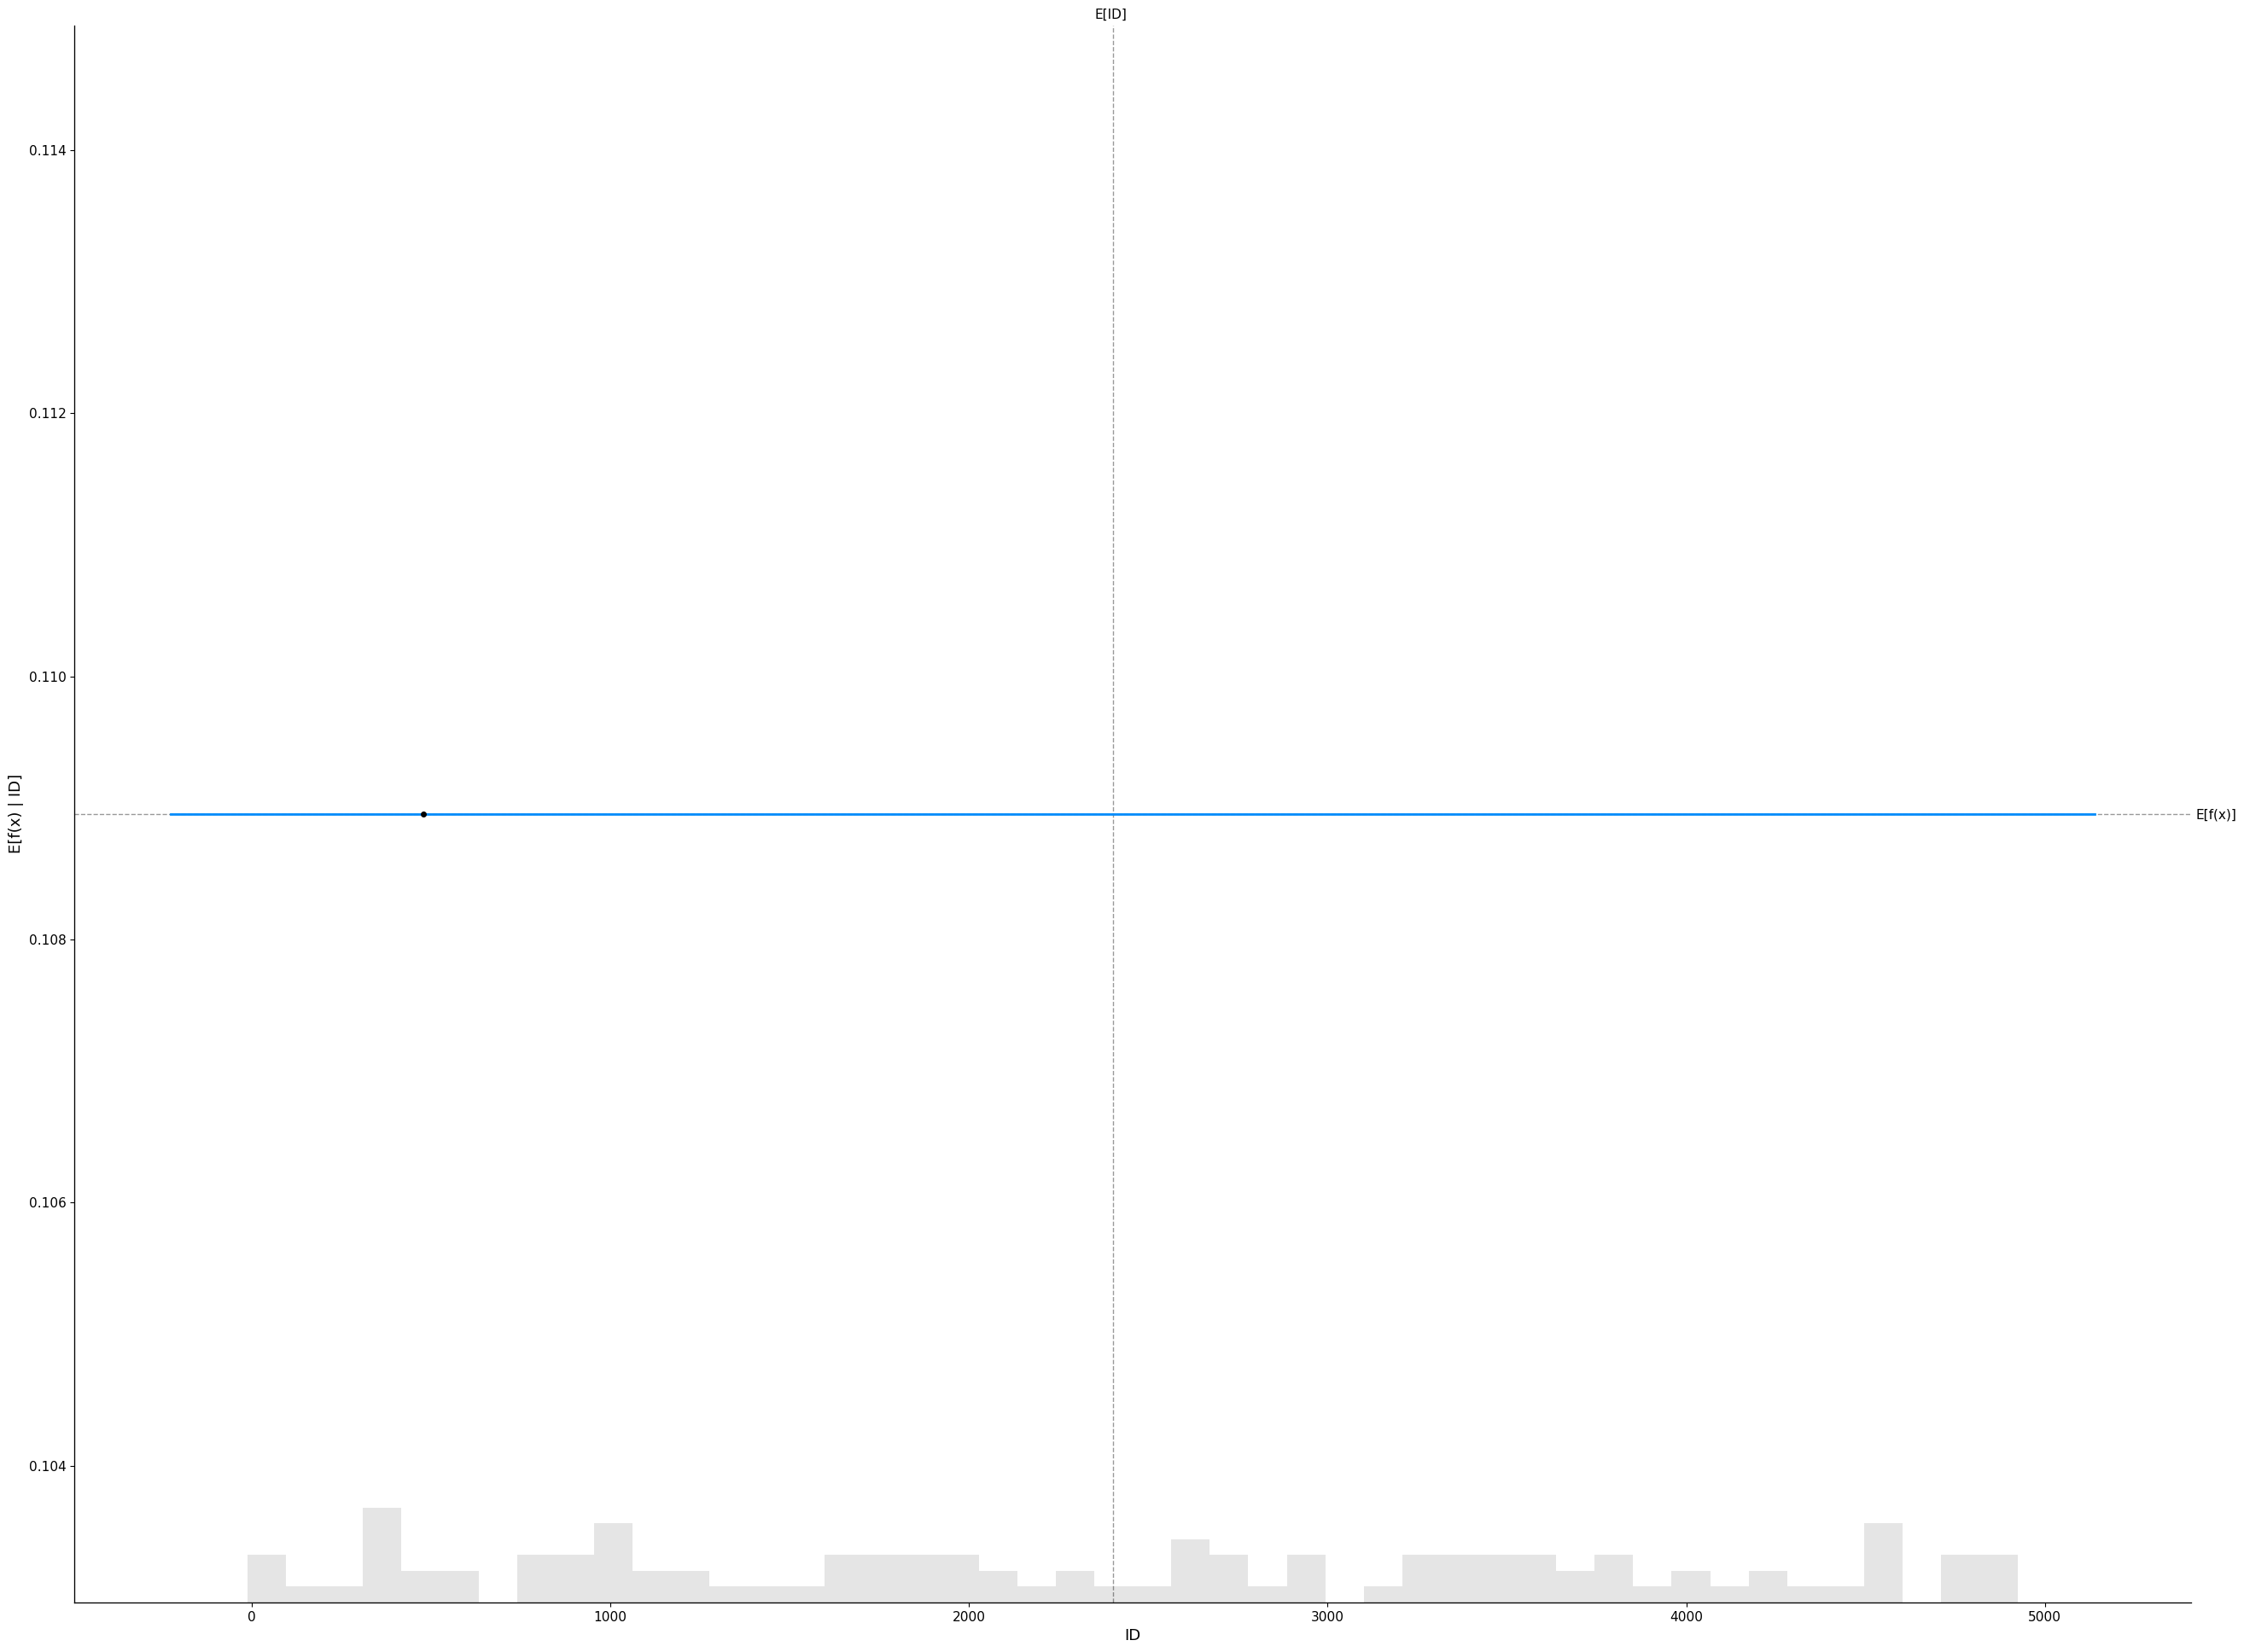

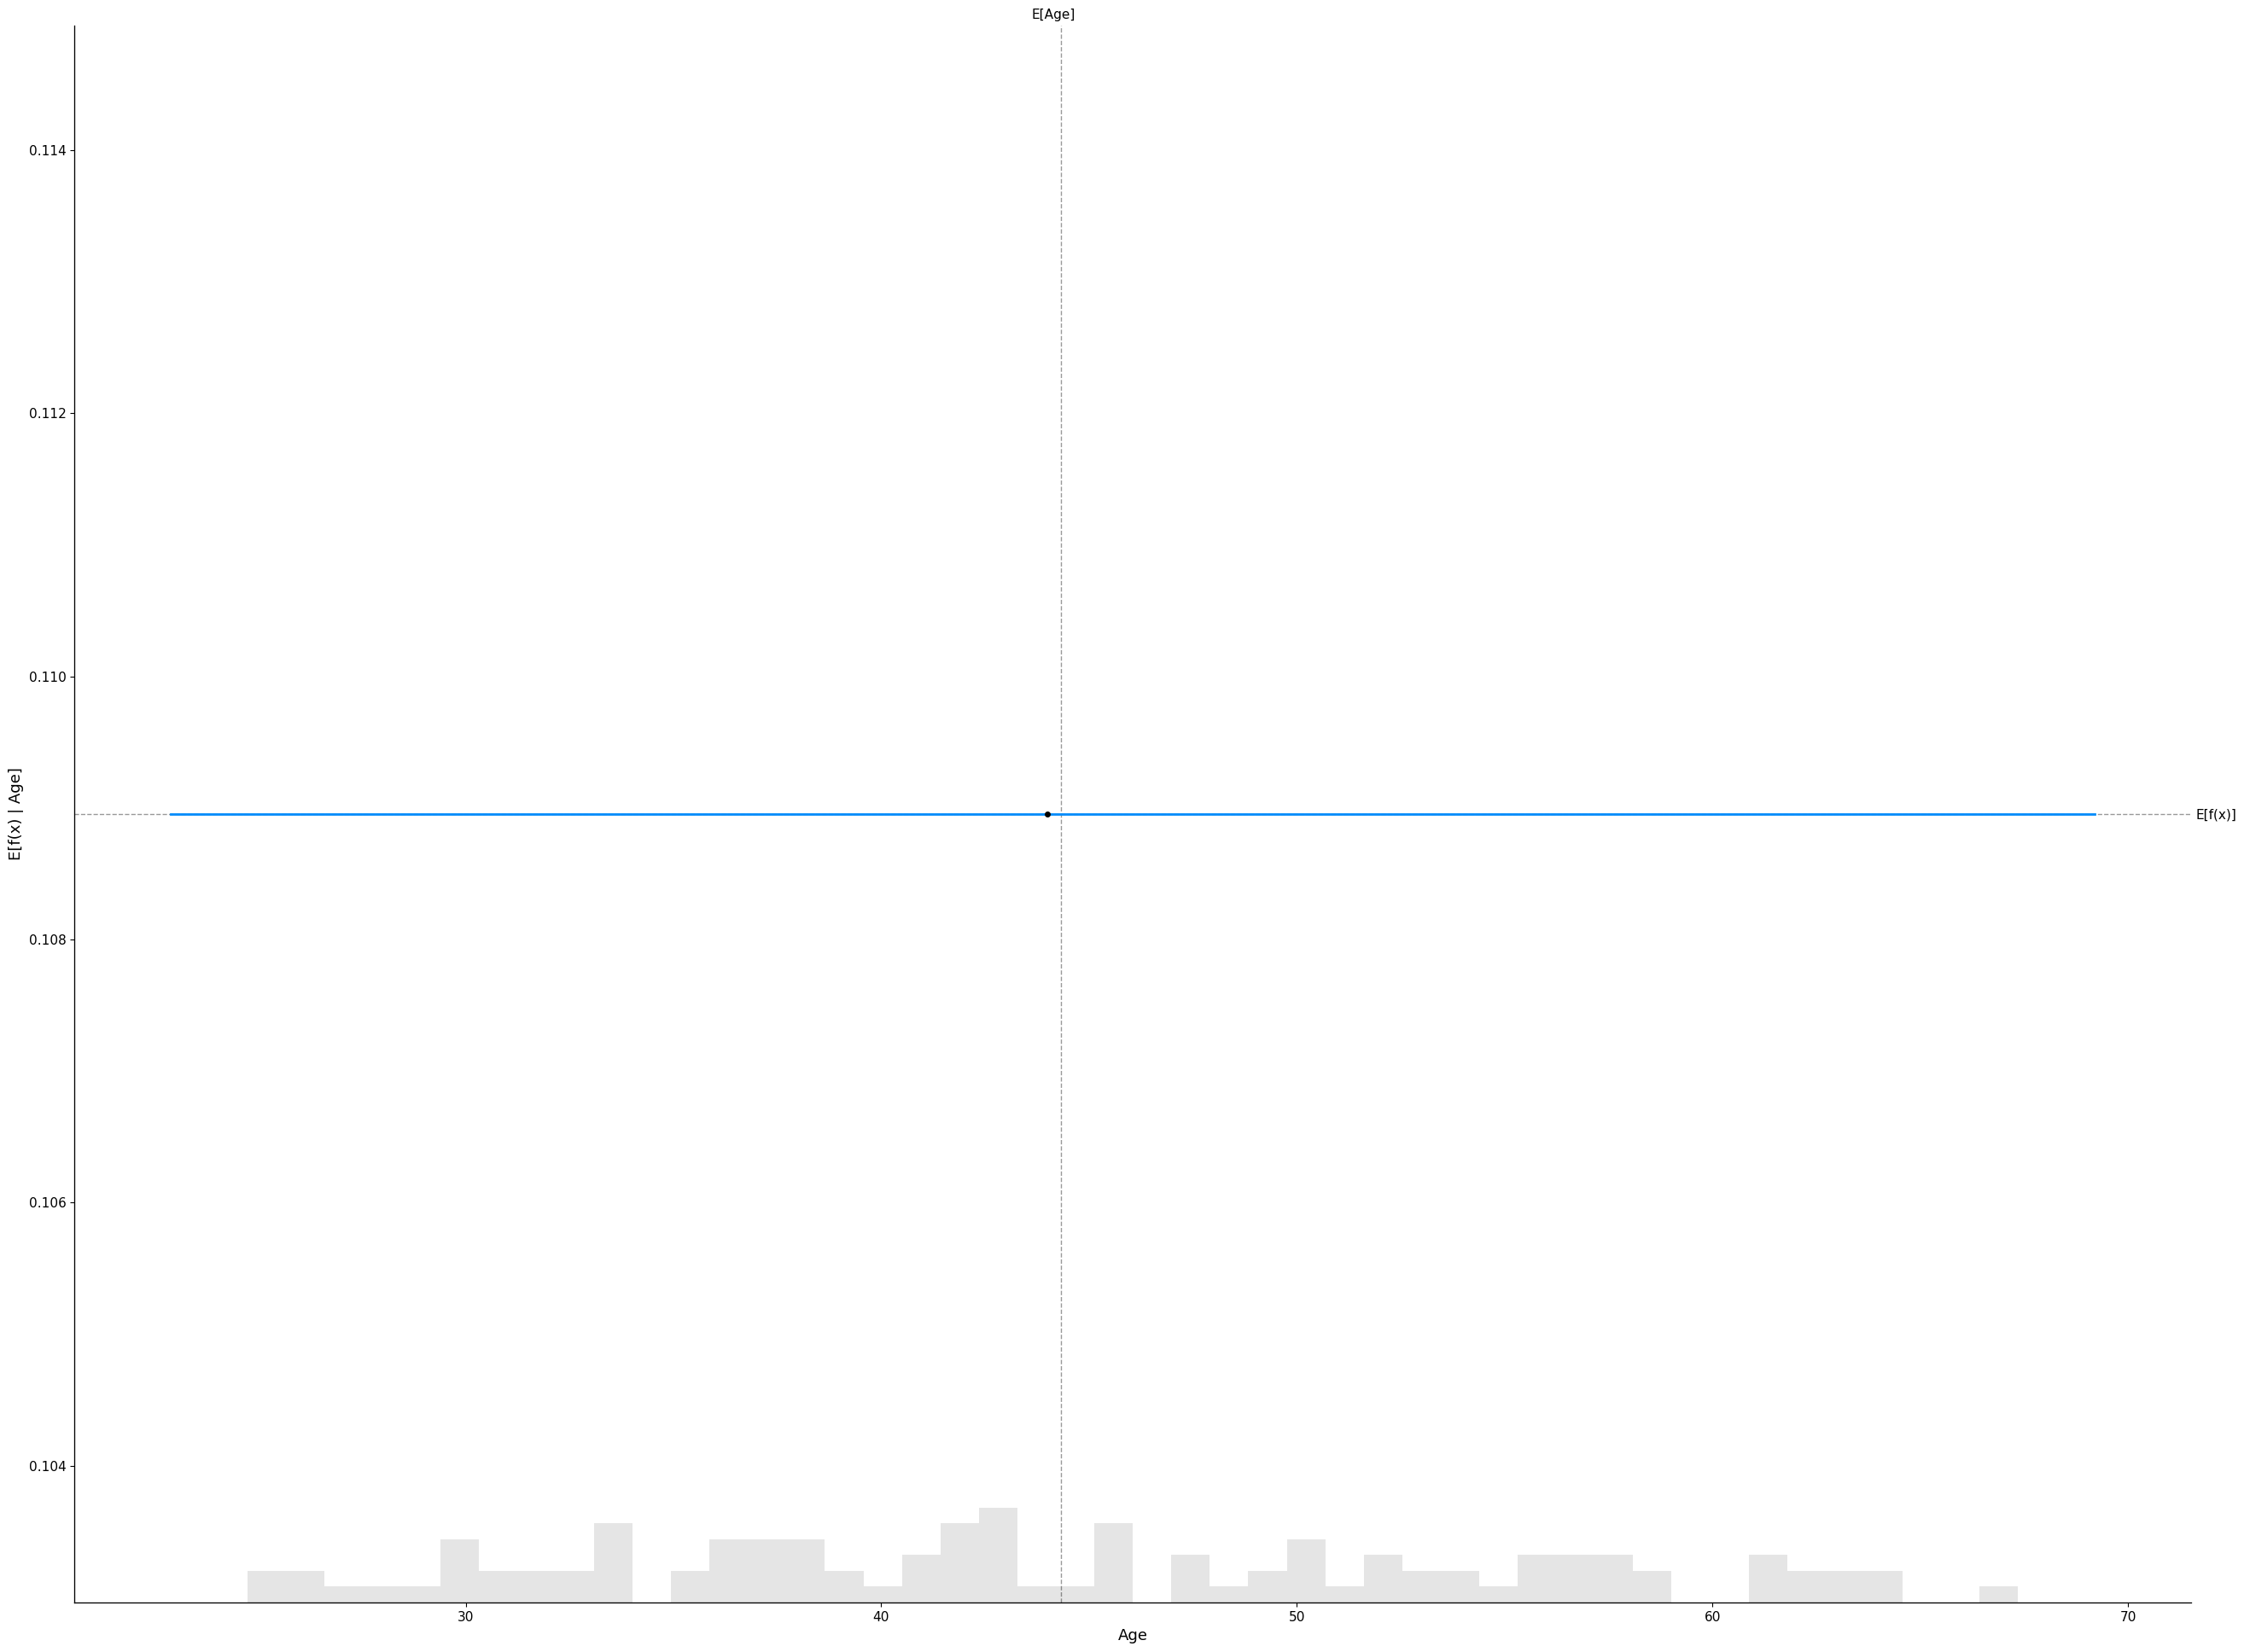

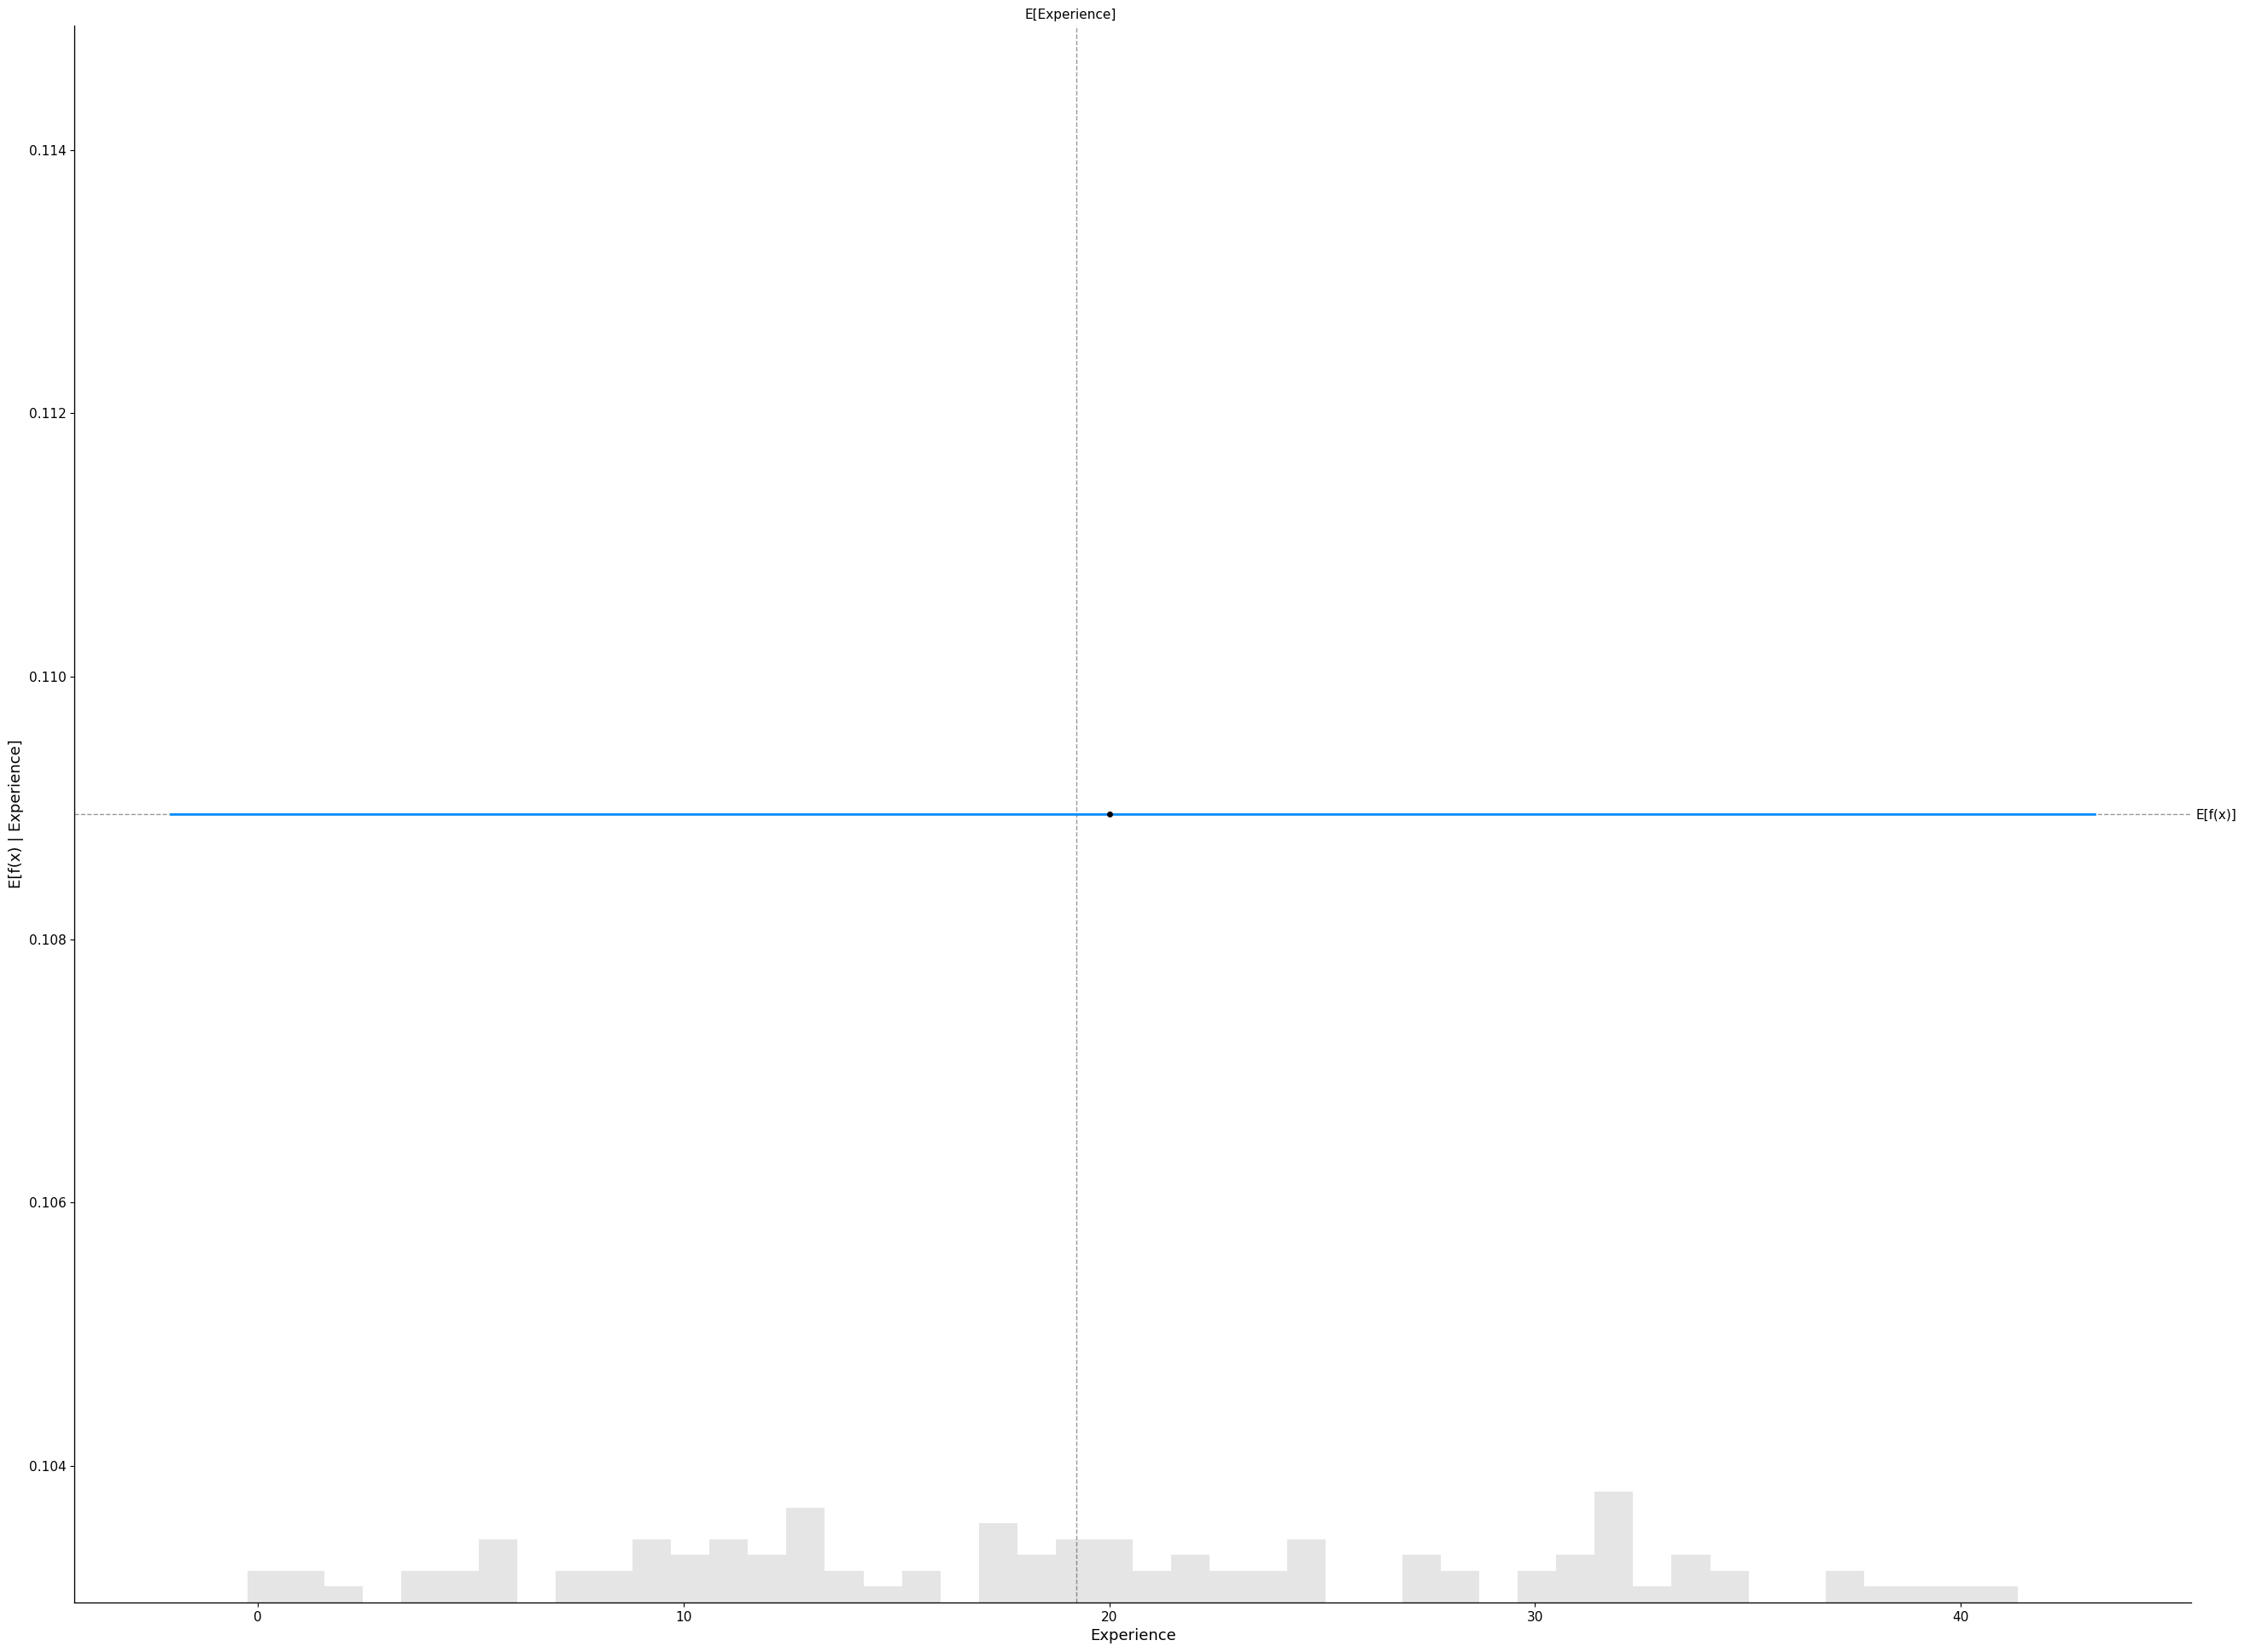

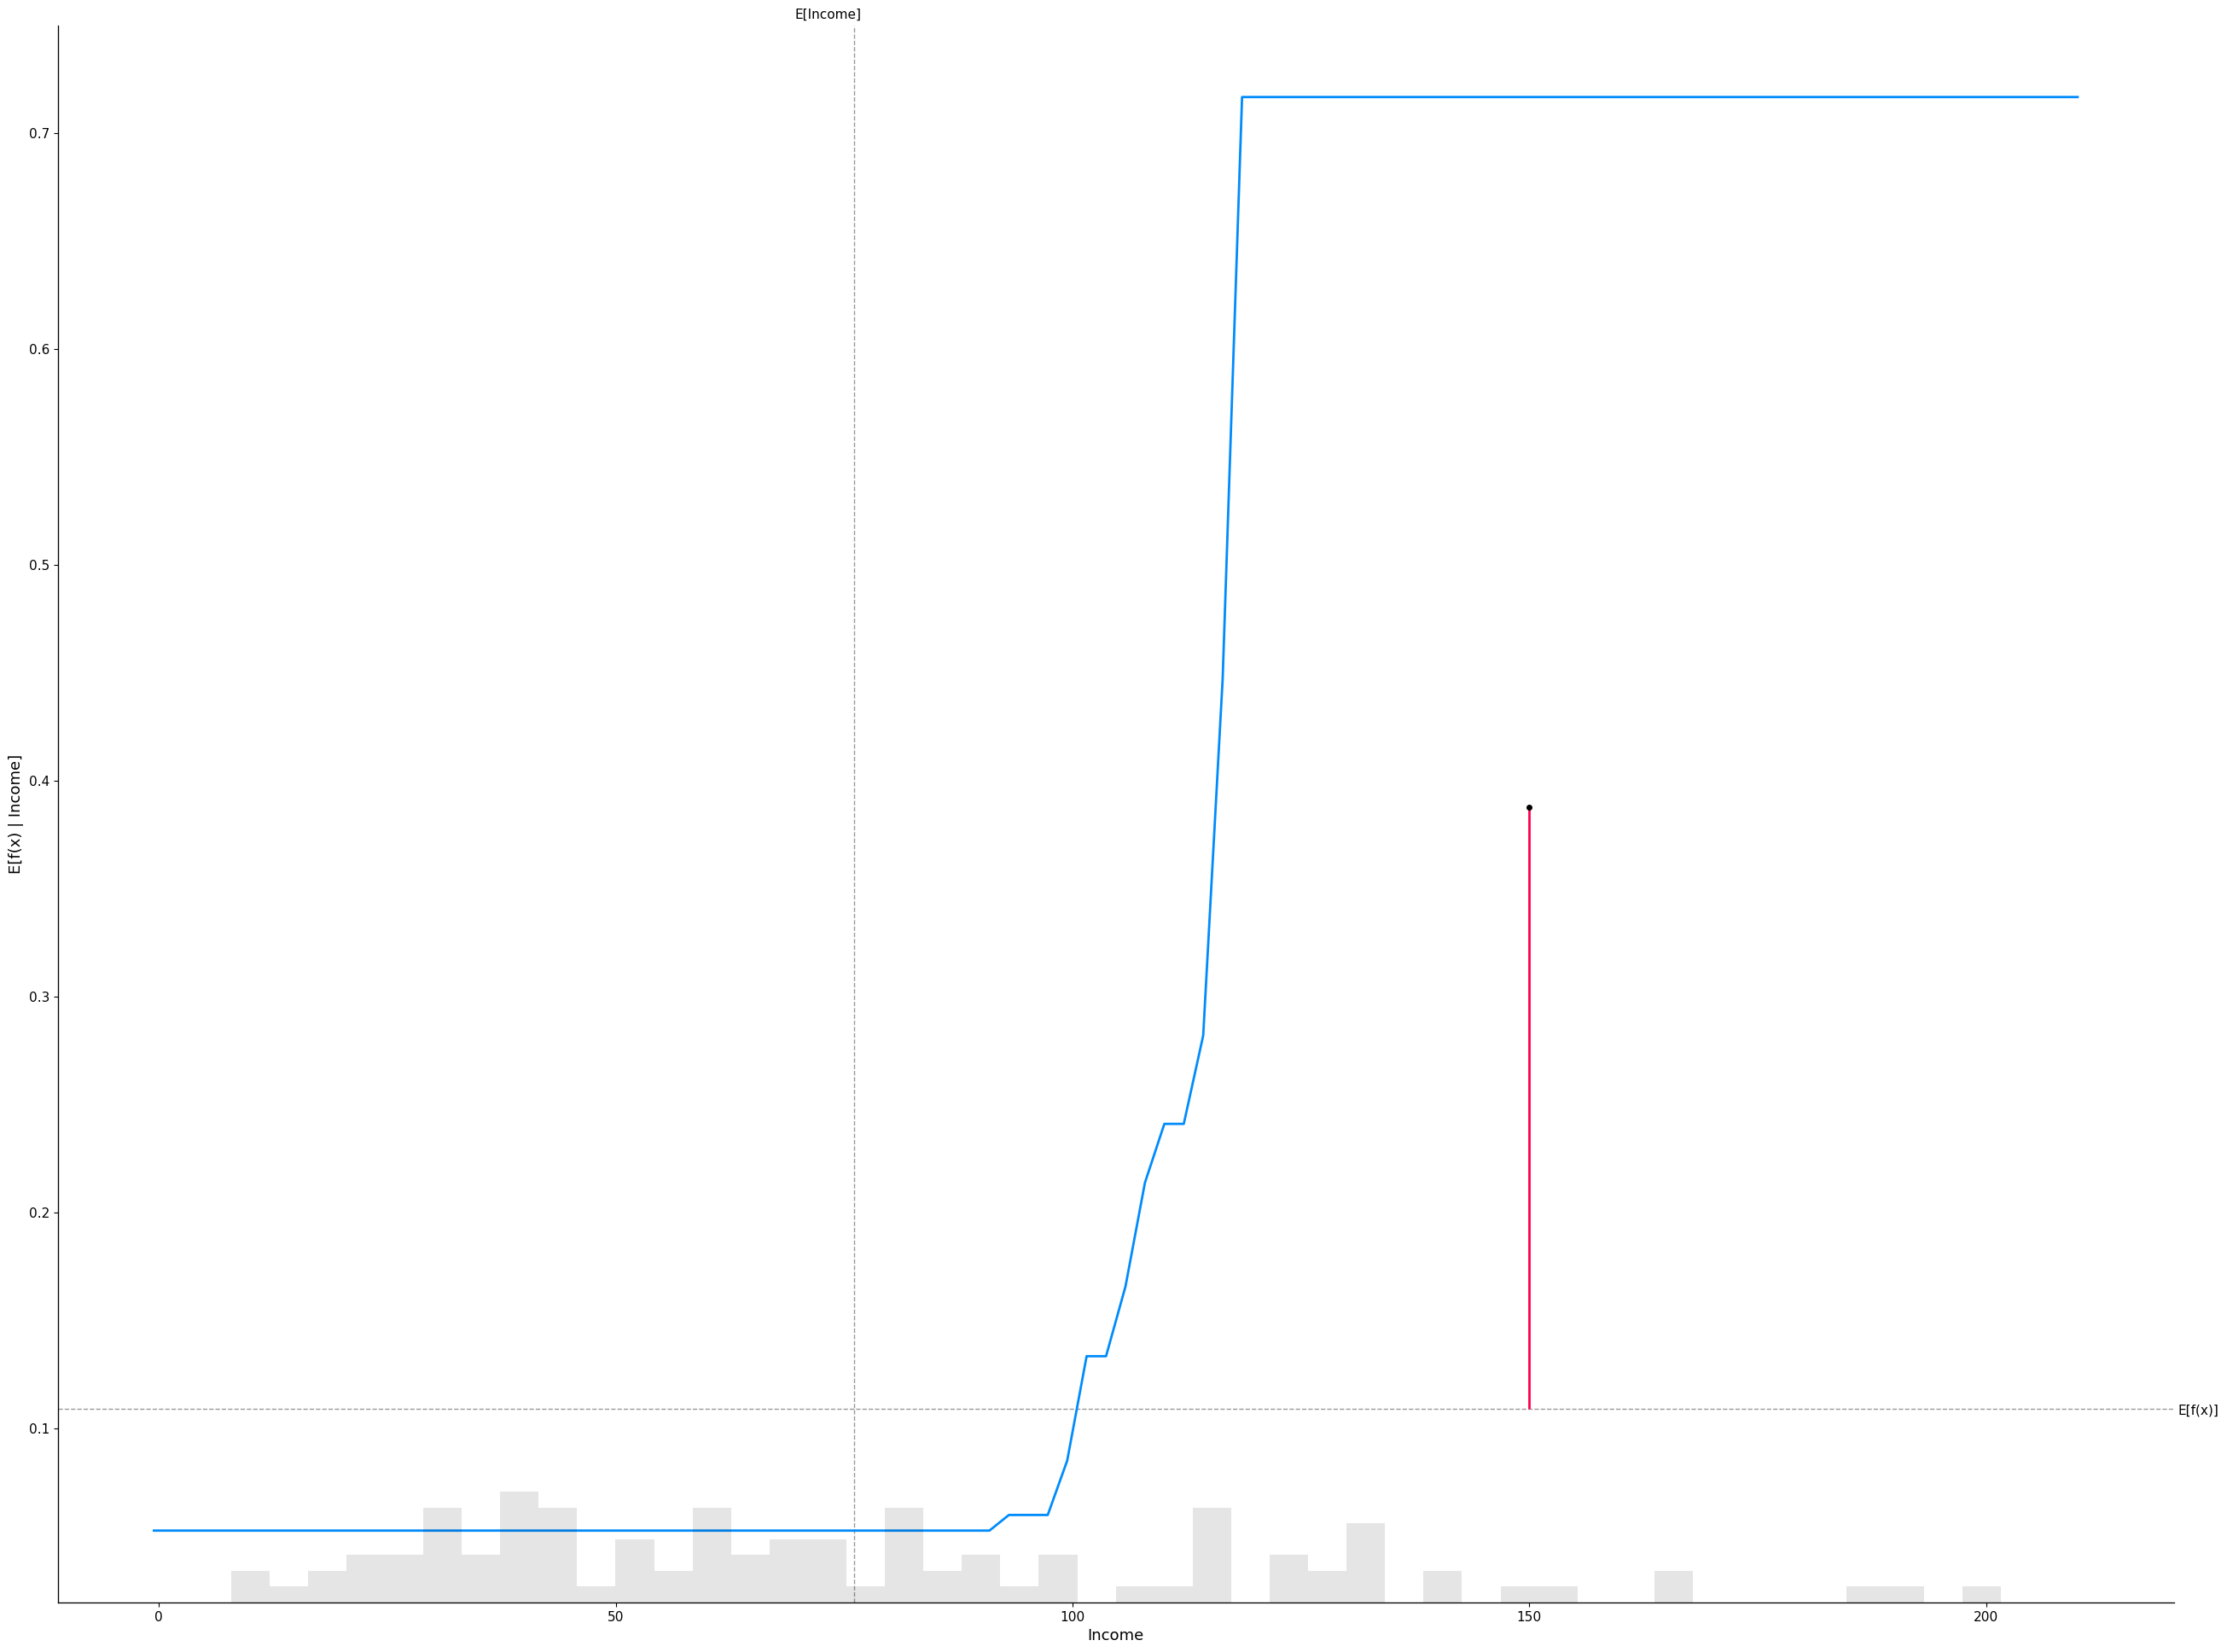

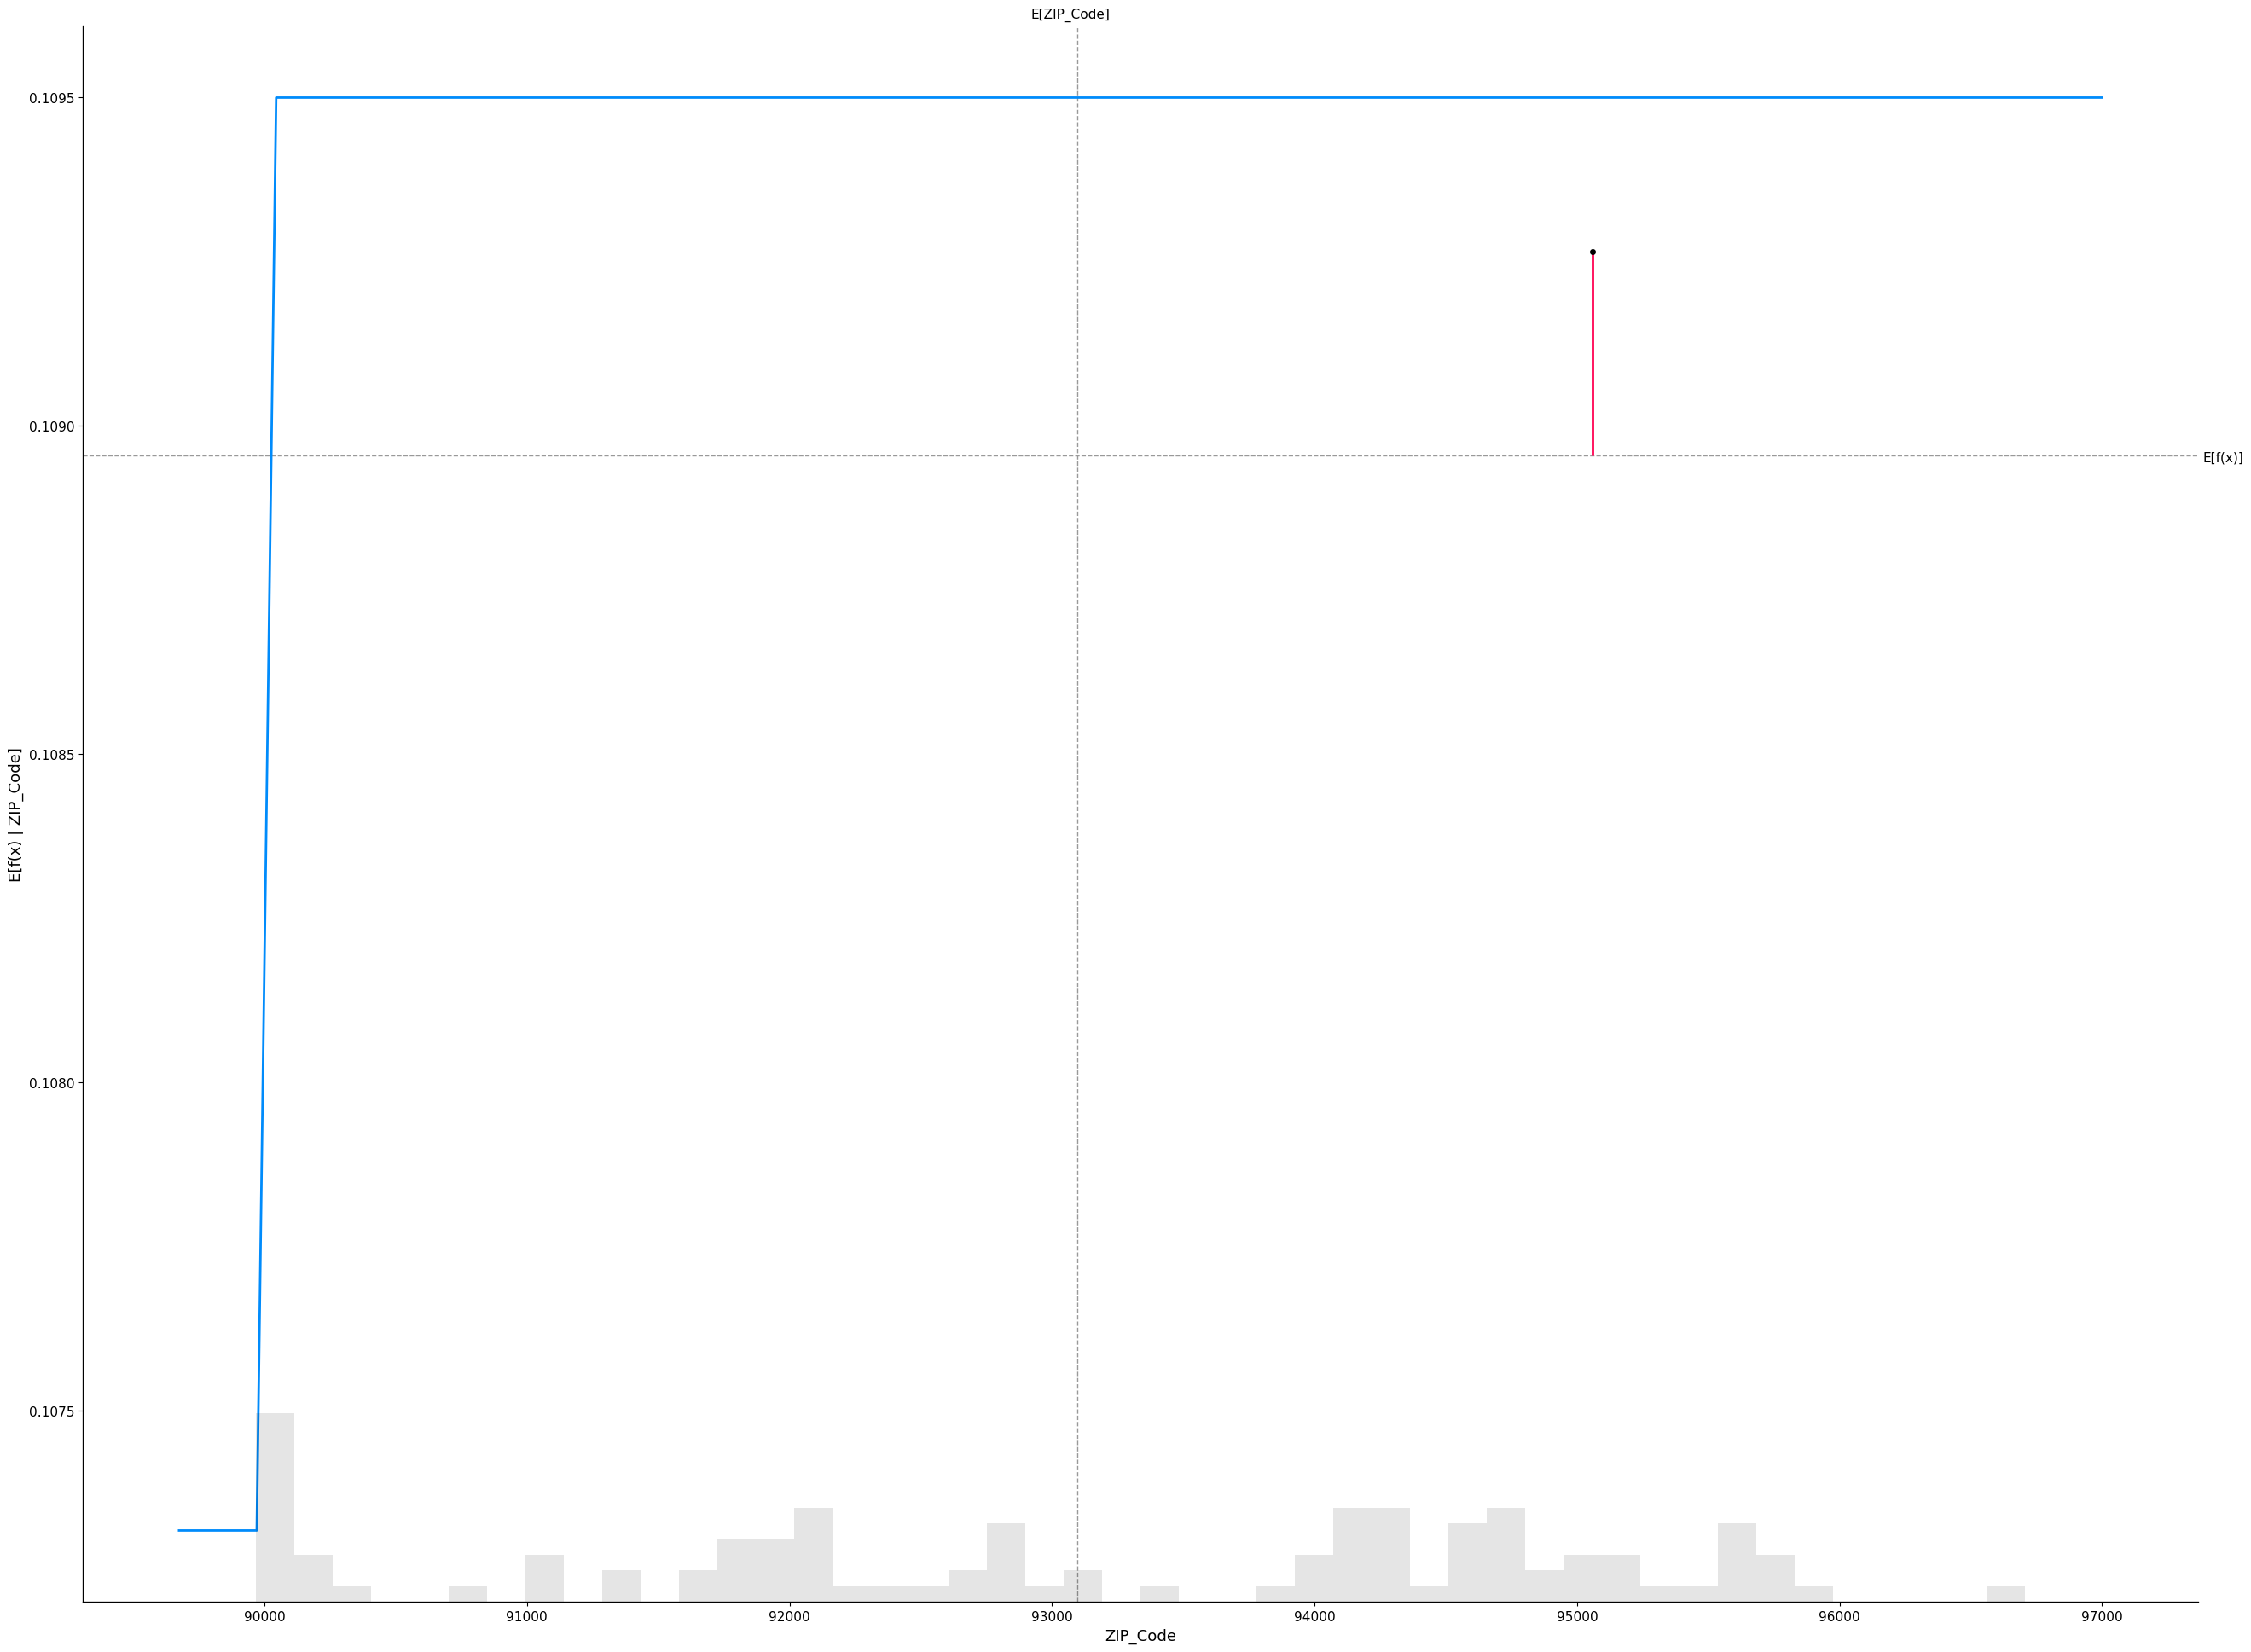

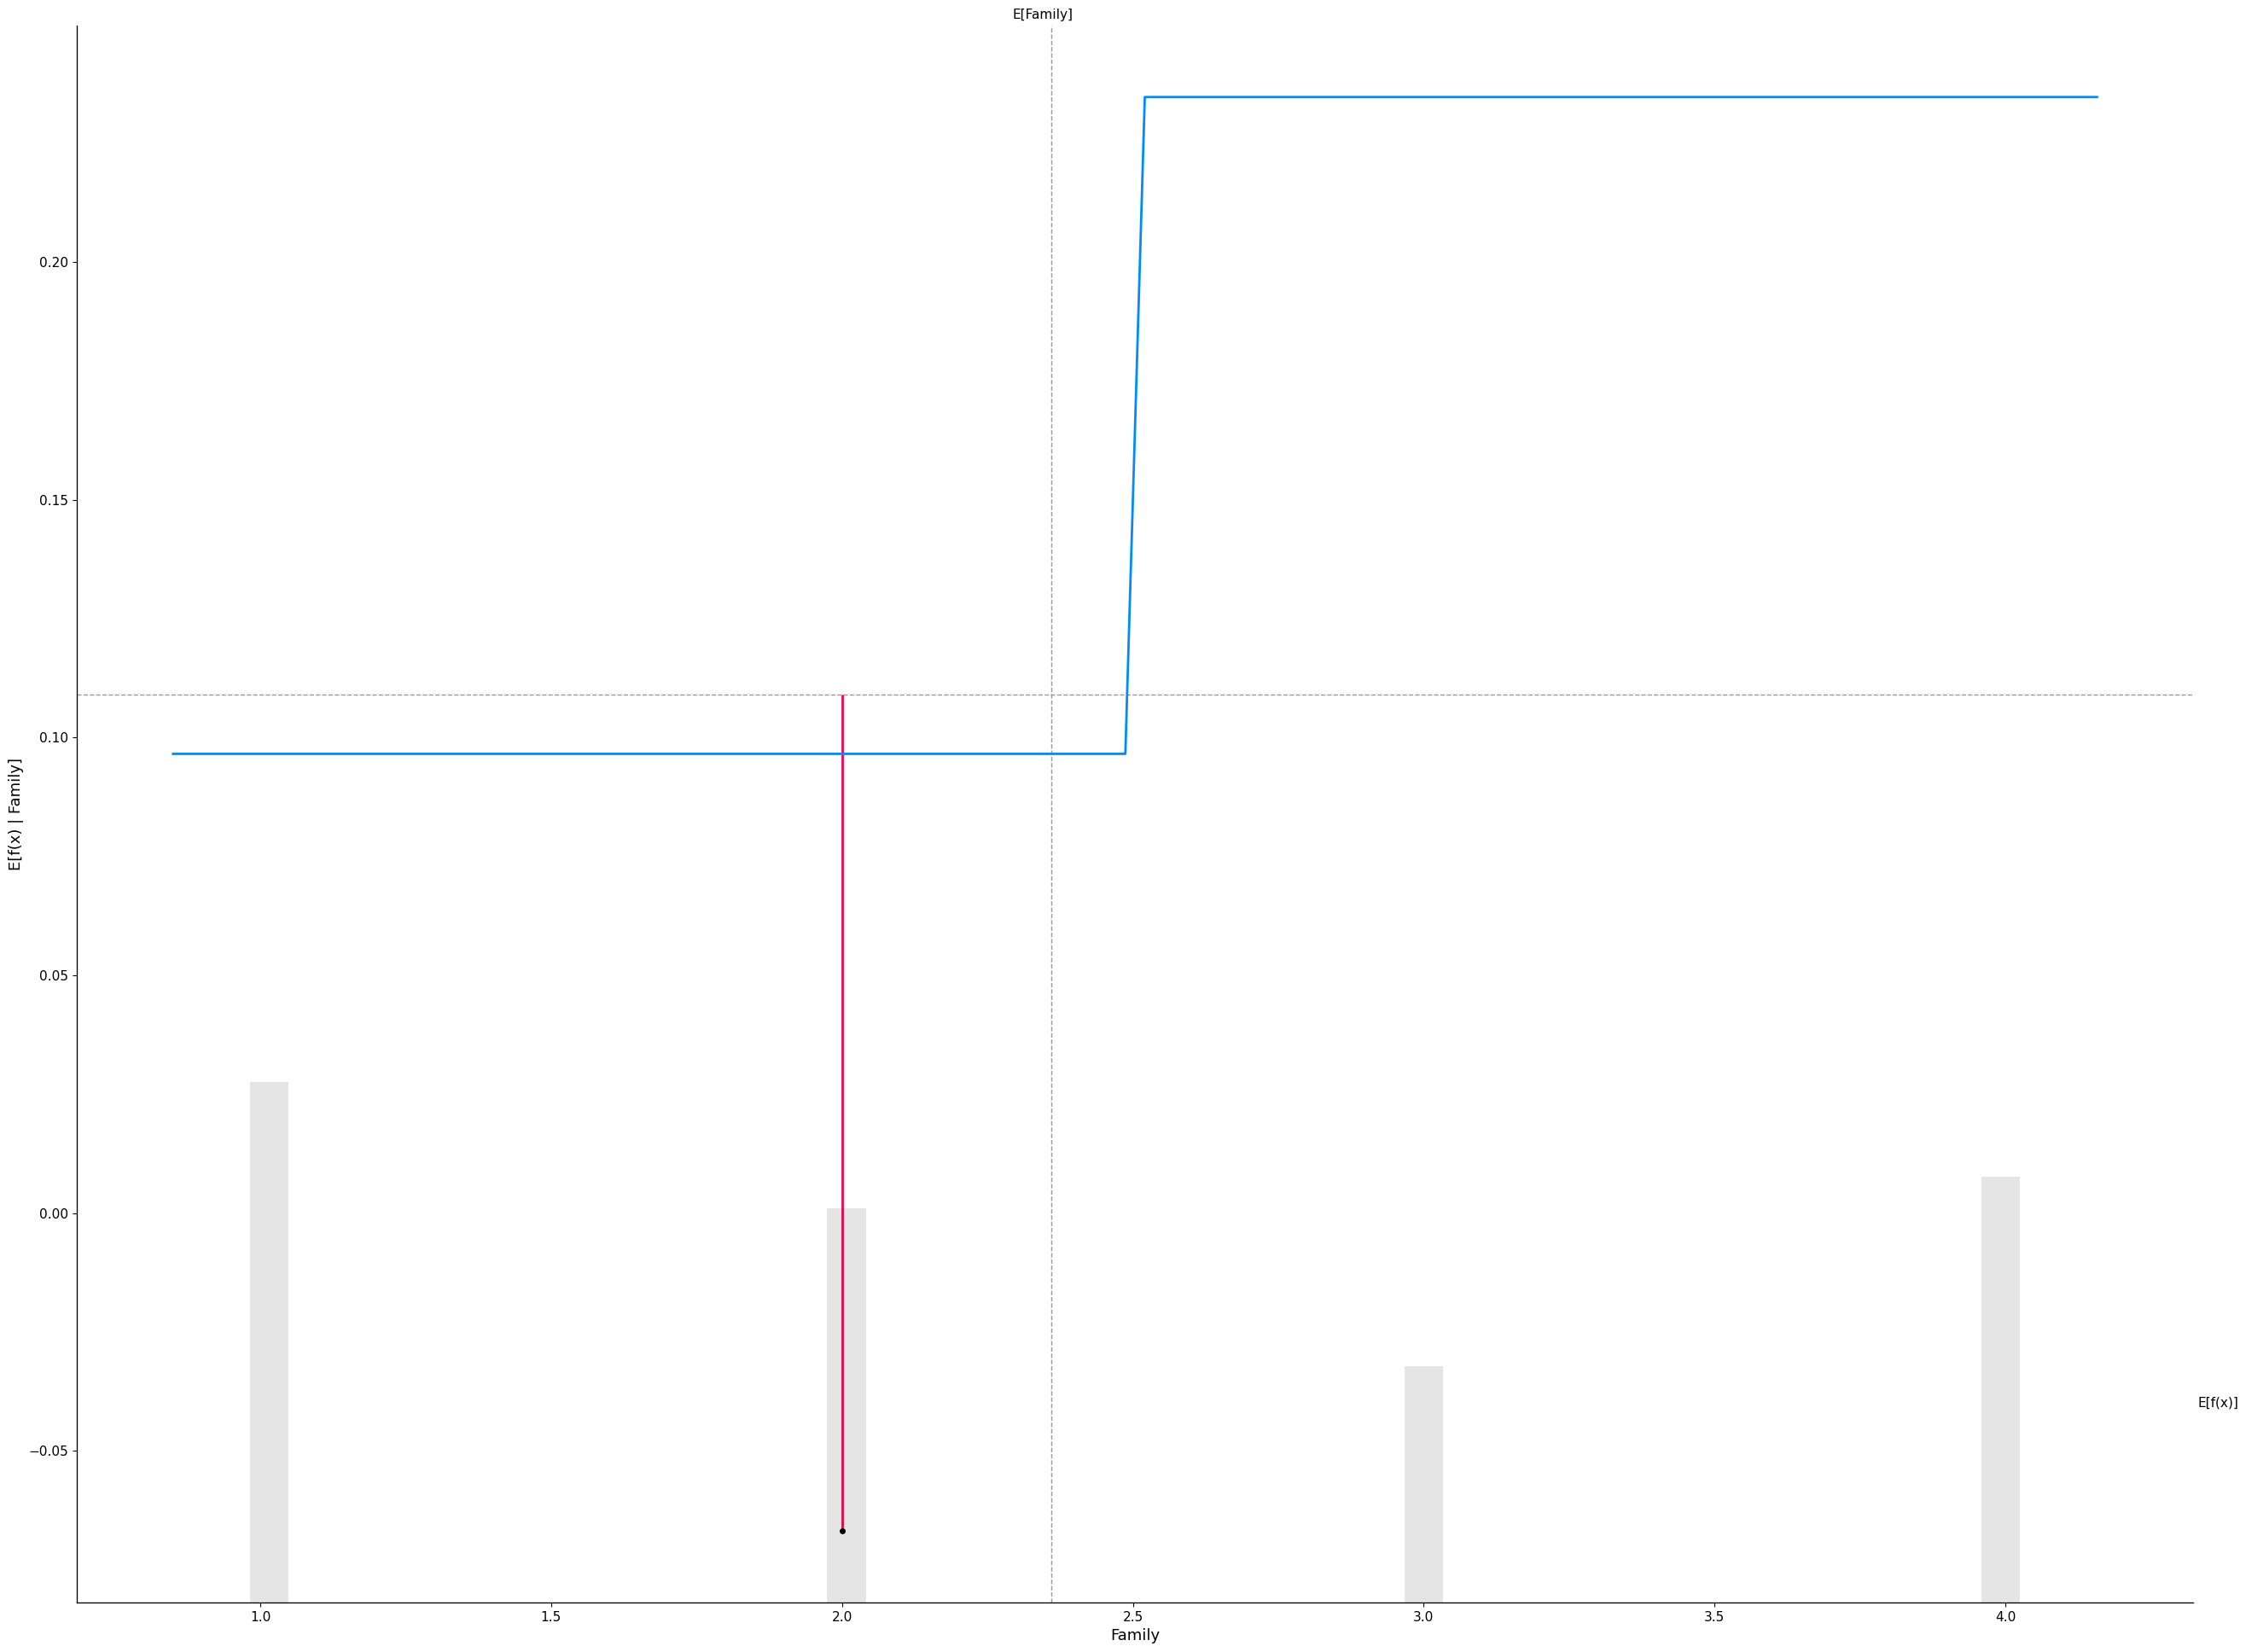

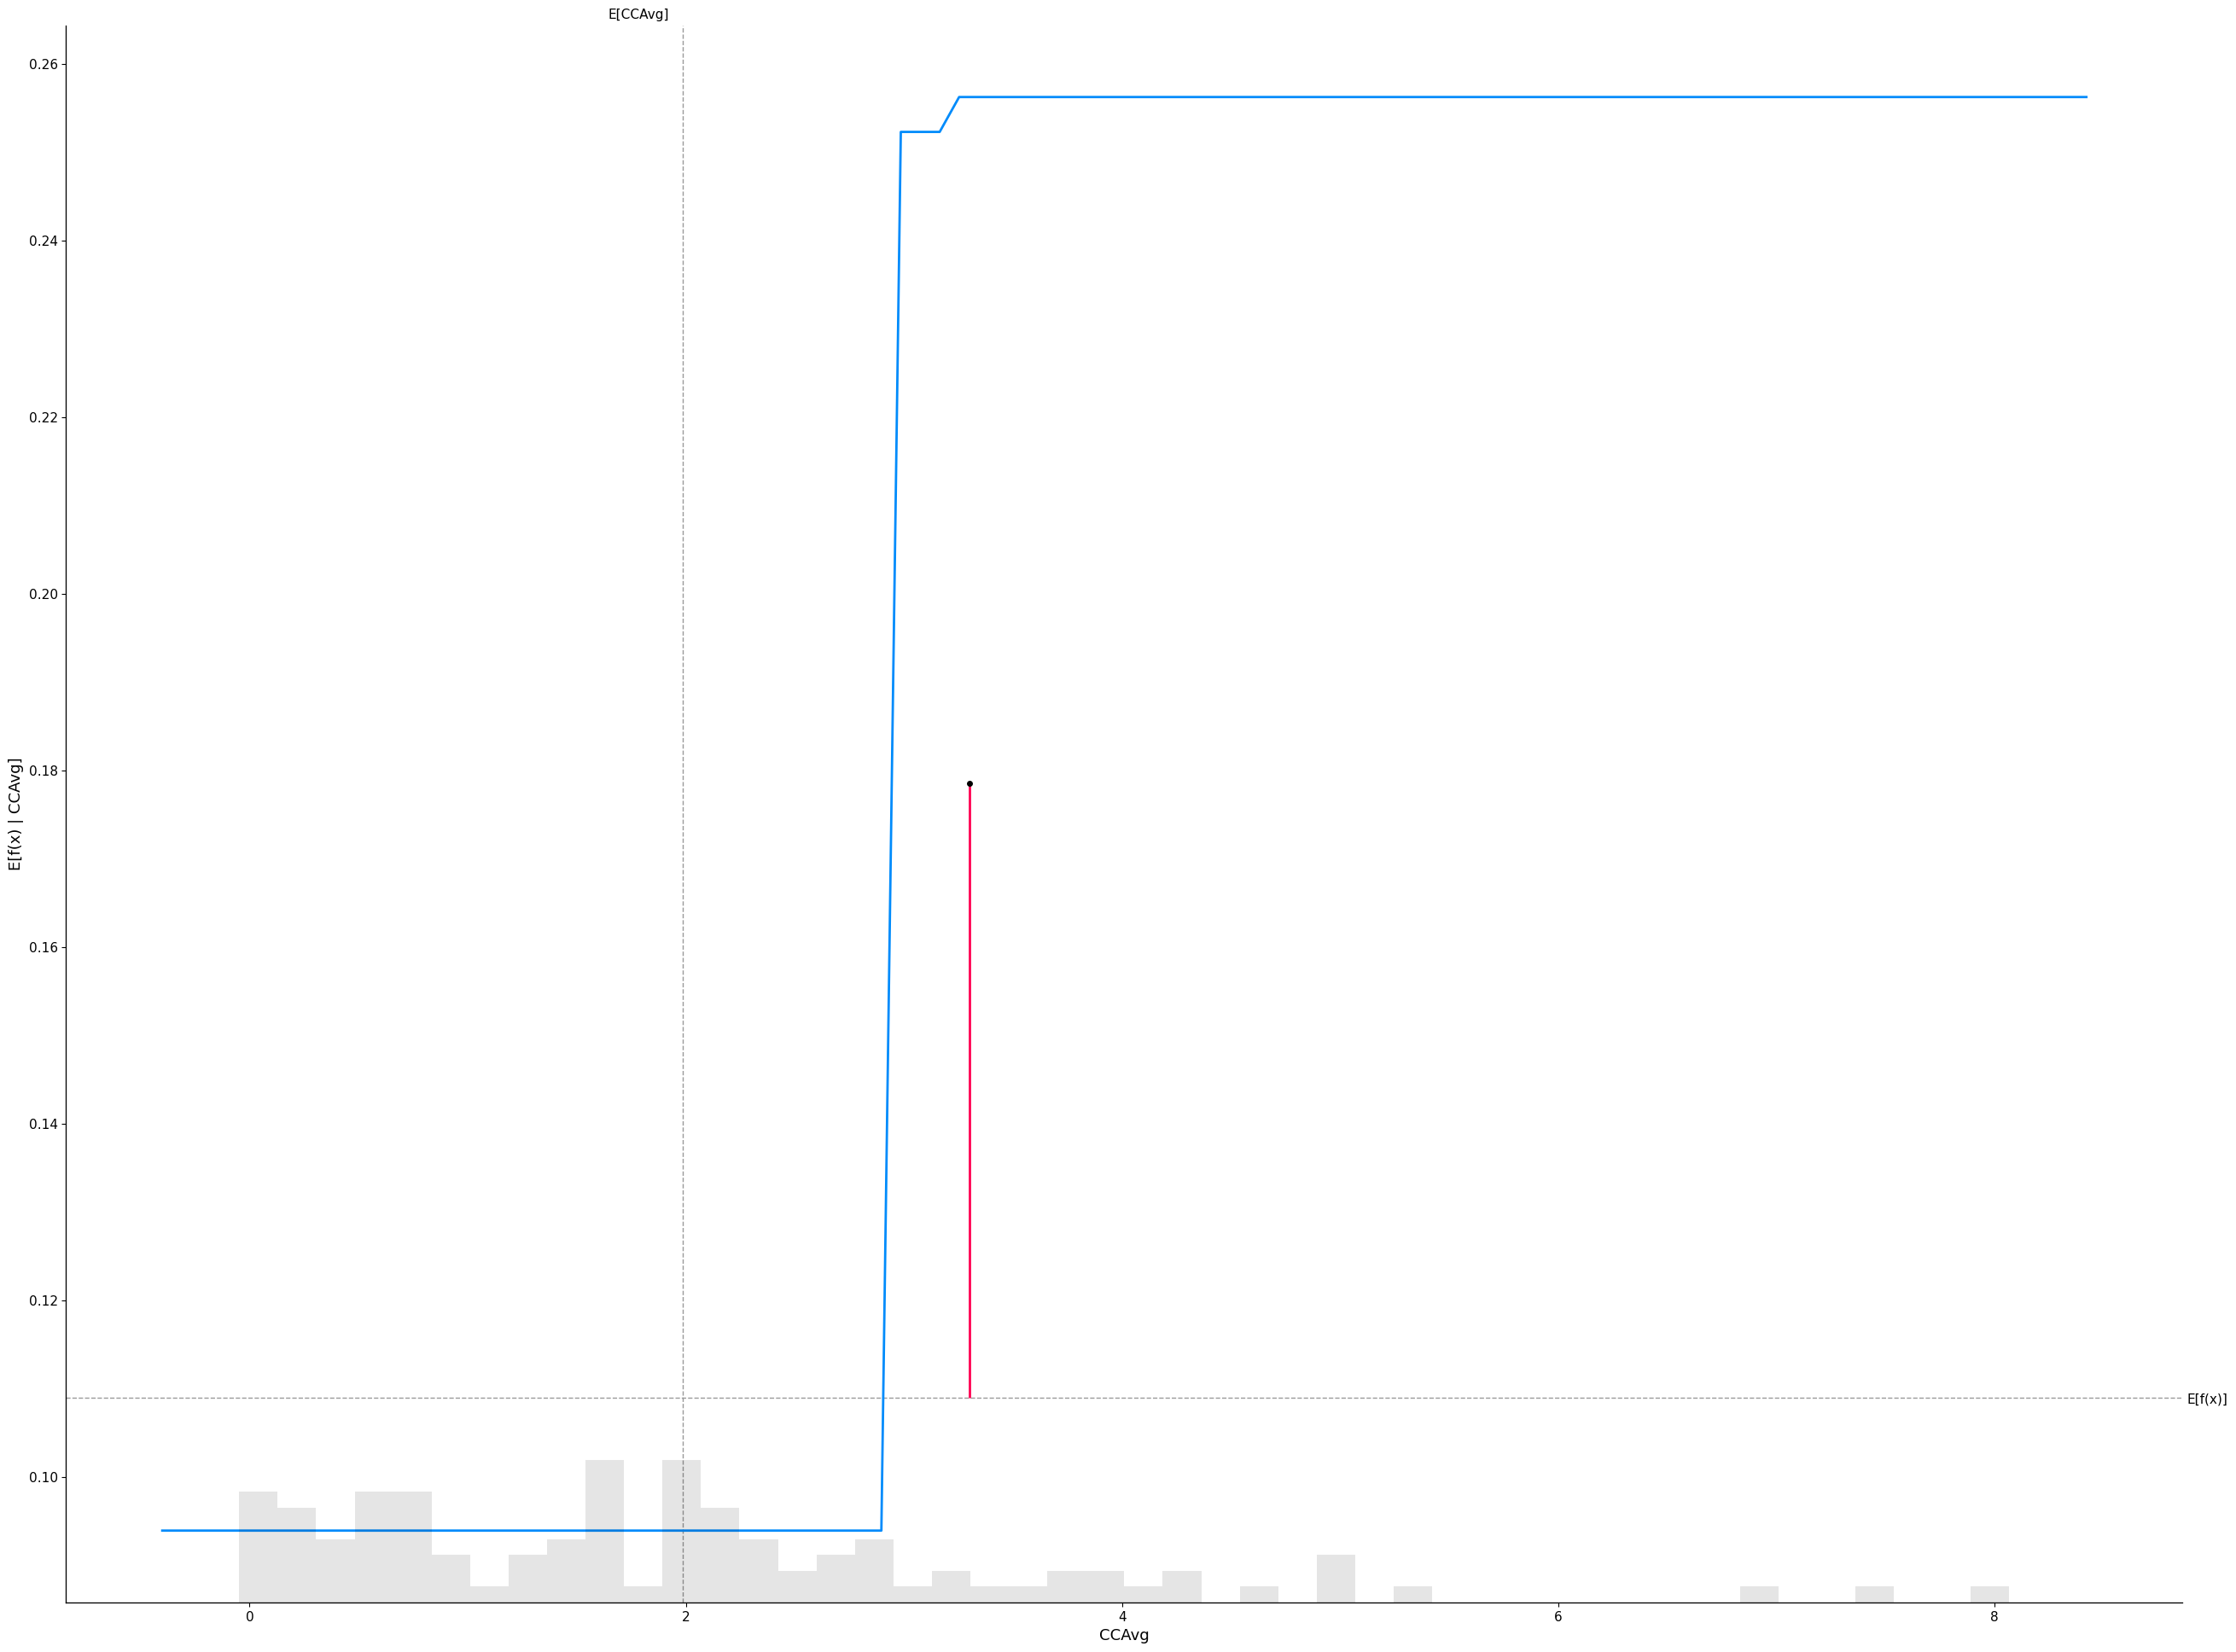

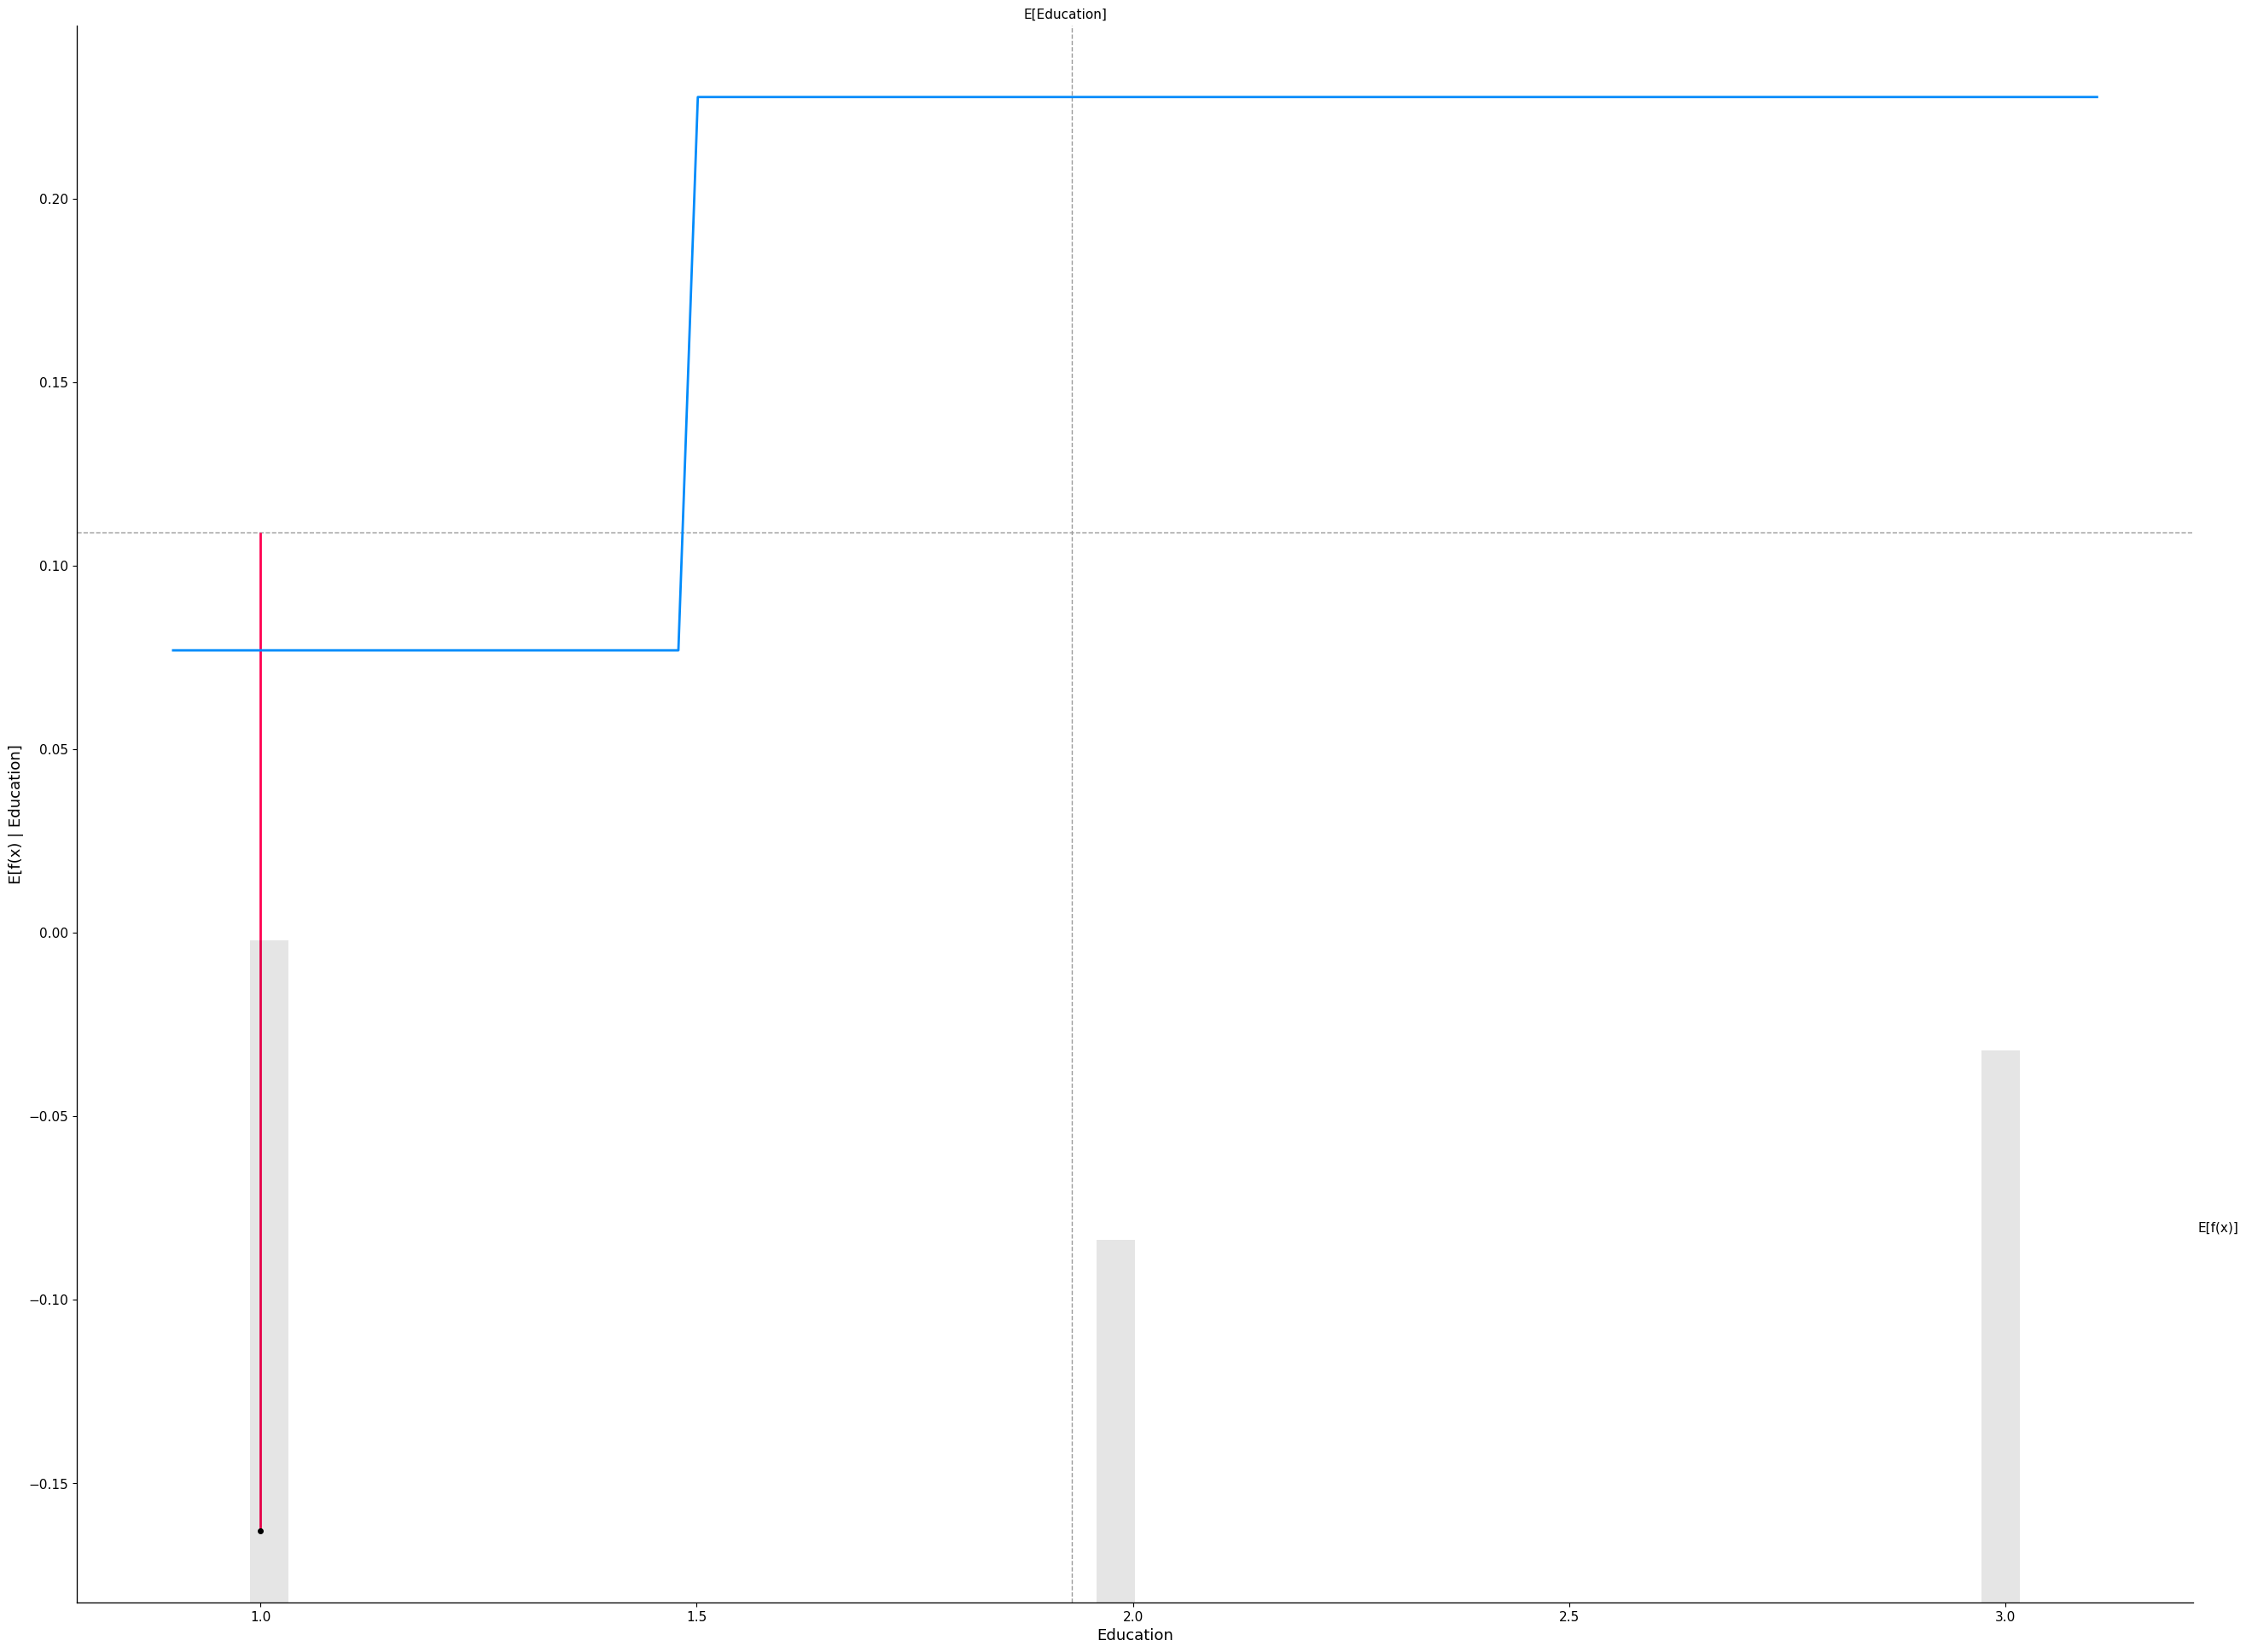

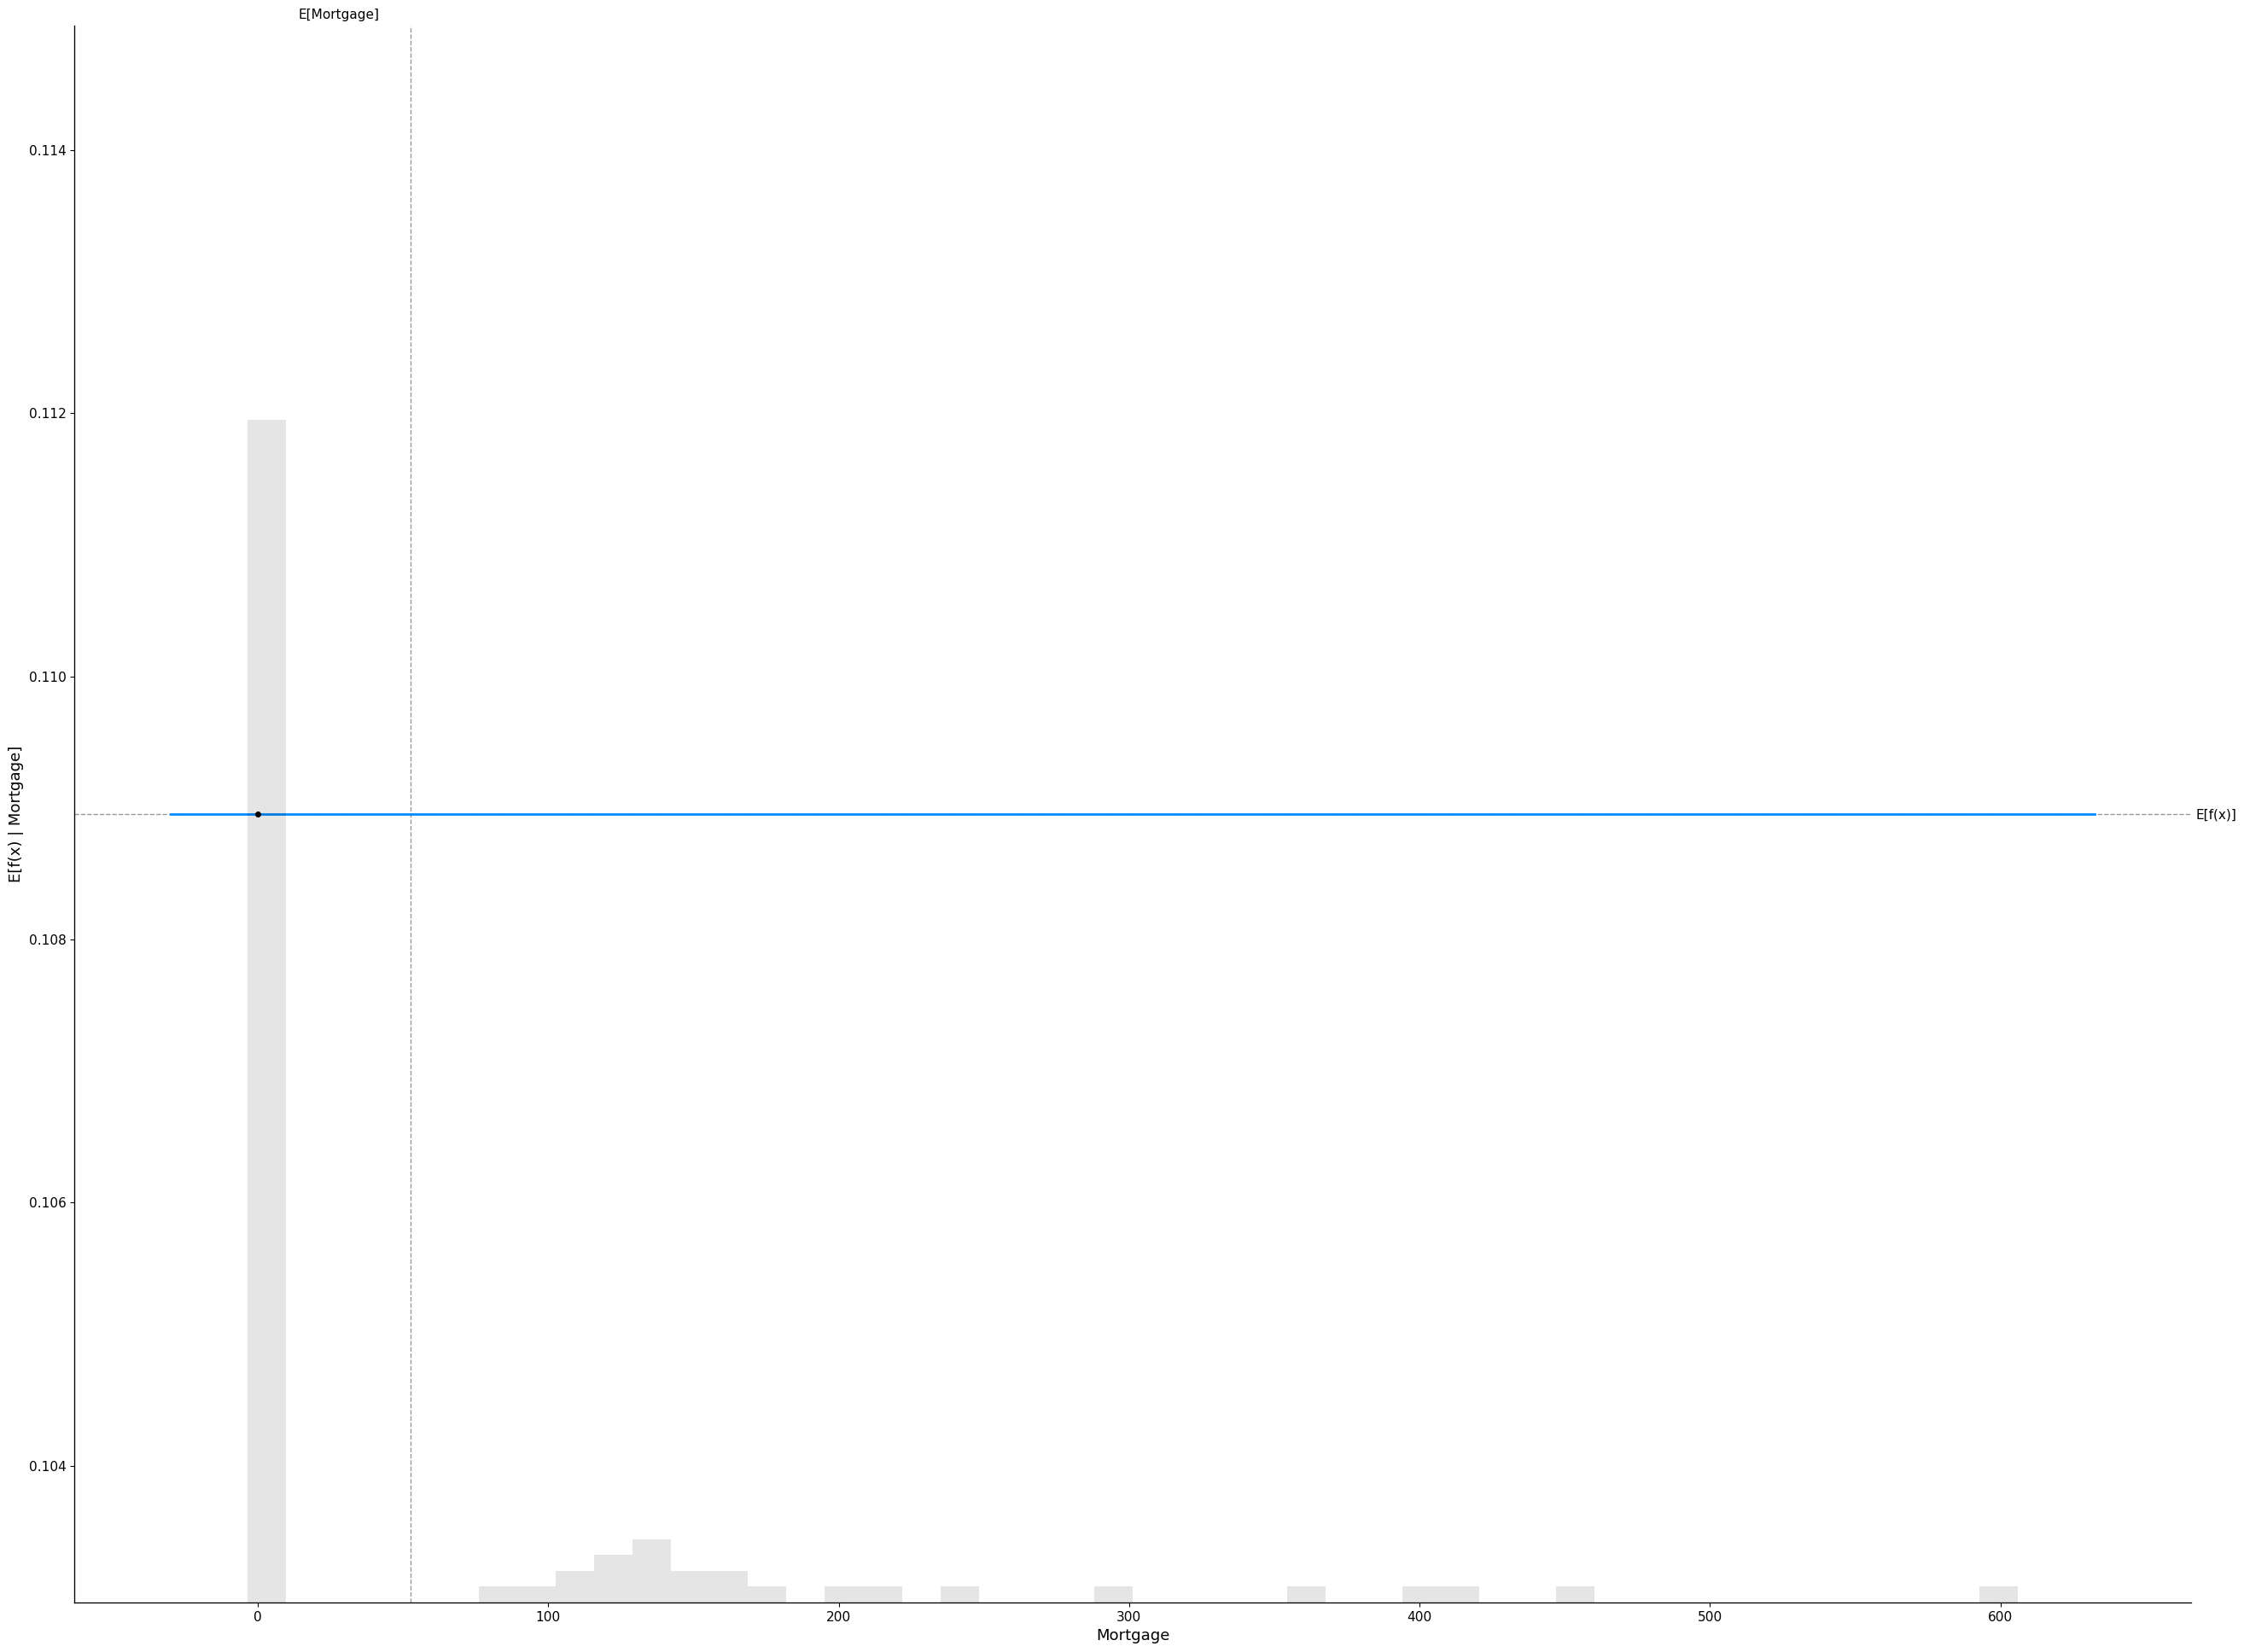

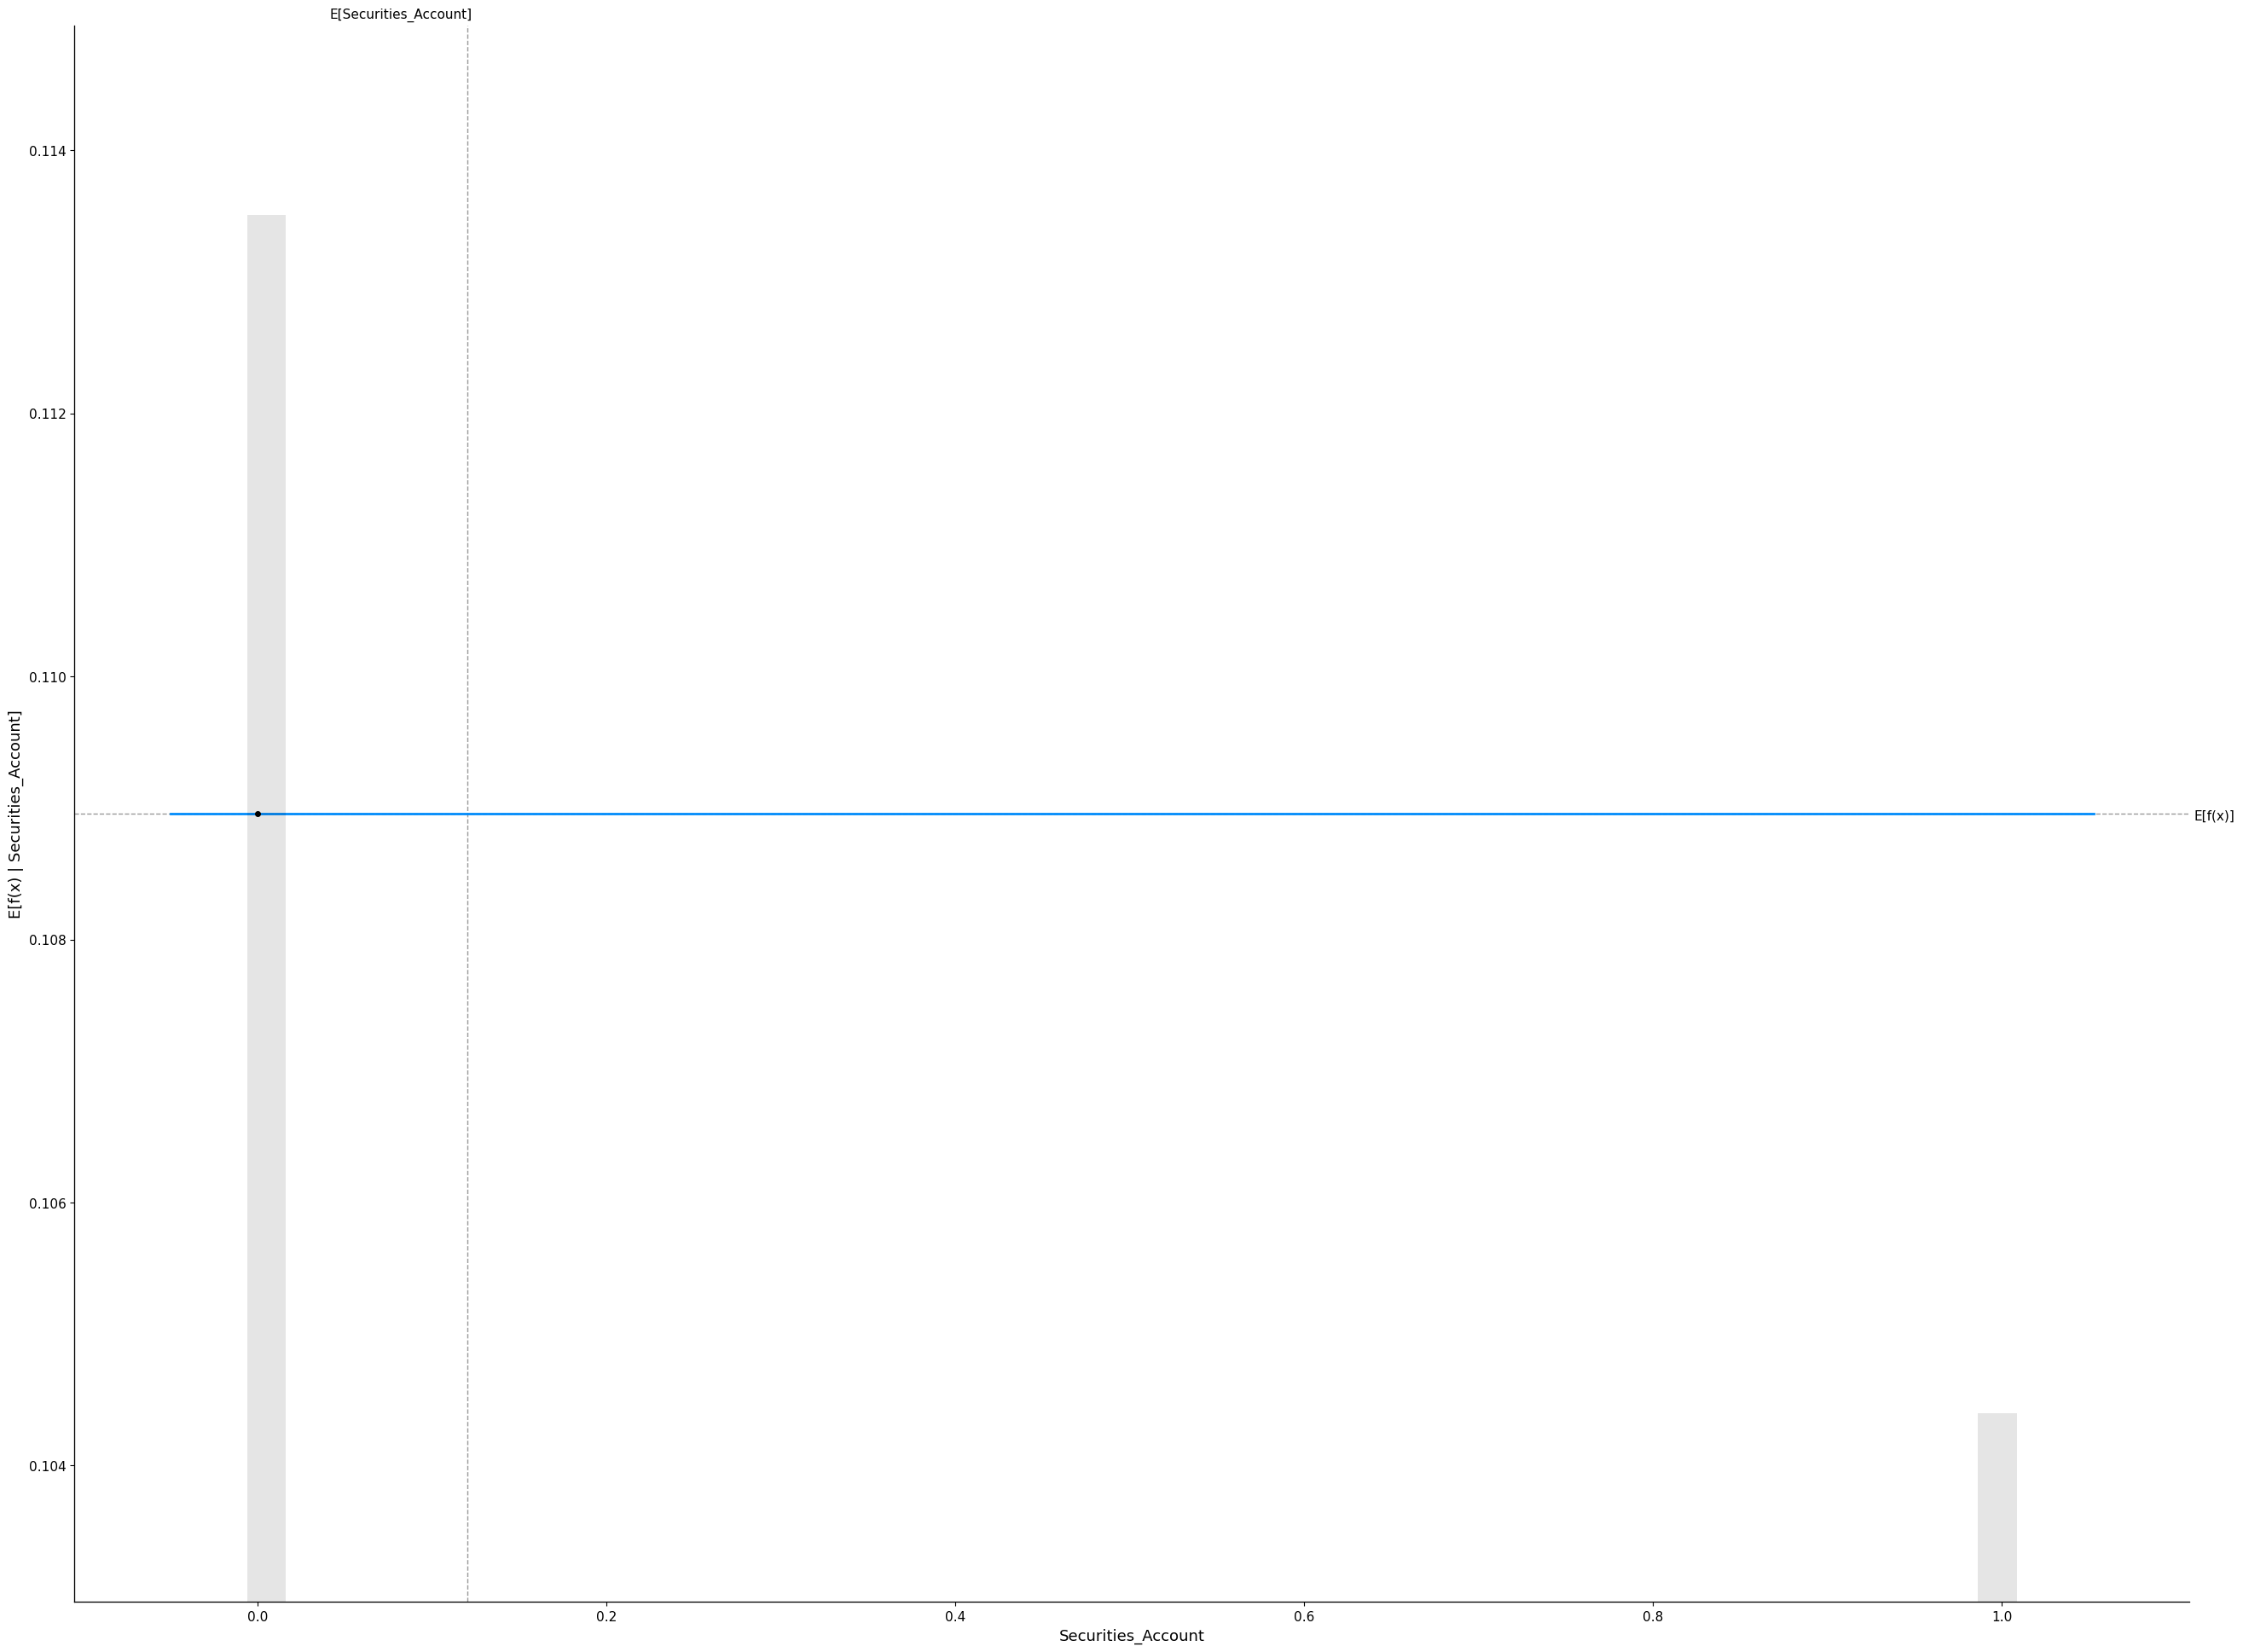

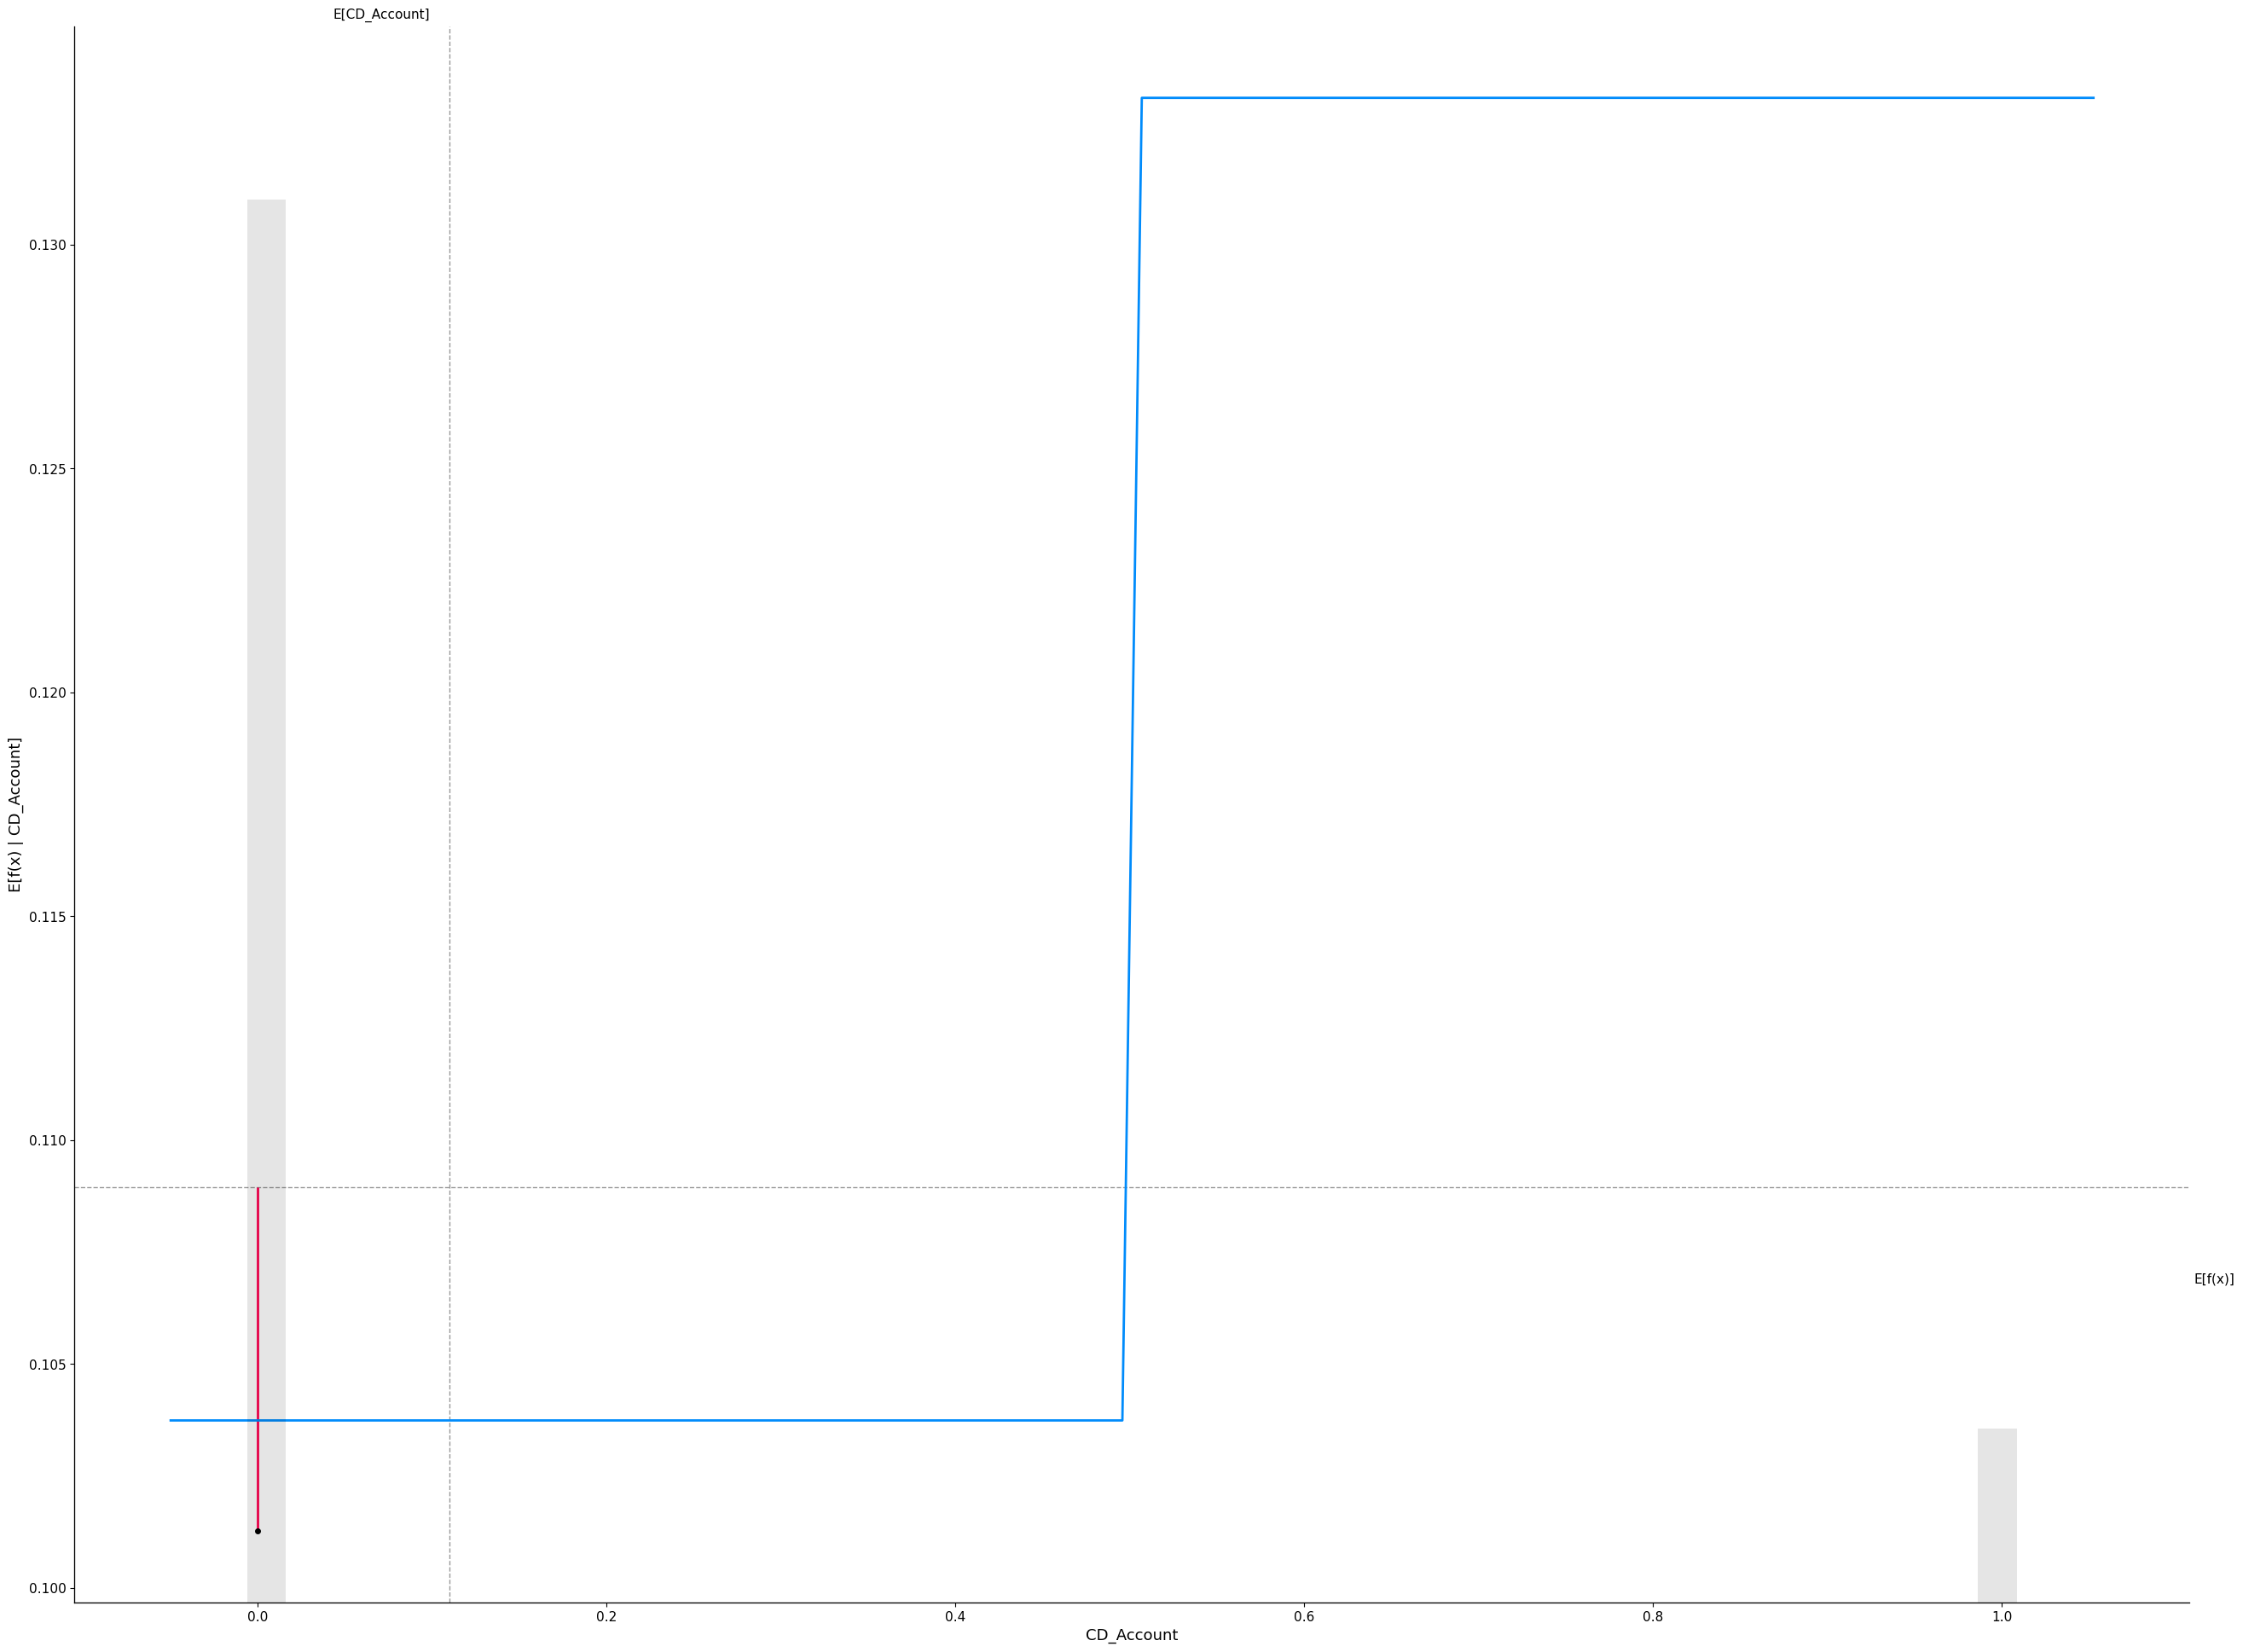

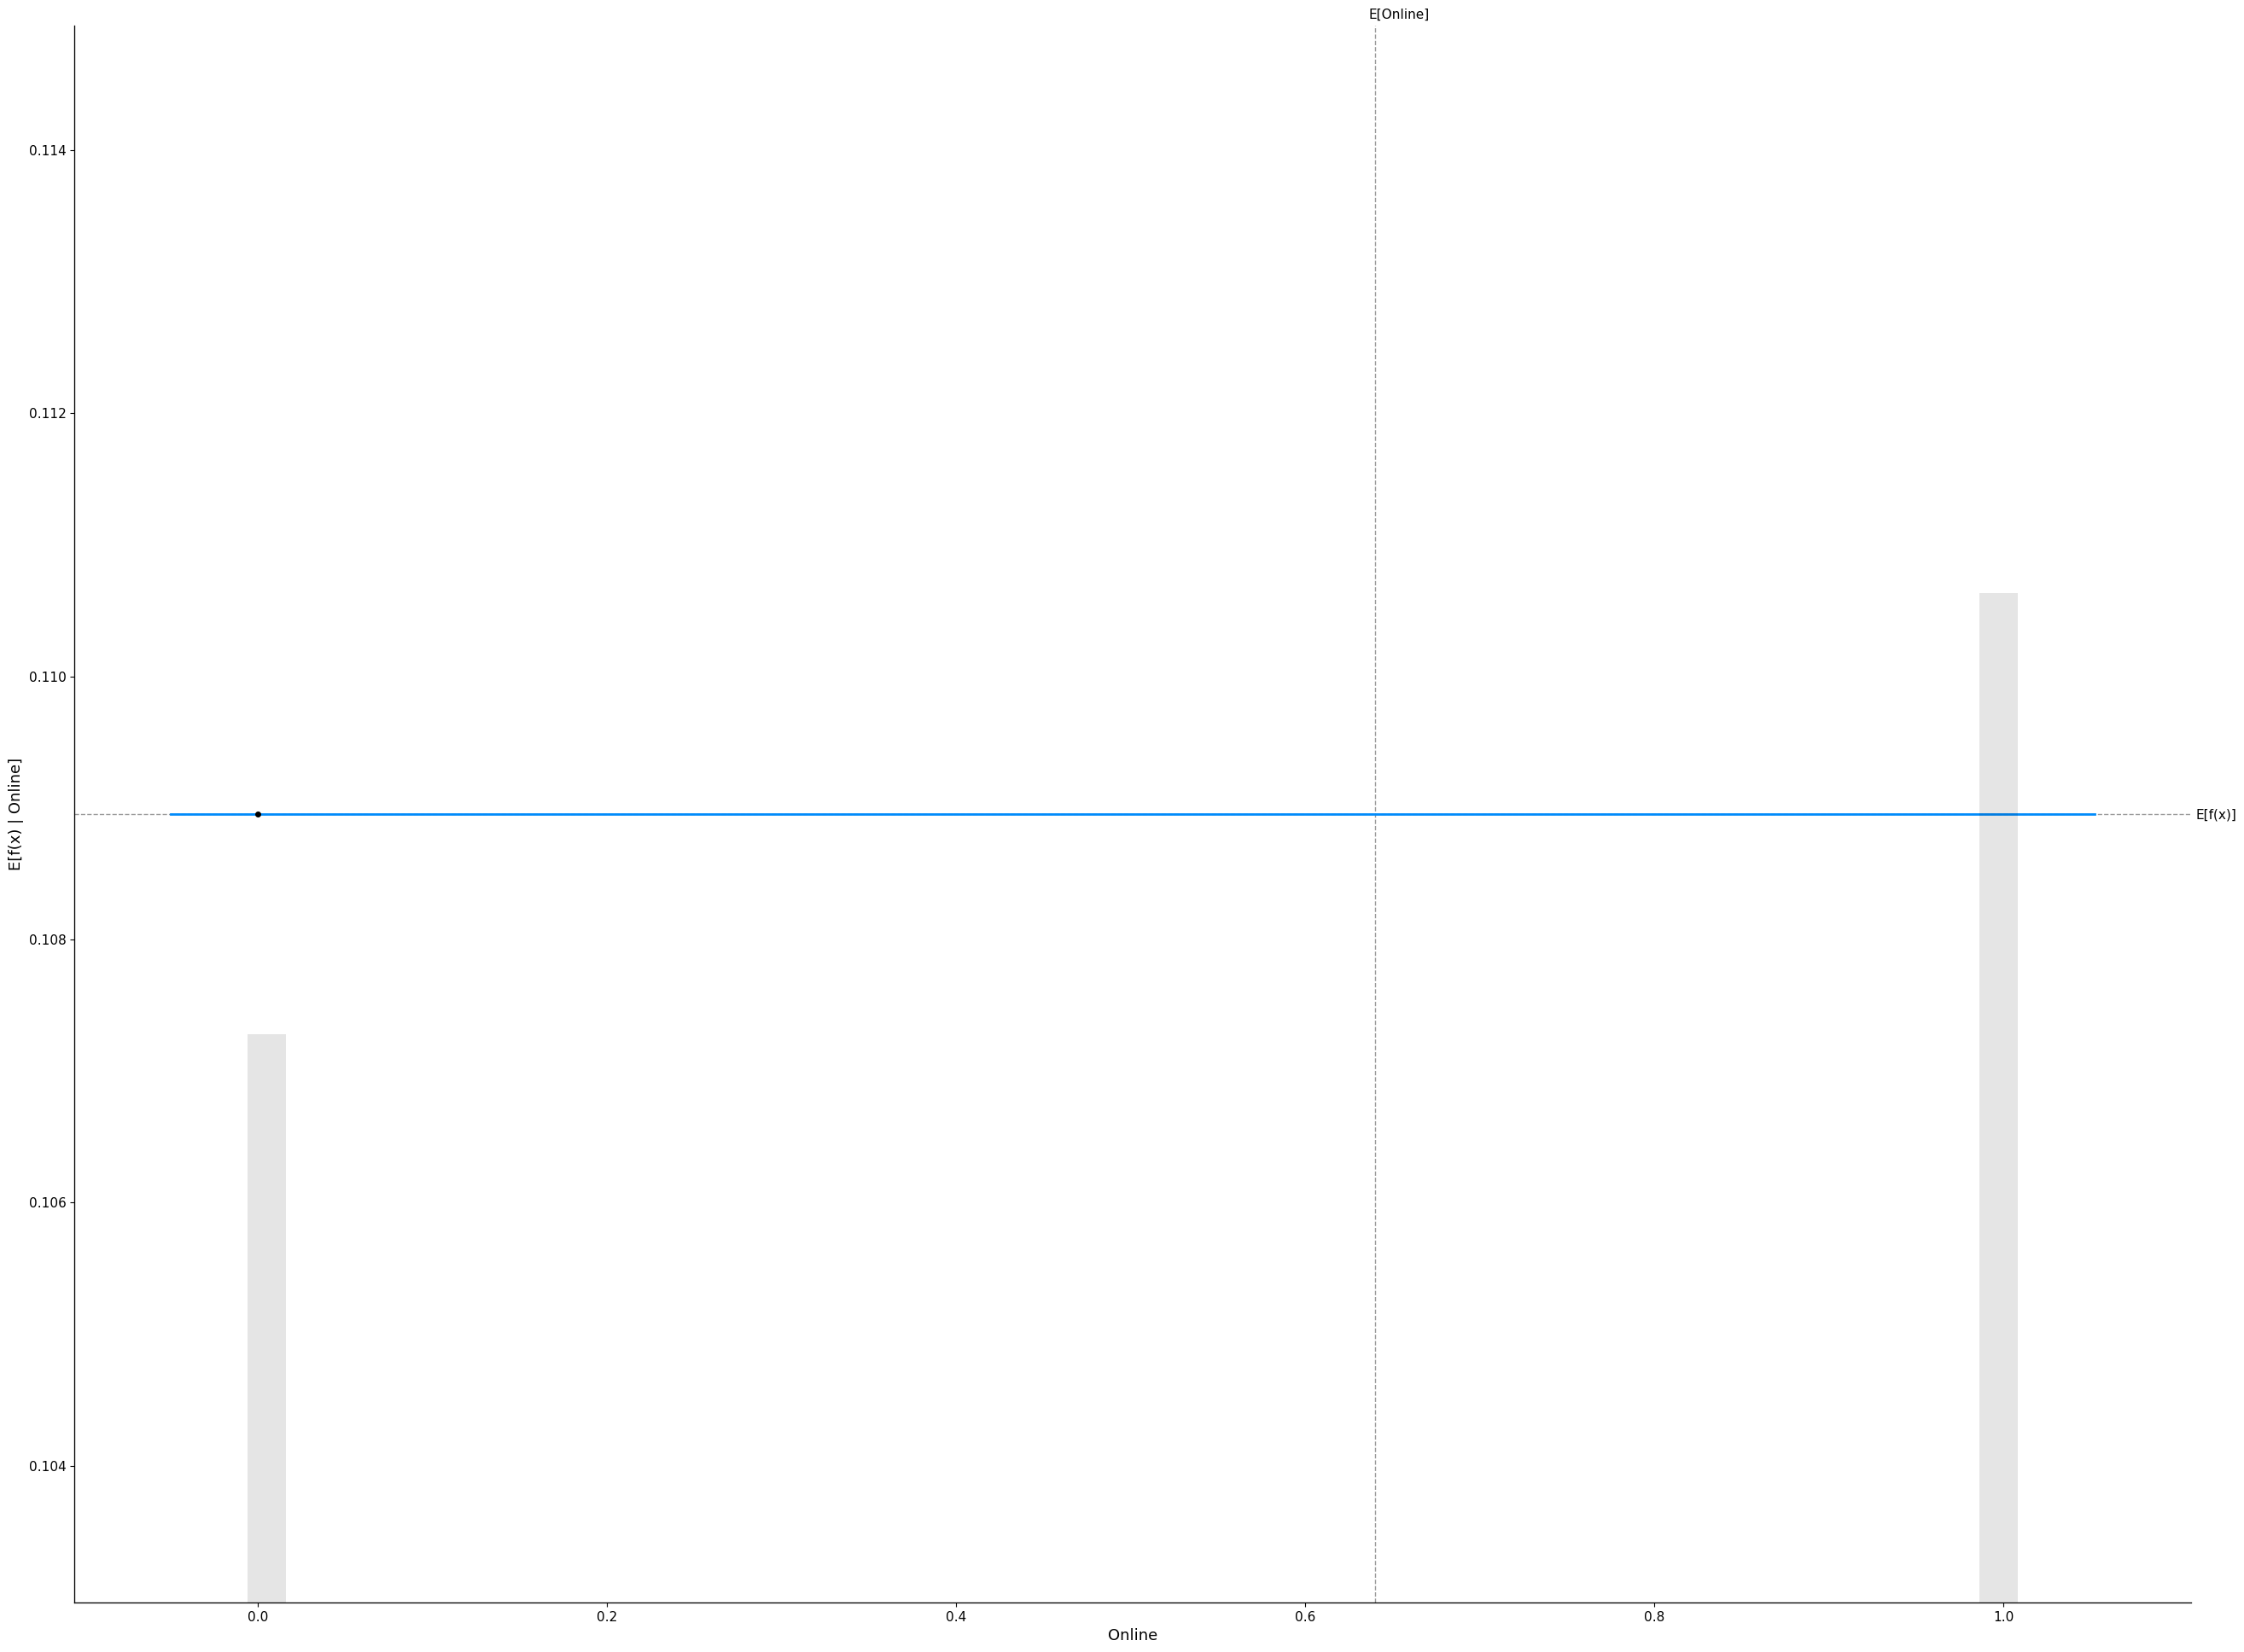

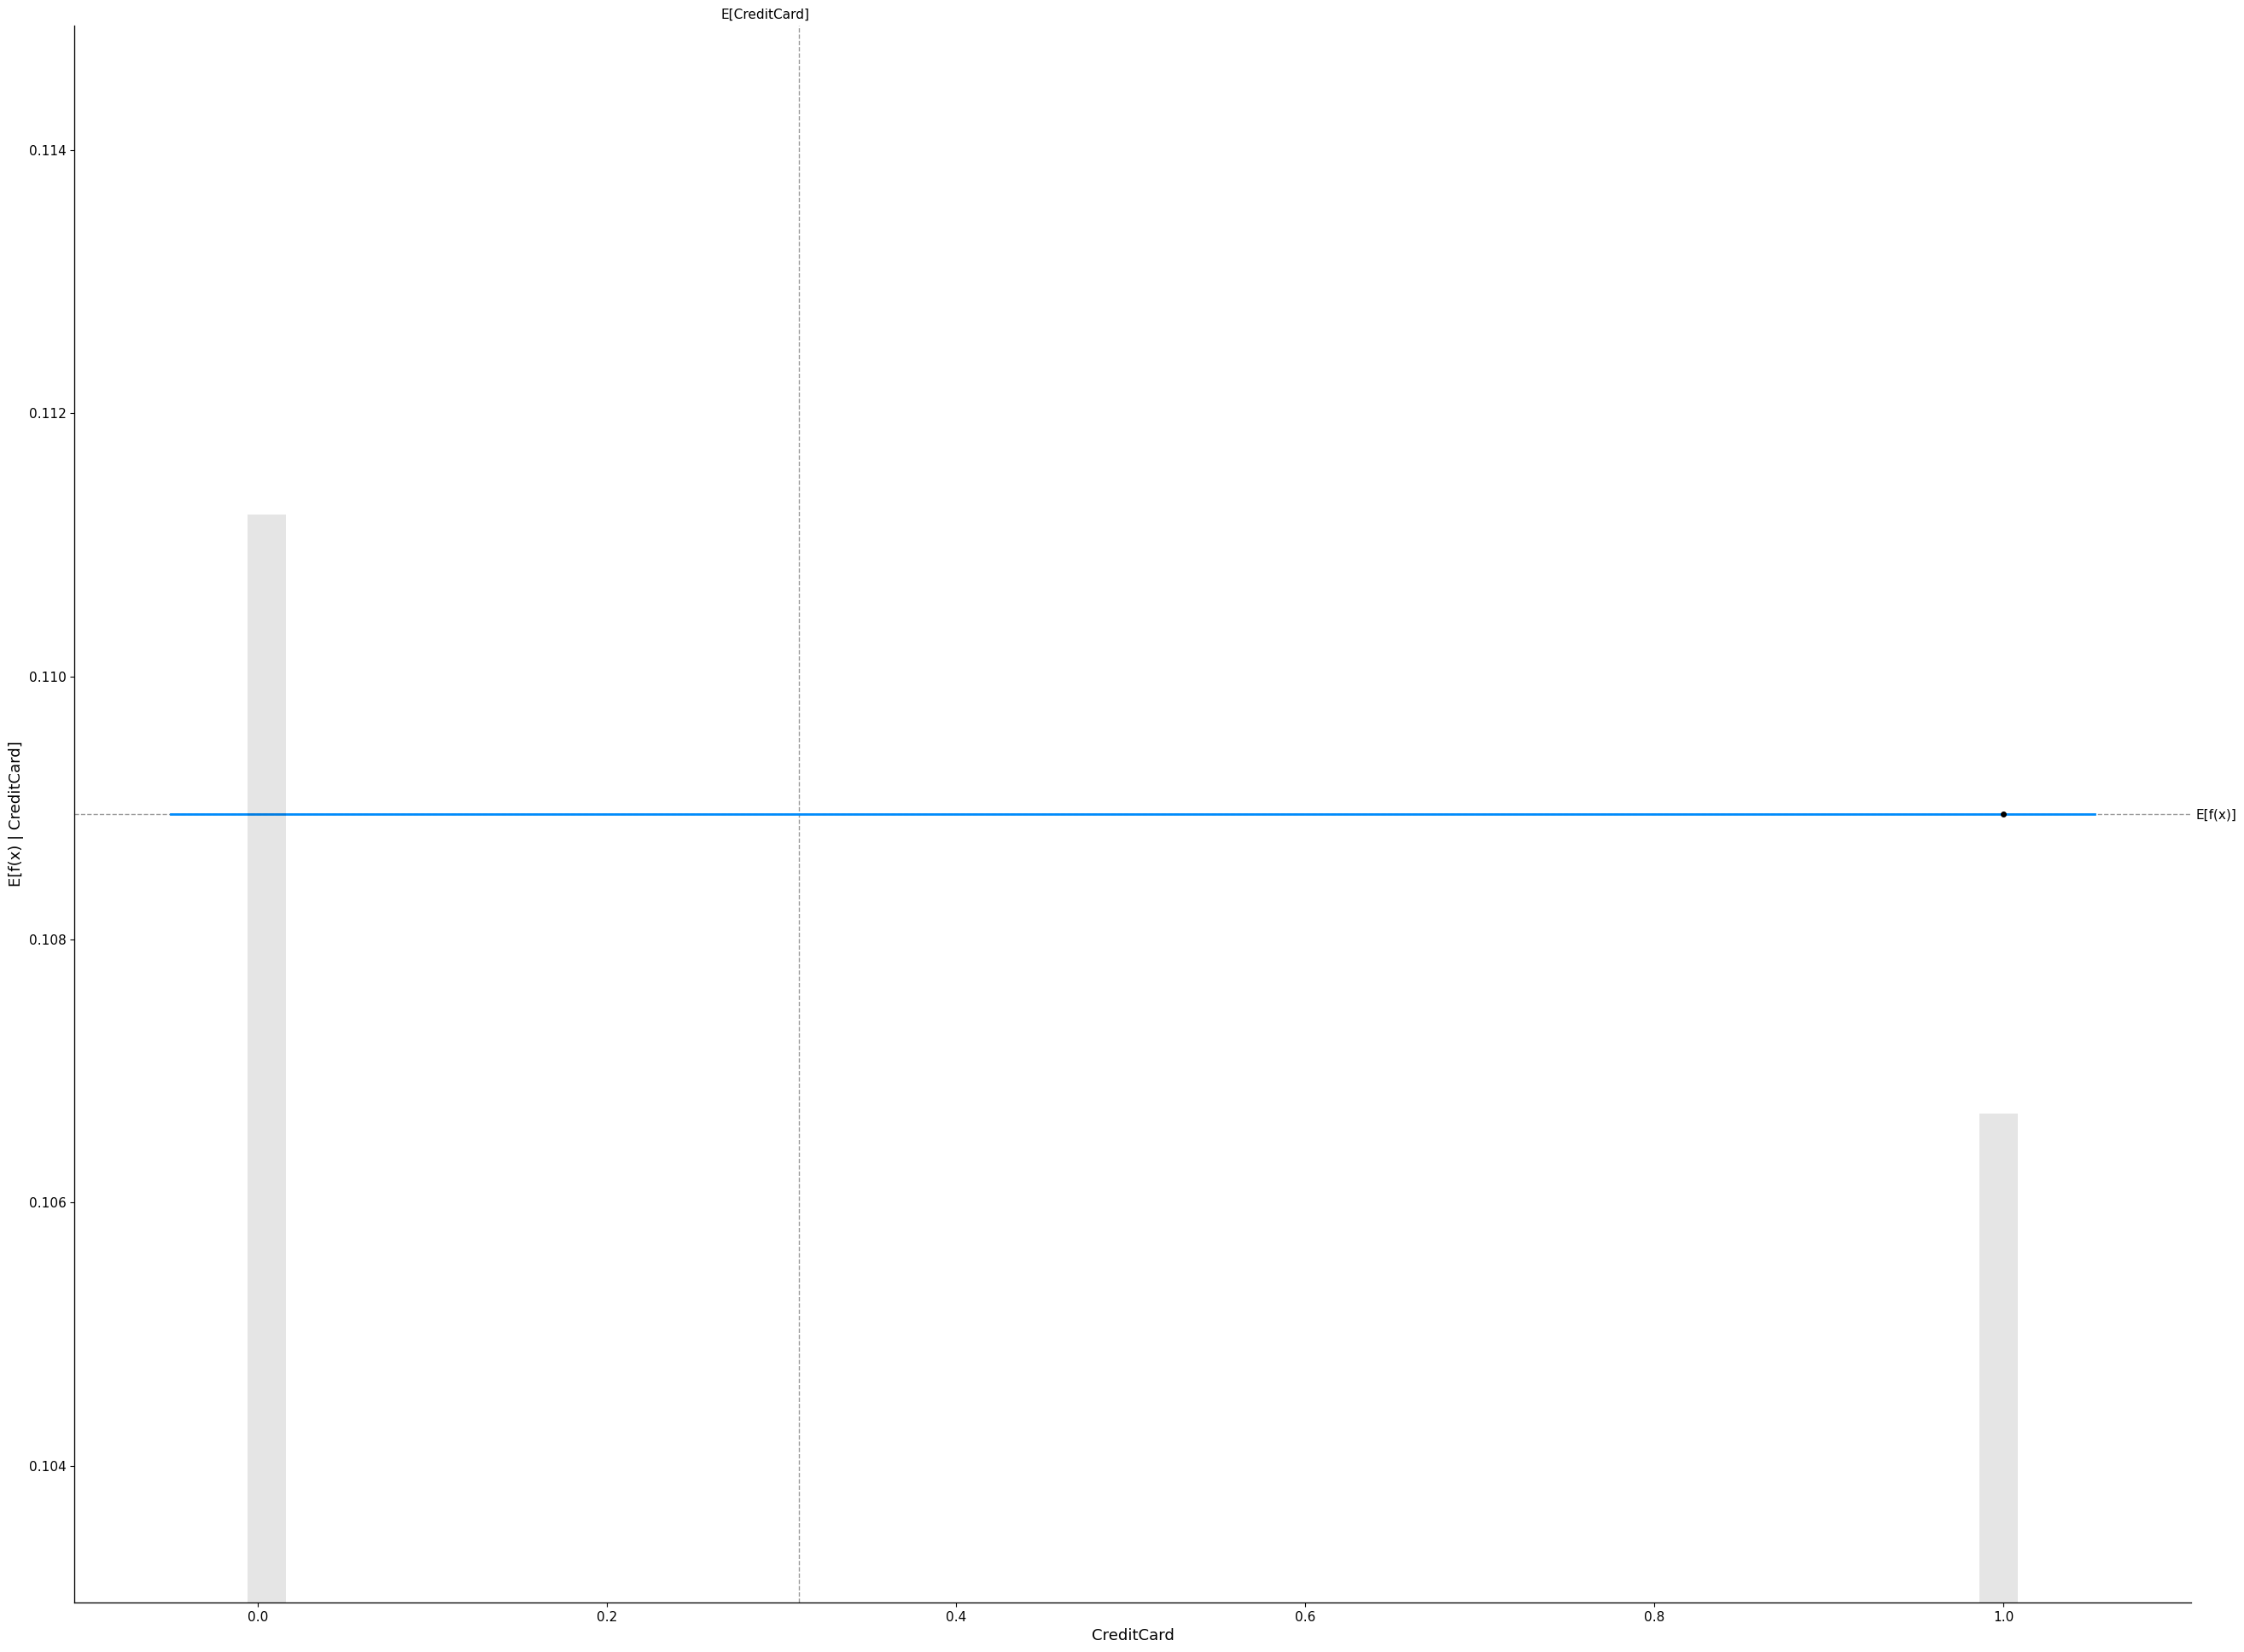

In [41]:

# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(tree_model.predict, x_train_100)
tree_shap_values = tree_explainer(x_train)


for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        tree_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

From the above graphs,

Creaditcard,Online,Securities Account,Mortgage,Experience, Age ,ID are having constant values.

CD Account, Education, CCAvg, Family, Zip Code, Income are not having constant values.

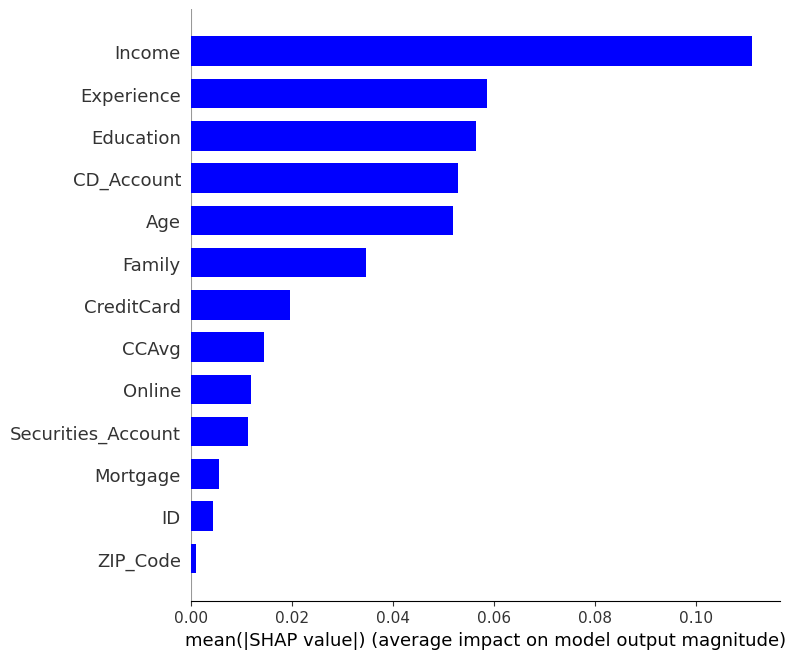

In [39]:
# SHAP variable importance for a Linear Model
shap.summary_plot(linear_shap_values, x_train, plot_type="bar", color="blue")

From the Shap Summary, we can notice that 'Income' is the most important Variable in Linear Model.



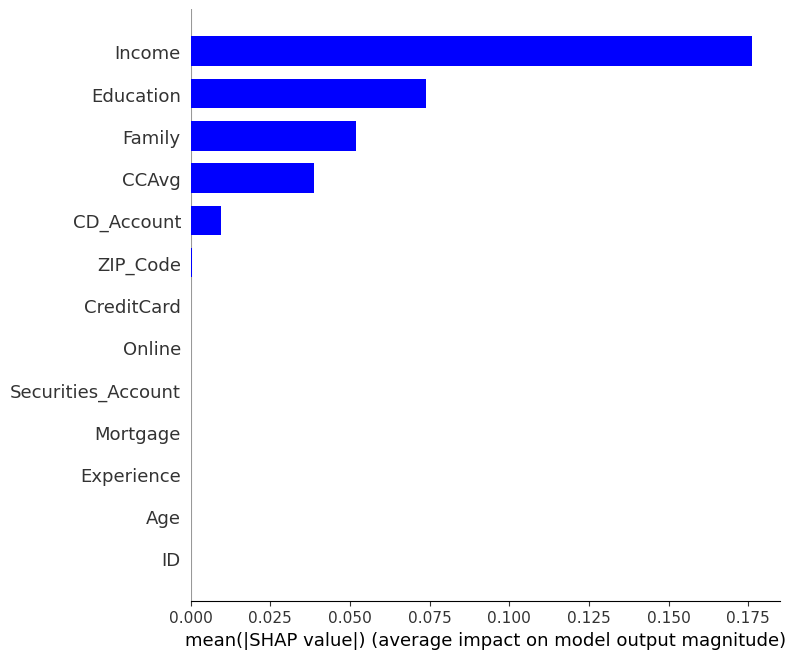

In [42]:

# SHAP variable importance for Tree based model
shap.summary_plot(tree_shap_values, x_train, plot_type="bar", color="blue")

From the Shap Summary, we can notice that 'Income' is the most important Variable in Tree-based Model.

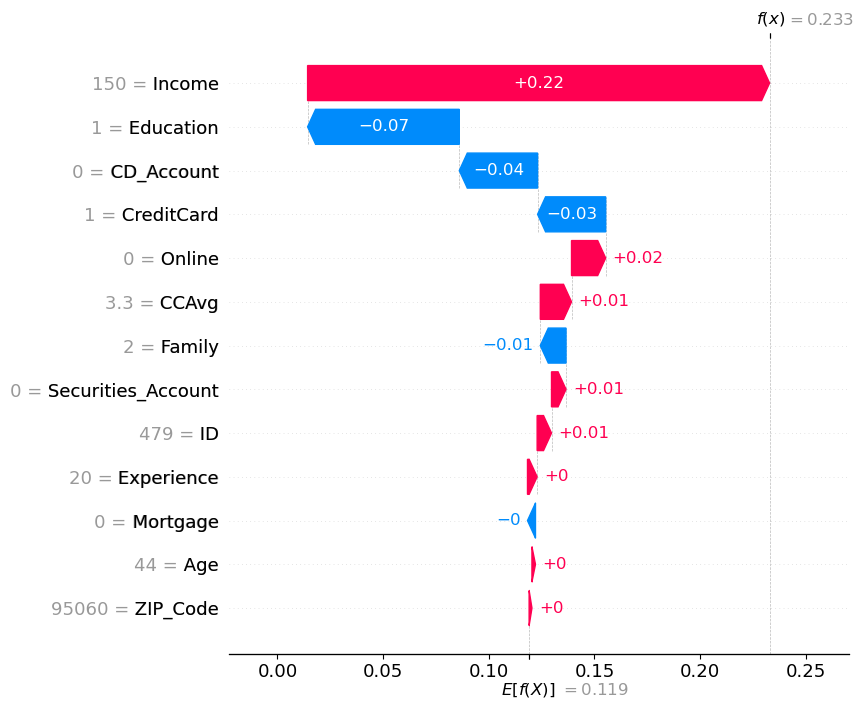

In [43]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)
     

 This code has variable which contains the SHAP values calculated for each feature of a particular data point, indicating the contribution of each feature to the predicted output of the linear model. 


 From above we can note that Income has the maximum contribution.

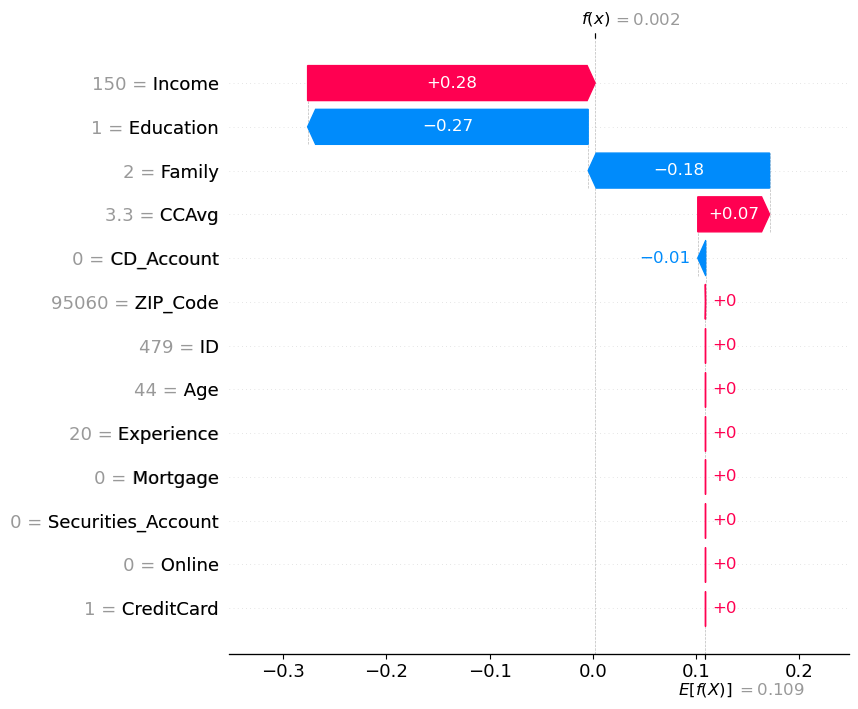

In [44]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

The code has variables which contains the SHAP values calculated for each feature of a particular data point, indicating the contribution of each feature to the predicted output of the linear model. 

From above we can note that Income has the maximum contribution.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


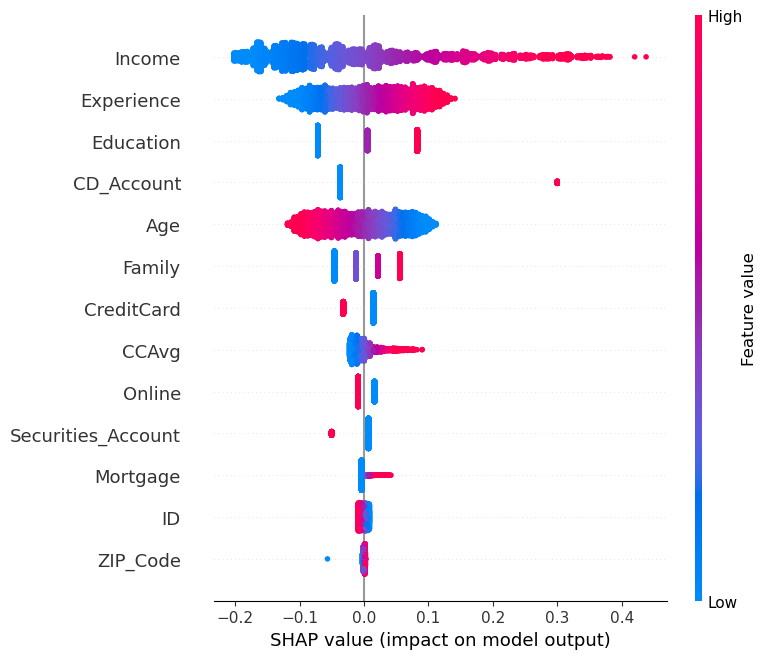

In [45]:
# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, x_train)

The plot displays a summary of the overall importance of each feature in the model, as well as the direction of the effect of each feature on the model's output.


From above we can note that Income has the maximum contribution.

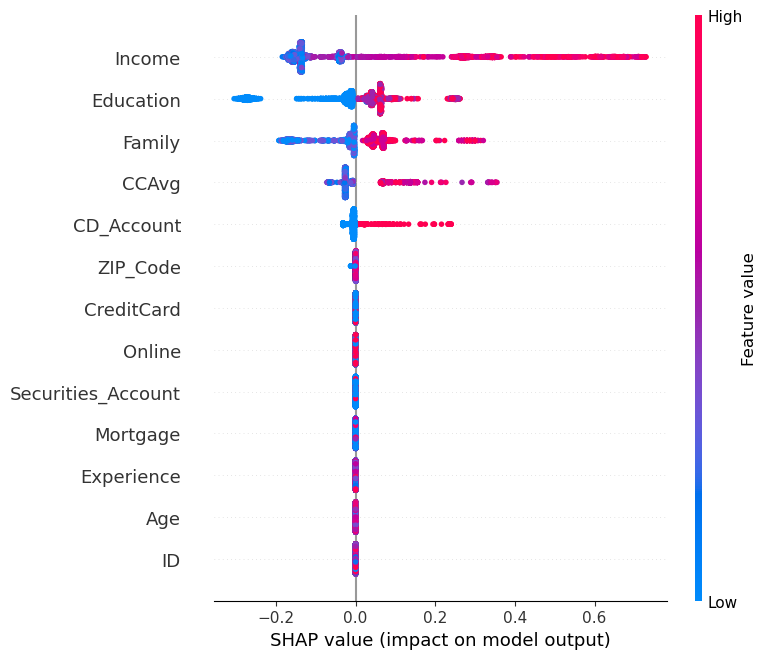

In [46]:
# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, x_train)

The plot displays a summary of the overall importance of each feature in the model, as well as the direction of the effect of each feature on the model's output.

From above we can note that Income has the maximum contribution.

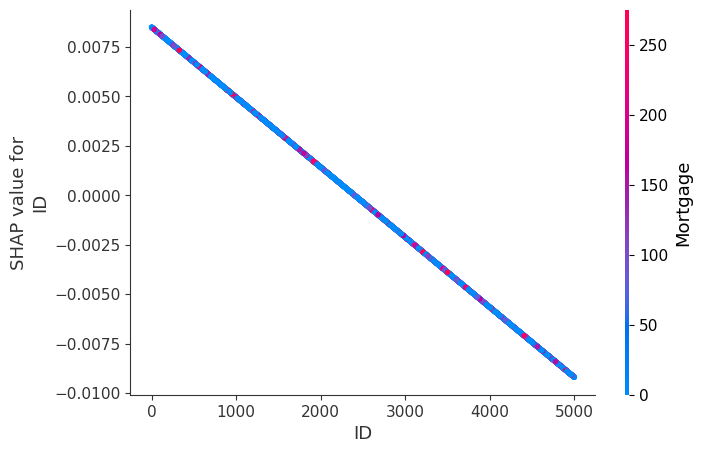

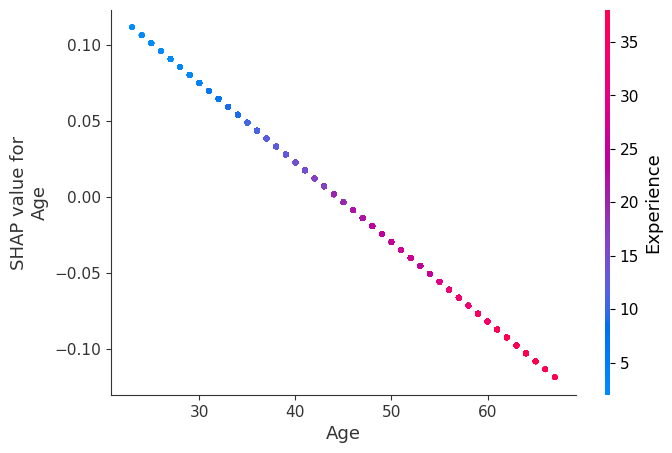

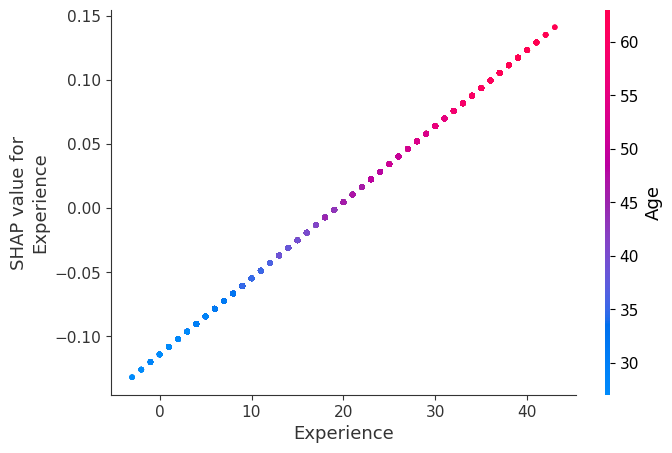

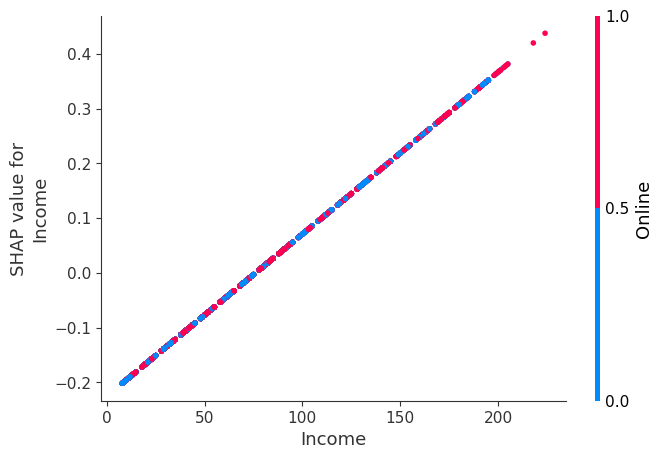

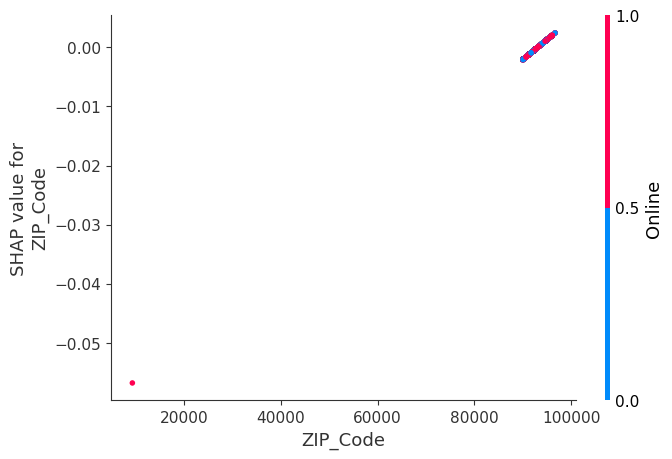

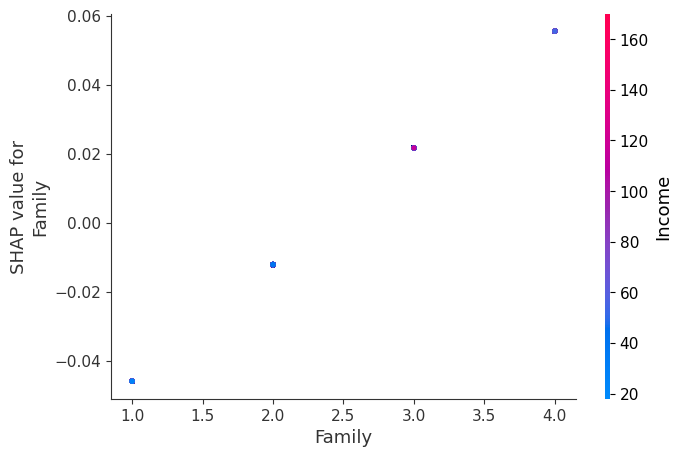

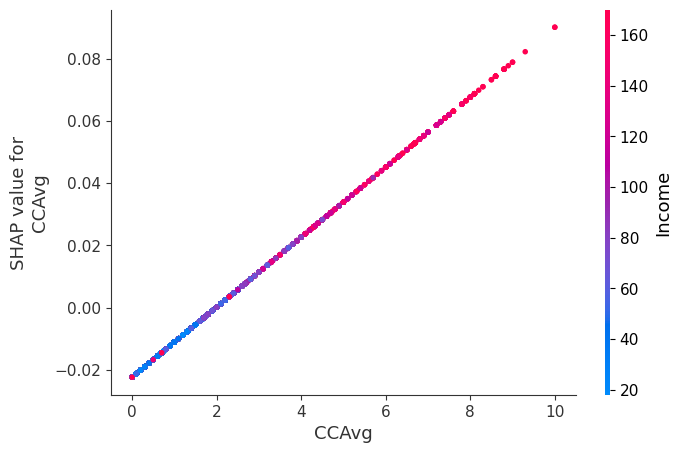

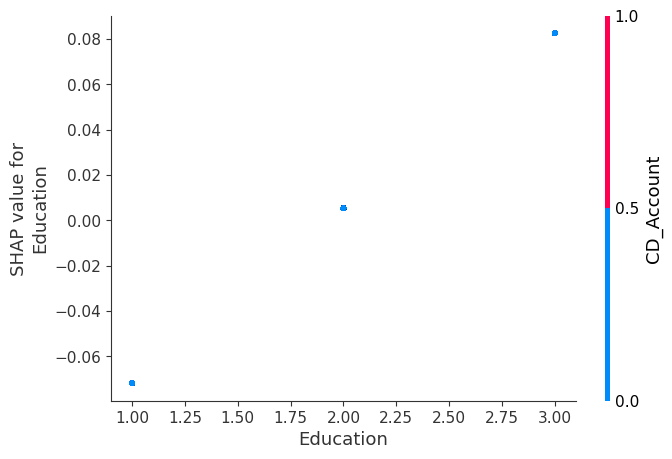

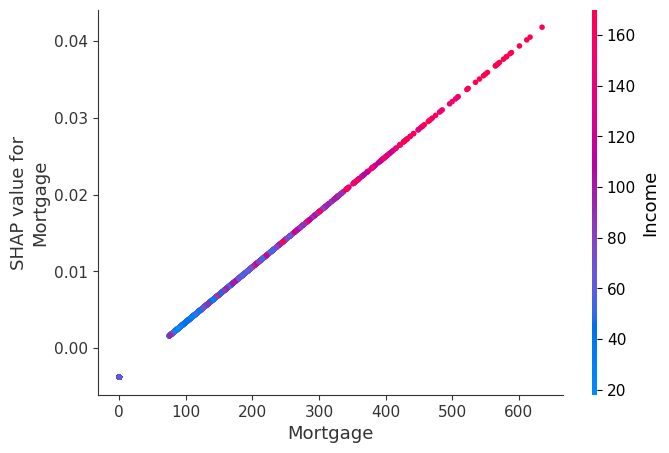

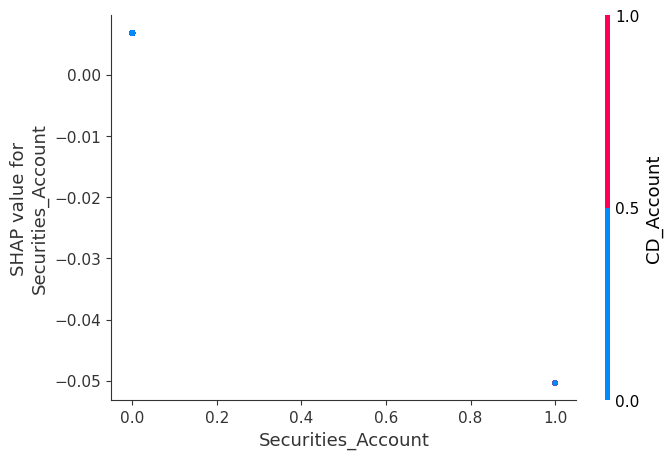

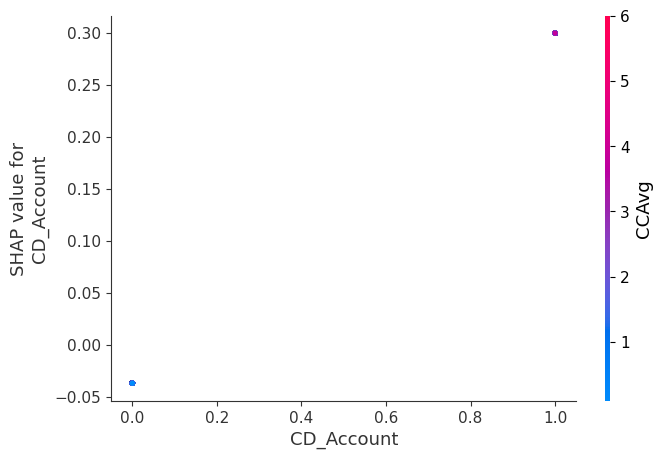

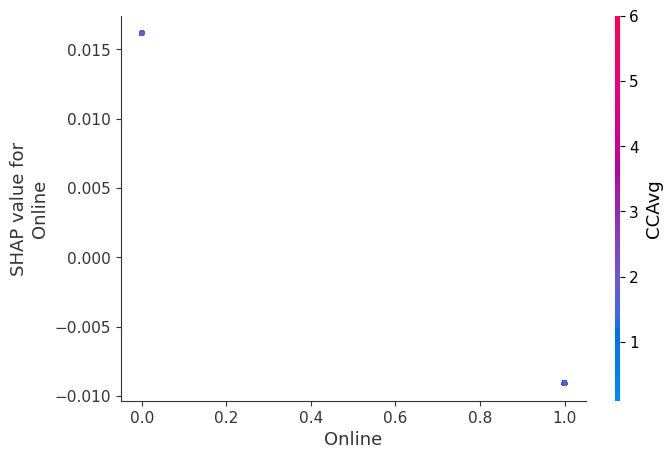

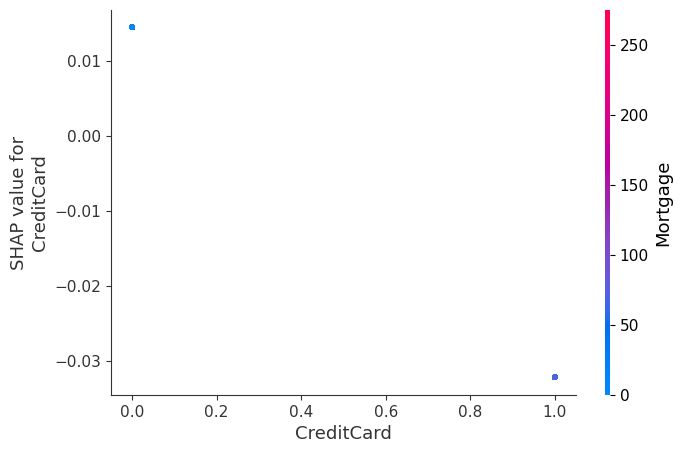

In [47]:
# SHAP partial dependence plot for linear model
for i in x_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, x_train)

In [48]:

X_output_linear = x_test.copy()
X_output_linear.loc[:, "predict"] = np.round(
    linear_model.predict(X_output_linear), 2
)  # Attaching the output of linear model to test dataframe

X_output_tree = x_test.copy()
X_output_tree.loc[:, "predict"] = np.round(
    tree_model.predict(X_output_tree), 2
)  # Attaching the output of tree based model to test dataframe

In [49]:

# Force Plot of Tree Based Model
explainerModel = shap.TreeExplainer(tree_model)
shap_values_Model = explainerModel.shap_values(X_output_tree)


def shap_plot_tree(j):
    p = shap.force_plot(
        explainerModel.expected_value, shap_values_Model[j], X_output_tree.iloc[[j]]
    )
    return p

In [50]:
shap.initjs()  # Initializing JavaScript module
print(shap_plot_tree(18))  # SHAP force plot for sample 18

**Heatmap Visualization for Linear and Tree-based model**


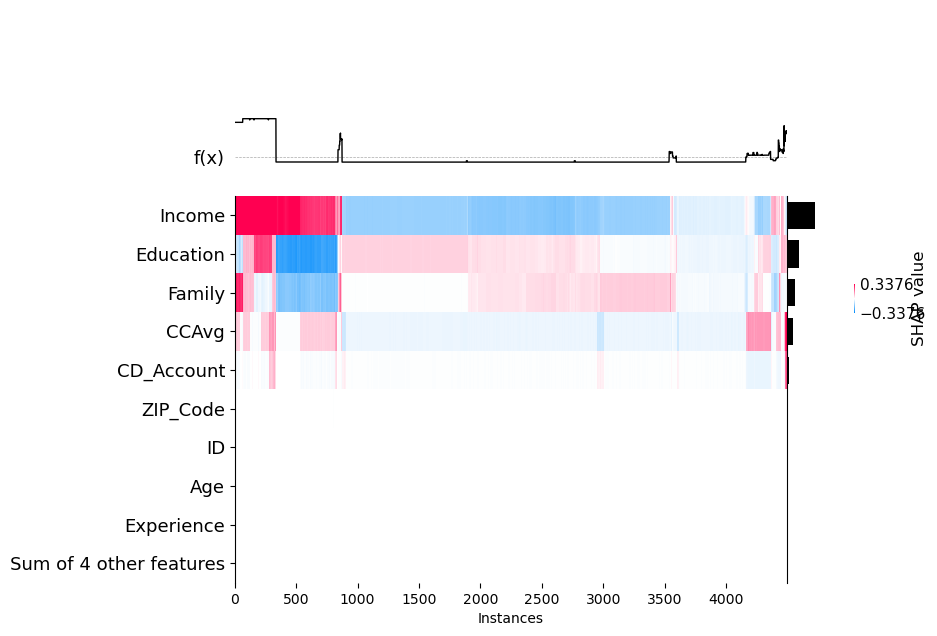

In [51]:
shap.plots.heatmap(tree_shap_values)  # SHAP HeatMap of a Tree Based Model

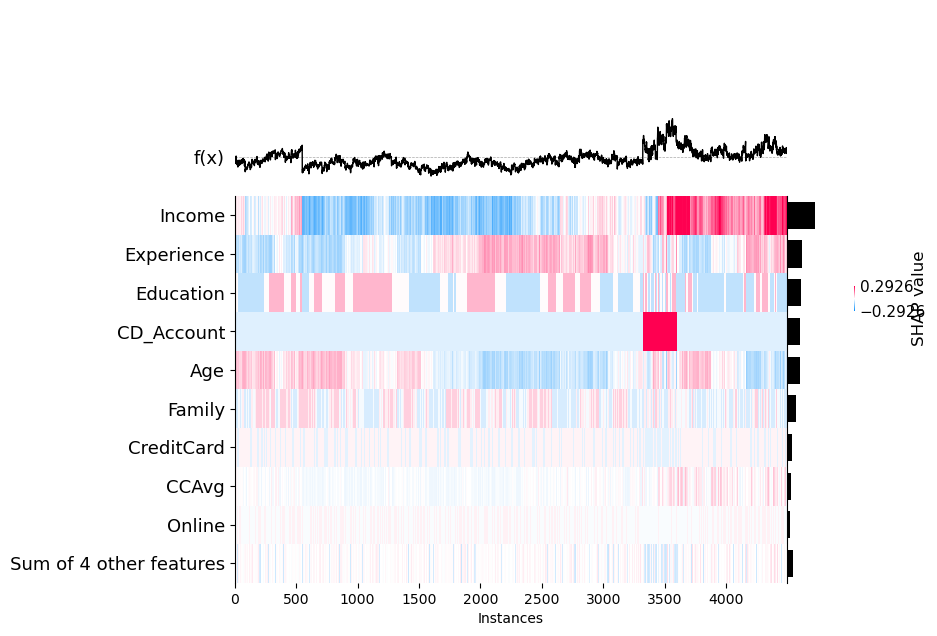

In [52]:
shap.plots.heatmap(linear_shap_values)  # SHAP heatmap for a Linear Model

**Linear Model**


In [53]:

# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), feature_names=x_train.columns, mode="regression"
)

In [54]:

# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)
print("Prediction : ", linear_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], linear_model.predict, num_features=np_x_test.shape[1]
)
lime_linear_explanation

Prediction :  [-0.14848901]
Actual :      0


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


In [55]:
lime_linear_explanation.show_in_notebook()  # Display Results in Notebook

**Tree Based Model**


In [56]:

# Initializing LIME explainer for Tree Based Model
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), feature_names=x_train.columns, mode="regression"
)
  

In [57]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)
print("Prediction : ", tree_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], tree_model.predict, num_features=np_x_test.shape[1]
)
lime_tree_explanation

Prediction :  [0.]
Actual :      0


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [58]:
lime_tree_explanation.show_in_notebook()  # Display Results in Notebook

**PDP(Partial Dependence Plot) for Linear model and Tree-based Model** 


In [106]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(
    linear_model, x_test, x_test.columns, n_jobs=3, grid_resolution=20
)


ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/Users/riddhivora/anaconda3/lib/python3.10/site-packages/sklearn/inspection/__init__.py)

In [107]:
# PDP Plot for Linear Model
plot_partial_dependence(
    linear_model, x_test, x_test.columns, n_jobs=3, grid_resolution=20
)

fig = plt.gcf()
fig.suptitle("Partial dependence of Wine Quality Features")
fig.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()
plt.rcParams["figure.figsize"] = (32, 24)

NameError: name 'plot_partial_dependence' is not defined